## BLAH

# Normalizing gradient descent

INTRO

In [1]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import linear_algebra_library as linlib
import autograd.numpy as np
import time

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## The gradient descent direction

We saw in Chapter 6 that with standard gradient descent we take steps of the form 


\begin{equation}
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \nabla g(\mathbf{w}^{\,k-1})
\end{equation}

where the negative gradient at each step determines the direction we travel in next. How much we end up traveling in the direction of negative gradient is determined by two factors: (i) the steplength parameter $\alpha$, and (ii) the magnitude of the gradient itself denoted by $\Vert \nabla g(\mathbf{w}^{k-1}) \Vert_2$. This means that we cannot have full control over how much we travel at each step by tuning $\alpha$ alone. Luckily this issue has a quick fix: normalize the gradient by dividing off  its magnitude to get the unit-length descent vector $-\frac{\nabla g(\mathbf{w}^{k-1})}{\Vert \nabla g(\mathbf{w}^{k-1}) \Vert_2 }$. Notice, dividing the negative gradient by its magnitude does not change its direction but it allows us to write the *normalized gradient descent* step as

\begin{equation}
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \frac{\nabla g(\mathbf{w}^{\,k-1})}{\left\Vert \nabla g(\mathbf{w}^{\,k-1}) \right\Vert_2 }
\end{equation}

where now the distance we travel at each step

\begin{equation}
\left\Vert \mathbf{w}^{\,k} - \mathbf{w}^{\,k-1} \right\Vert_2 = \left\Vert -\alpha \frac{\nabla g(\mathbf{w}^{\,k-1})}{\left\Vert \nabla g(\mathbf{w}^{\,k-1}) \right\Vert_2 }\right\Vert_2  = \alpha
\end{equation}

is solely determined by $\alpha$, which itself can be fixed for all steps of the gradient descent run or can change at each step, e.g., a diminishing steplength at step $k$ like $\alpha = \frac{1}{k}$.

From a mathematical point of view there is no difference between these two approaches descent -  for example, setting $\alpha \longleftarrow \frac{\alpha}{{\left\Vert \nabla g(\mathbf{w}^{\,k-1}) \right\Vert_2 }}$ makes the unnormalized step $\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \nabla g\left(\mathbf{w}^{\,k-1}\right)$ a normalized one.  However from a strictly practically perspective - particularly in the context of machine learning / deep learning - each form has its pragmatic advantages.  

----
However before tackling this issue let us look at a few examples that highlight some the important common behavior shared by both versions of gradient descent.  This includes (in no particular order):


> **1. Minimum finding behavior:** as a local method gradient descent can find minima that we could never compute by hand using the unconstrained first order optimality condition 
 
> **2.  Robustness to the size of input dimension:** gradient descent is very robust to the size of input dimension, and is able to scale to functions that have hundreds of thousands or even hundreds of millions of inputs

> **3.  Application to functions with many local minima:** when applied to non-convex functions with many local minima gradient descent - like any local method - can be run multiple times with different initializations in order to seek out global minima

> **4.  Stepsize parameter selection and descending / ascending:** while at every step gradient descent provides a descent direction, whether or not we descend in the function itself depends on our choice of steplength parameter. 

#### <span style="color:#a50e3e;">Example 5. </span>  Minimizing a function with many local minima using multiple runs of gradient descent

In this example we show what one may need to do in order to find the global minimum of a function using (normalized) gradient descent.  Using the function

$$
g(w) = \text{sin}(3w) + 0.1w^2
$$

we initialize two runs - at $w^0 = 4.5$ and $w^0 = -1.5$.  For both runs we use a steplength of $\alpha = 0.1$ fixed for all 10 iterations.  As can be seen by the result depending on where we initialize we may end up near a local or global minimum - here resulting from the first and second initialization respectively.  Here we illustrate the steps of each run as circles along the input axis with corresponding evaluations on the function itself as a similarly colored 'x'.  The steps of each run are colored green near the start of the run to red when a run halts.  Notice how - since we are using the normalized version of gradient descent - each step has precisely the length given by the steplength parameter $\alpha$.

<IPython.core.display.Javascript object>


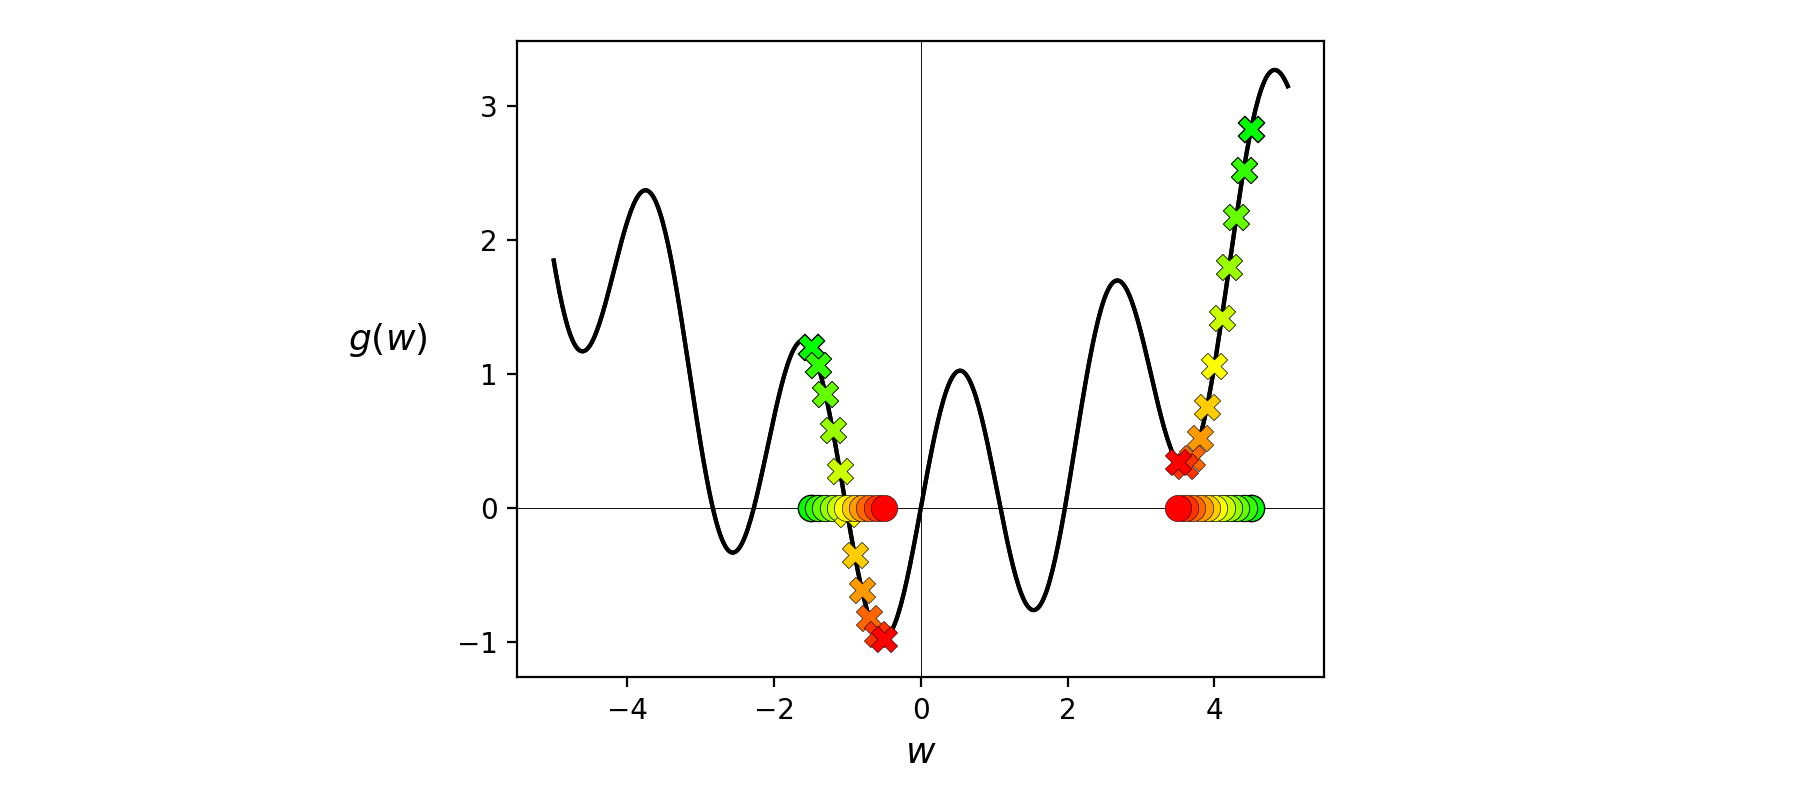

In [8]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(3*w) + 0.1*w**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.draw_2d(g=g, w_inits = [4.5,-1.5],steplength = 0.1,max_its = 10,version = 'normalized',wmin = -5,wmax = 5)

This example is indicative of what one may have to do when applying (normalized) gradient descent to minimizing highly non-convex functions with many local minima: run the algorithm several times with different initializations, and pick the best result (the best local minimum one can find).  Of course not all non-convex functions present this challenge - when the local minima of a non-convex are either are equal (e.g., when $g(w) = \text{sin}(w)$) or when they are all fairly close in value to a global minimum, a single run ending near any local minimum can suffice for practical applications (like many types of deep neural networks).

To illustrate this idea we can run the same experiment above using the similar function $g(w) = \text{sin}(3w) + 0.01w^2$.  Here the local minima - at least on the interval $[-5,5]$ - are all vey close to the global minimum and so may be adequate.

<IPython.core.display.Javascript object>


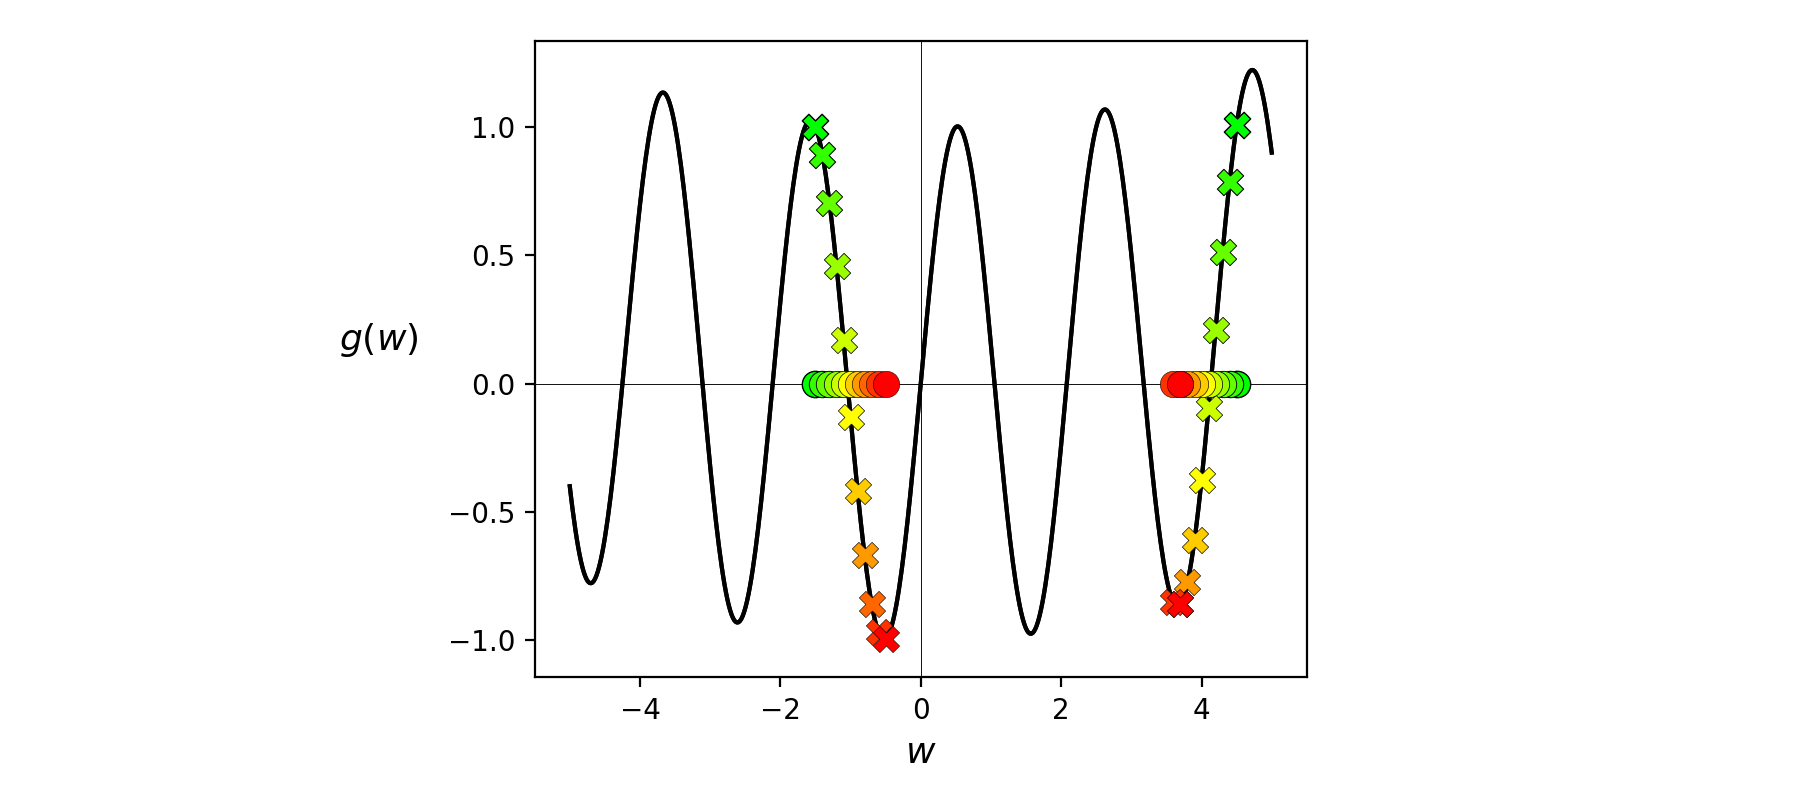

In [9]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.sin(3*w) + 0.01*w**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.draw_2d(g=g, w_inits = [4.5,-1.5],steplength = 0.1,max_its = 10,version = 'normalized',wmin = -5,wmax = 5)

Note that one can quickly adjust the Python code given in Example 4 to make a normalized gradient descent function.  Using the notation from that example, all we need to do is adjust a few lines in the descent loop itself.  First we need to compute the magnitude of the gradient as follows

In [ ]:
# evaluate the gradient
grad_eval = grad(w)

# compute norm of gradient
grad_norm = np.linalg.norm(grad_eval)

Next, since we will be dividing by this quantity, we need to make sure it is not so small in magnitude (or exactly 0) that it creates a 'division by zero ' error.  If the value is too small we pick a direction at random and move in its direction according to the steplength parameter $\alpha$.

In [ ]:
# check that magnitude of gradient is not too small, if yes pick a random direction to move
if grad_norm == 0:
    # pick random direction and normalize to have unit legnth
    grad_eval = 10**-6*np.sign(2*np.random.rand(len(w)) - 1)
    grad_norm = np.linalg.norm(grad_eval)
    grad_eval /= grad_norm

All together with these simple adjustments to the unnormalized gradient descent function we have the analogous pseudo-code for normalized version followed by its implementation in Python.

### Normalized gradient descent

<hr style="height:1px;border:none;color:#555;background-color:#555;"/>
<p style="line-height: 1.7;">

<strong>1:</strong>&nbsp;&nbsp;   <strong>input:</strong> function $g$, steplength $\alpha$, maximum number of steps $K$, and initial point $\mathbf{w}^0$ <br/>

<strong>2:</strong>&nbsp;&nbsp;   $\mathbf{w}_{\text{min}}=\mathbf{w}^0$ <br/>

<strong>3:</strong>&nbsp;&nbsp;   $g_{\text{min}}=g\left(\mathbf{w}^0\right)$ <br/>

<strong>4:</strong>&nbsp;&nbsp;   <code>for</code> $\,\,k = 1...K$<br/>

<strong>5:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           compute $\nabla g\left(\mathbf{w}^{k-1}\right)$ <br/>

<strong>6:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           <code>if</code> $\left\Vert \nabla g\left(\mathbf{w}^{k-1}\right)\right\Vert _{2}=0$  <br/>

<strong>7:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                 set $\nabla g\left(\mathbf{w}^{k-1}\right)$ to a small nonzero random vector <br/>

<strong>8:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           <code>end if</code> <br/>

<strong>9:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           $\mathbf{d}^{k-1} =\frac{\nabla g\left(\mathbf{w}^{k-1}\right)}{\left\Vert \nabla g\left(\mathbf{w}^{k-1}\right)\right\Vert _{2}}$ <br/>

<strong>10:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;        $\mathbf{w}^k = \mathbf{w}^{k-1} - \alpha \mathbf{d}^{k-1}$ <br/>

<strong>11:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          <code>if</code> $g\left(\mathbf{w}^k\right) < g_{\text{min}}$  <br/>

<strong>12:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                $\mathbf{w}_{\text{min}}=\mathbf{w}^k$ <br/>

<strong>13:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                $g_{\text{min}}=g\left(\mathbf{w}^k\right)$ <br/>

<strong>14:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          <code>end if</code> <br/>

<strong>15:</strong>&nbsp;   <code>end for</code> <br/>

<strong>16:</strong>&nbsp;   <strong>output:</strong> $\mathbf{w}_{\text{min}}$ and $g_{\text{min}}$ <br/>

<hr style="height:1px;border:none;color:#555;background-color:#555;"/>
</p>

In [10]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def normalized_gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient, compute its length
        grad_eval = gradient(w)
        grad_norm = np.linalg.norm(grad_eval)
        
        # check that magnitude of gradient is not too small, if yes pick a random direction to move
        if grad_norm == 0:
            # pick random direction and normalize to have unit legnth
            grad_eval = 10**-6*np.sign(2*np.random.rand(len(w)) - 1)
            grad_norm = np.linalg.norm(grad_eval)
            grad_eval /= grad_norm
    
        # take gradient descent step
        w = w - alpha*grad_eval
        
        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            best_w = w
            
    return best_w

## 1.4 Comparing normalized and unnormalized gradient descent schemes

From a mathematical point of view the difference between unnormalized and normalized gradient descent is trivial - they describe the same idea, and either one can be quickly seen to be mathematically equivalent to the other by correct choice of steplength.  For example, setting $\alpha \longleftarrow \frac{\alpha}{{\left\Vert \nabla g(\mathbf{w}^{\,k-1}) \right\Vert_2 }}$ turns the unnormalized gradient descent step $\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \nabla g\left(\mathbf{w}^{\,k-1}\right)$ into a normalized one.  So why go to the trouble of mentioning both normalized and unnormalized gradient descent methods if they are mathematically the same?

Because *practically speaking* depending on the function being minimized one version of gradient descent can be much easier to employ effectively than another.  In this subsection we will explore the practical advantages and disadvantages of each version of gradient descent.  In particular we will see the following via examples below. 

>  **1. Behavior on generic convex functions:** Generally speaking the *unnormalized* method is more convenient for use with convex functions (e.g., linear and logistic regression, support vector machines). 
With many smooth convex cost functions the length of each step is tied directly to the magnitude of the gradient, which is advantageous.

>  **2.  Behavior on generic non-convex functions:** Generally speaking the *normalized* is more convenient for use with non-convex functions (like e.g., *deep neural networks*), because here the fact that the length of each step of the unnormalized version is tied directly to the magnitude of the gradient is disadvantageous.  By completely controlling the length of each step via the steplength parameter, the normalized version can be made to more easily pass over saddle points and through flat regions of a function.


> **3.  Stepsize parameter selection and infinitesimally:**   For a general function gradient descent reaches points infinitesimally close to local minima only when the length of each step diminishes as the algorithm progresses (at least eventually).  In the case of normalized gradient descent this implies that the steplength parameter $\alpha$ should be diminishing in size if such a solution is needed.  This must be done as well with unnormalized gradient descent when applied to certain convex functions (that are not completely smooth, e.g., the absolute value function) as well.  However for smooth convex functions with unnormalized gradient descent since the length of each step is dependent on the length of the gradient such behavior is possible even with a steplength parameter $\alpha$ fixed for all iterations.

#### <span style="color:#a50e3e;">Example 7. </span>  (unnormalized) gradient descent and convex functions

We start by examining a run of unnormalized gradient descent applied to the simple quadratic function

$$
g(w) = w^2
$$

beginning at the point $w^0 = -1.75$.  We fix the steplength parameter $\alpha = 0.1$ and take 30 steps with the method.  What is produced is a now familiar looking animation with a slider widget allowing you to see how gradient descent behaves during this run - moving the slider from left to right animates each step of the process, the color of each step turning from green to red as the process nears completion.


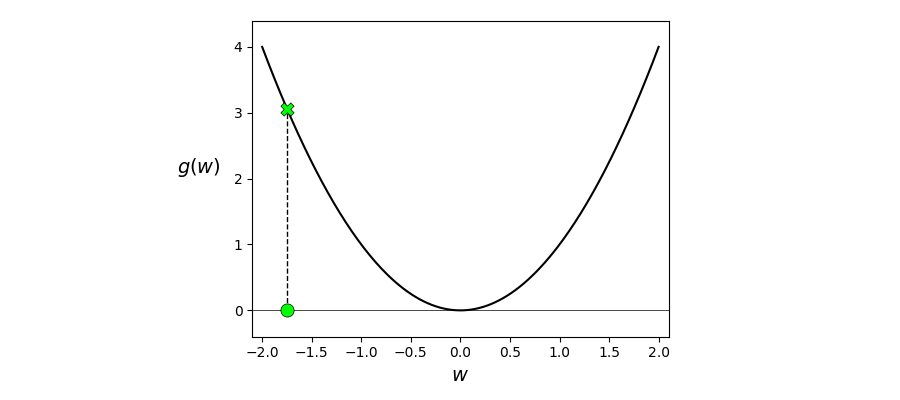
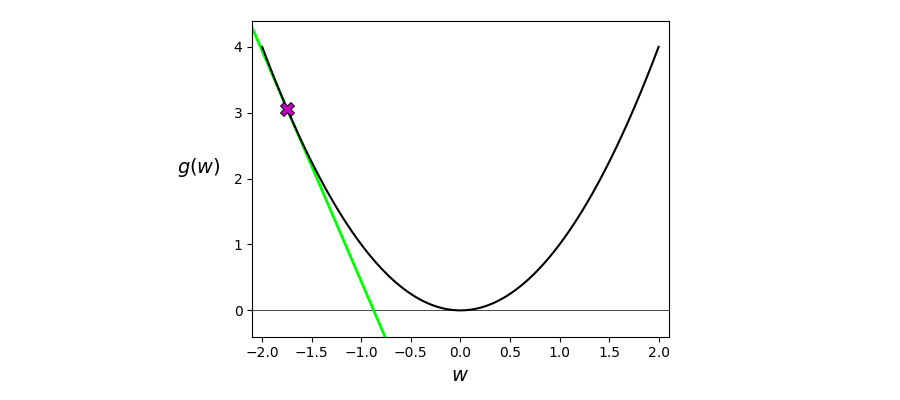
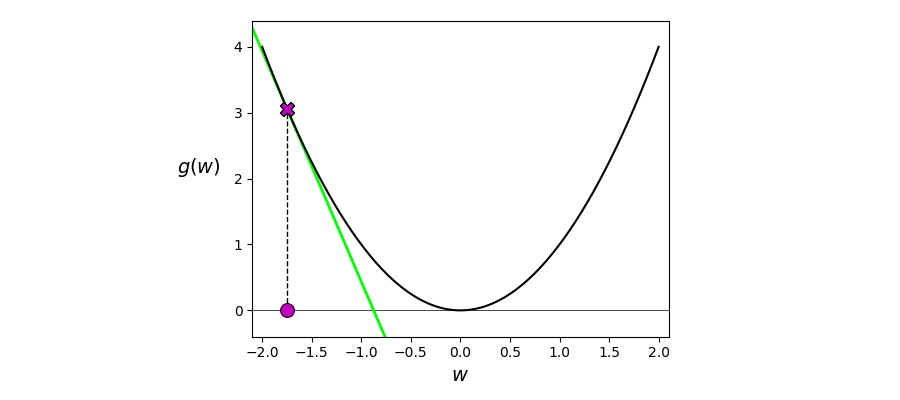
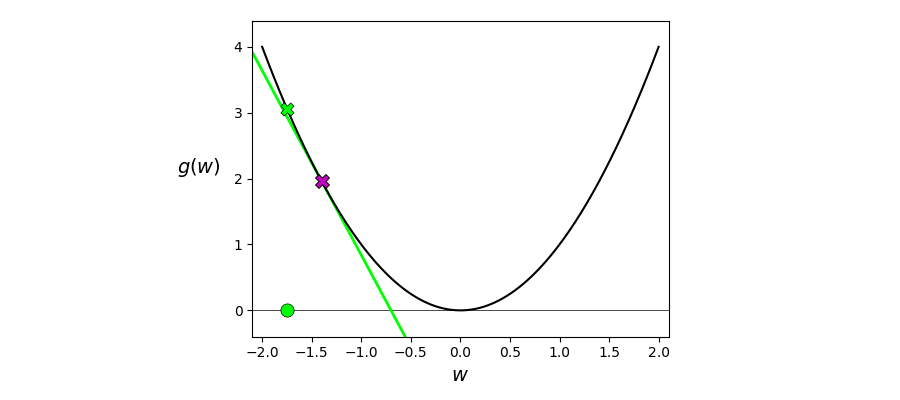
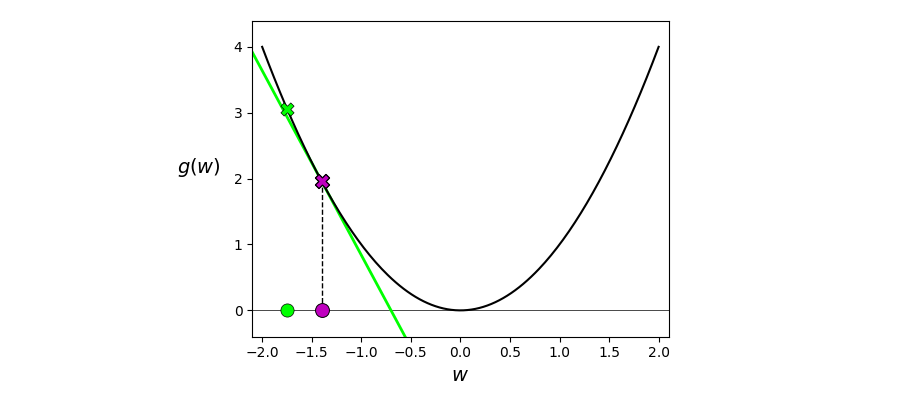
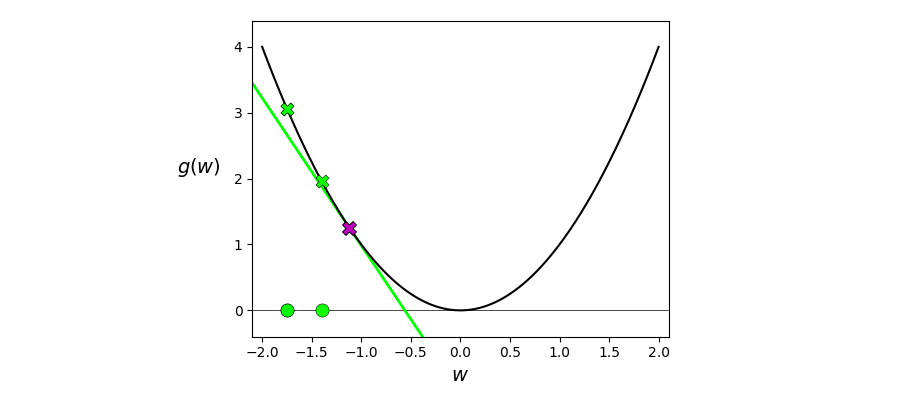
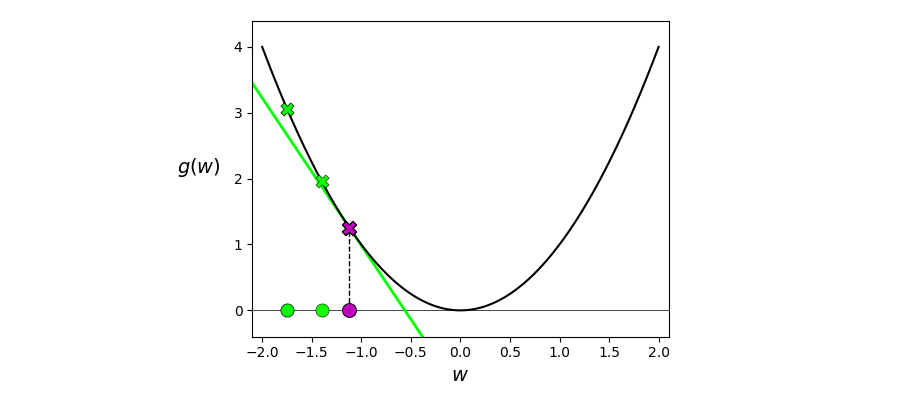
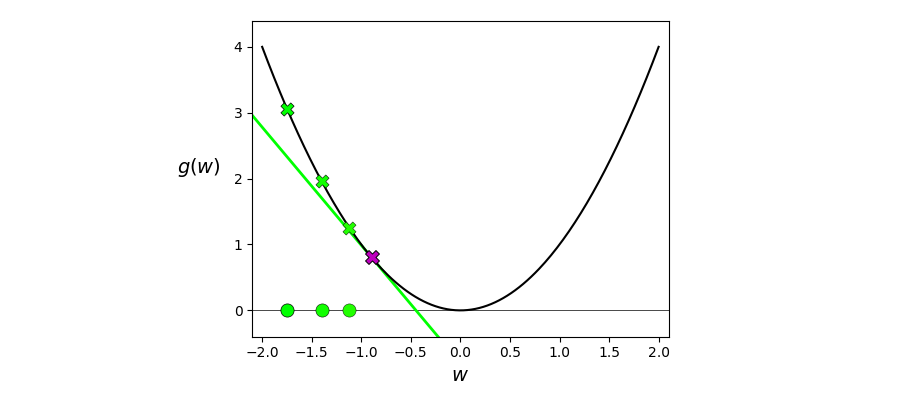
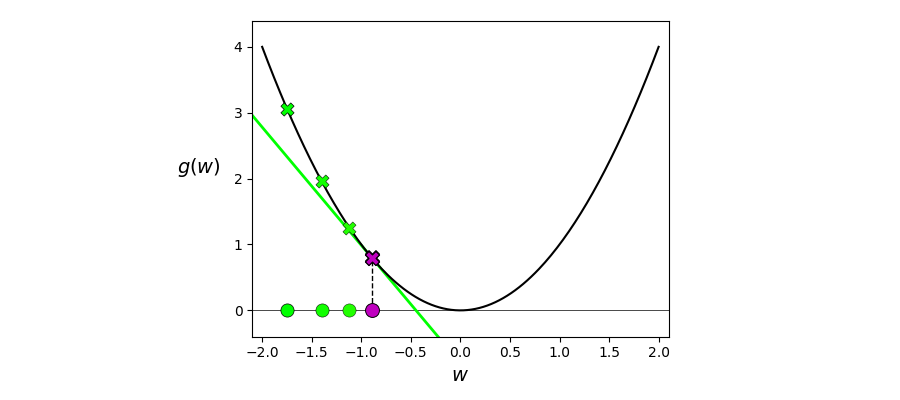
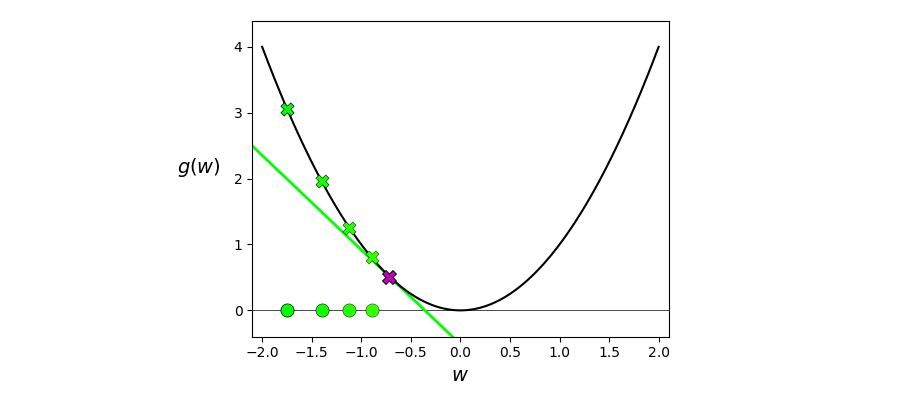
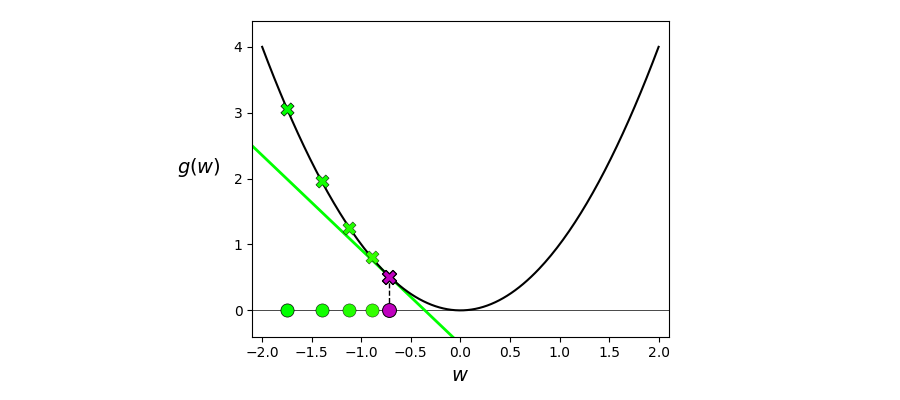
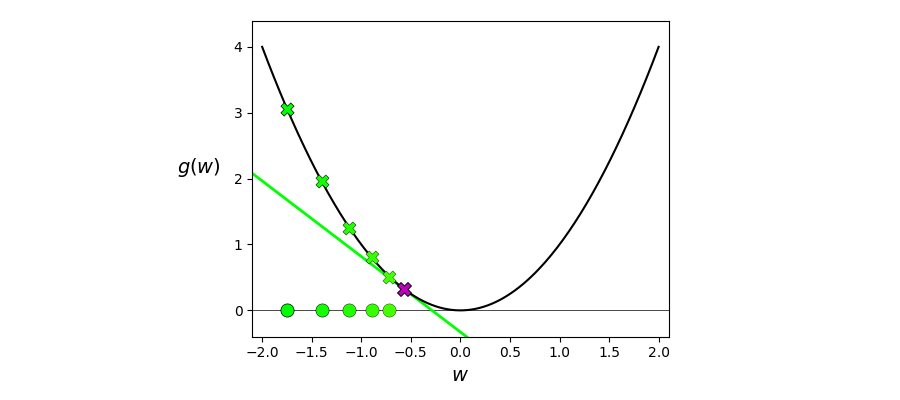
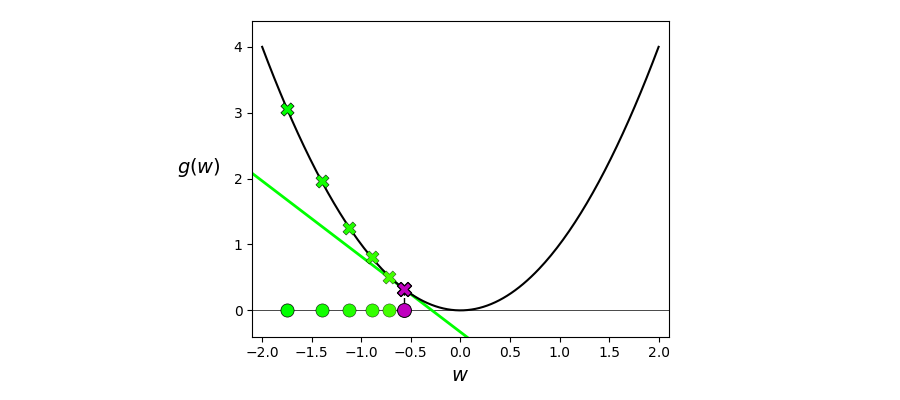
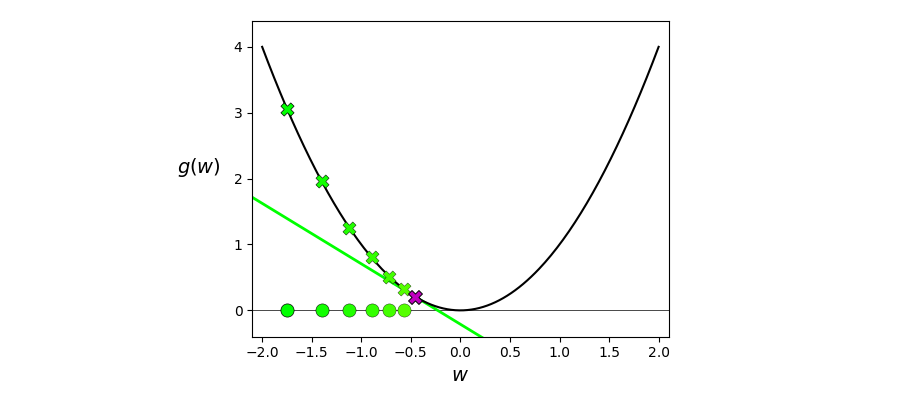
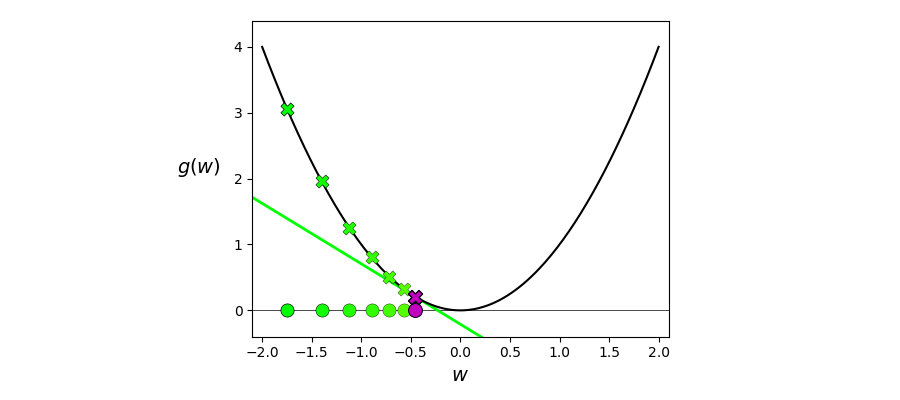
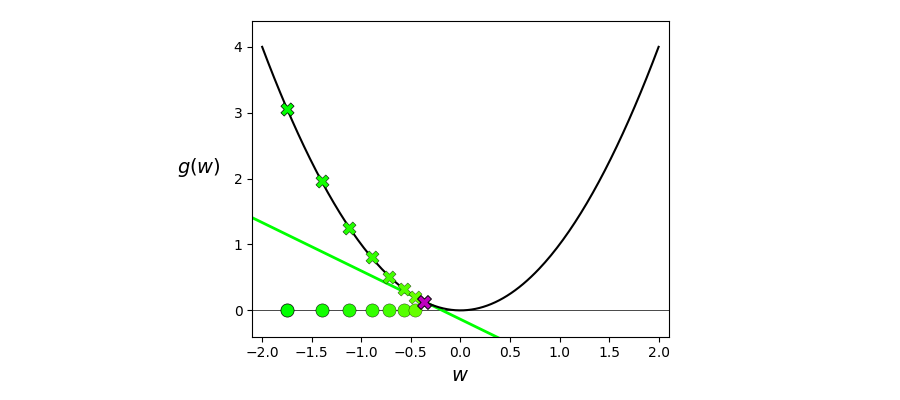
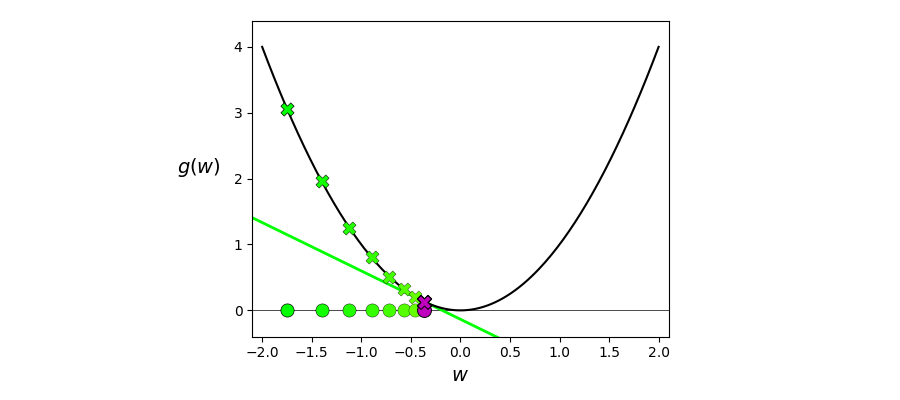
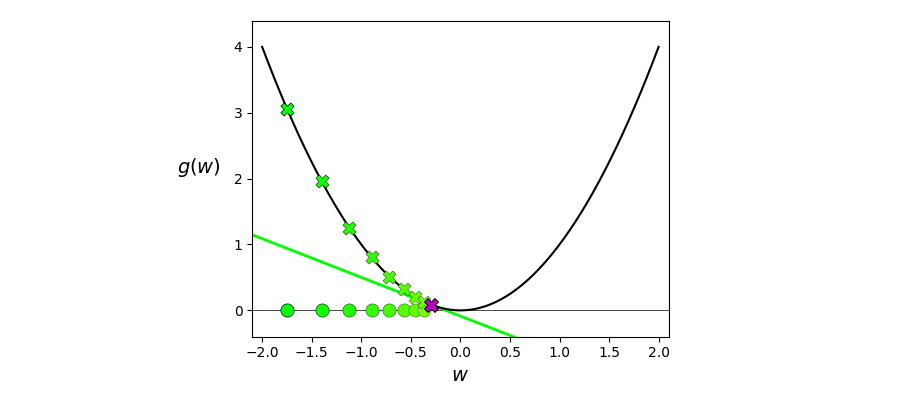
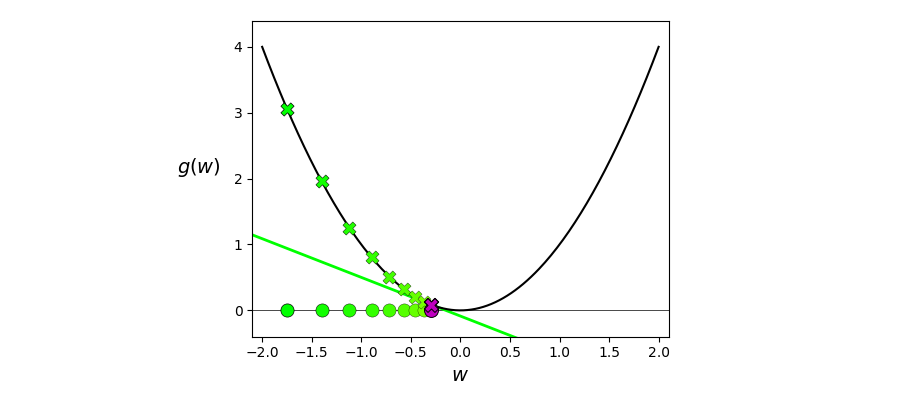
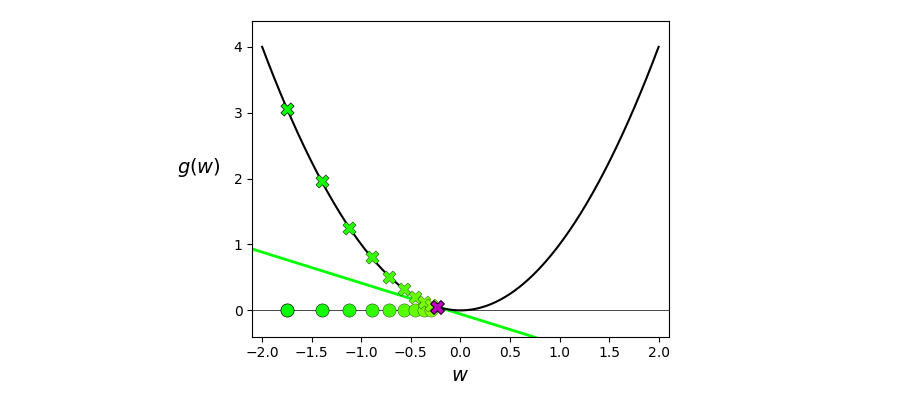
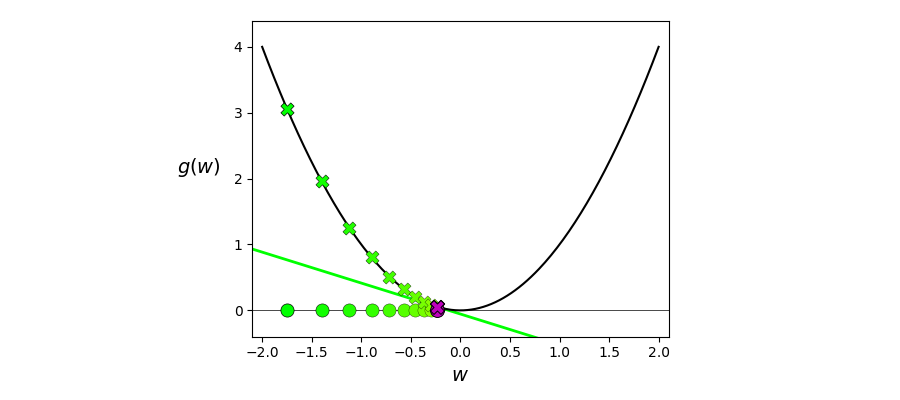
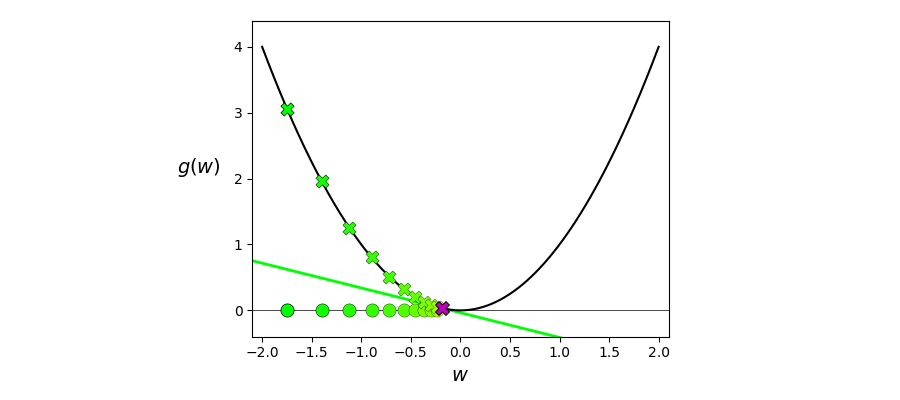
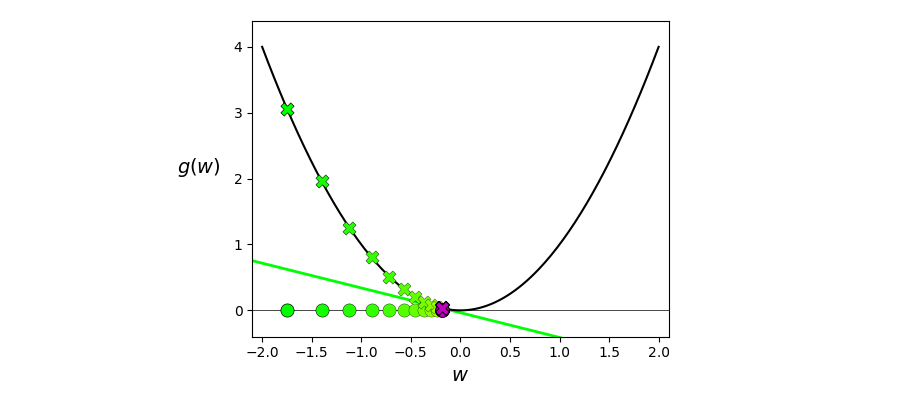
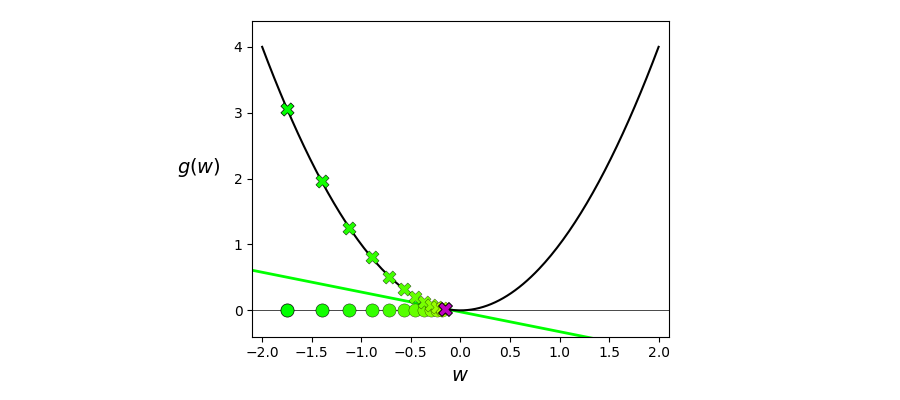
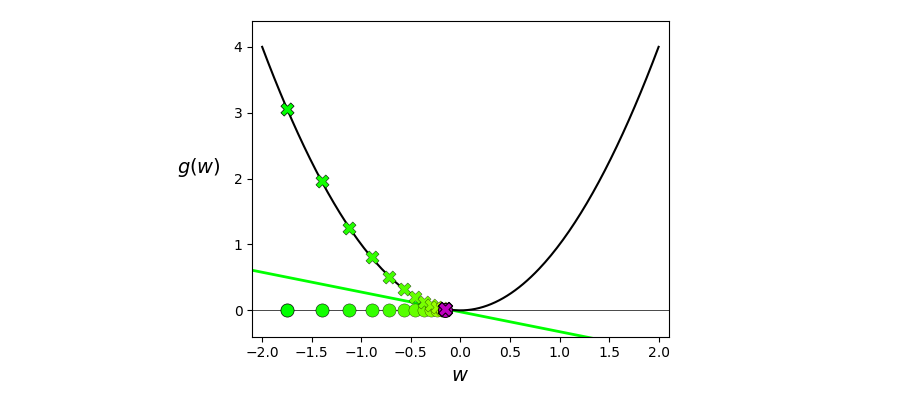
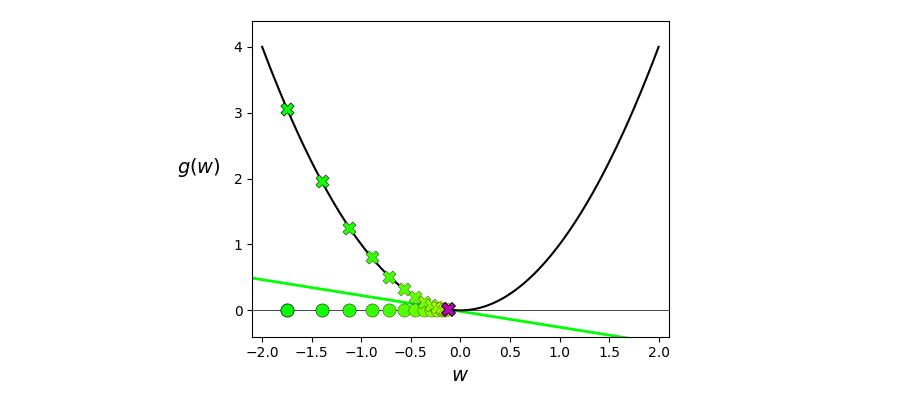
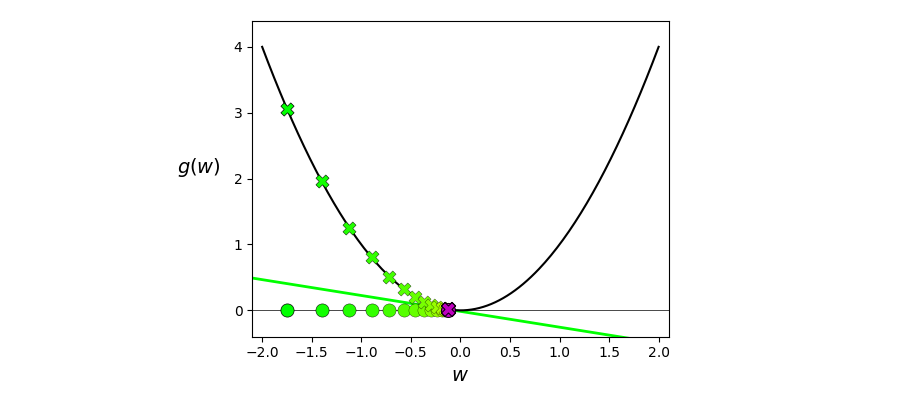
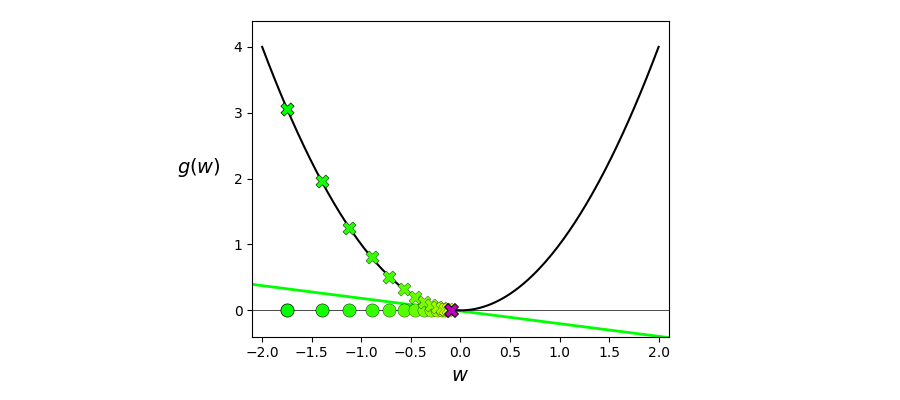
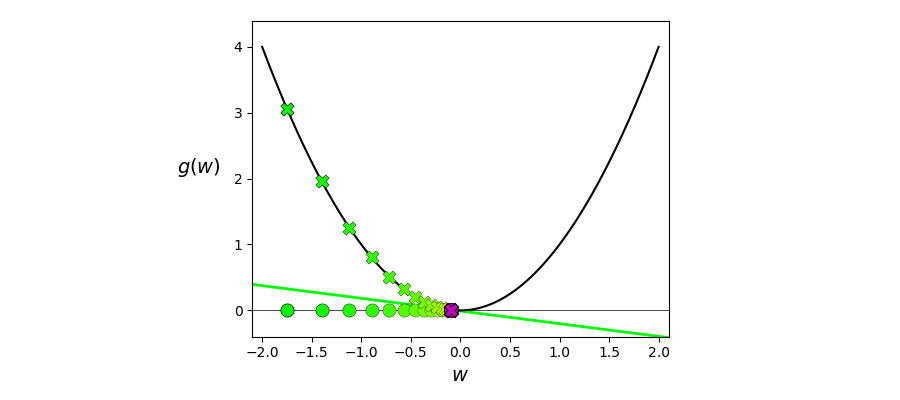
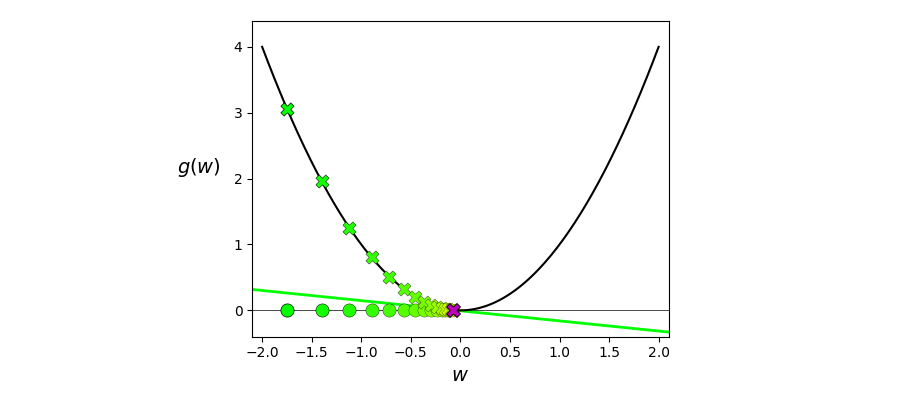
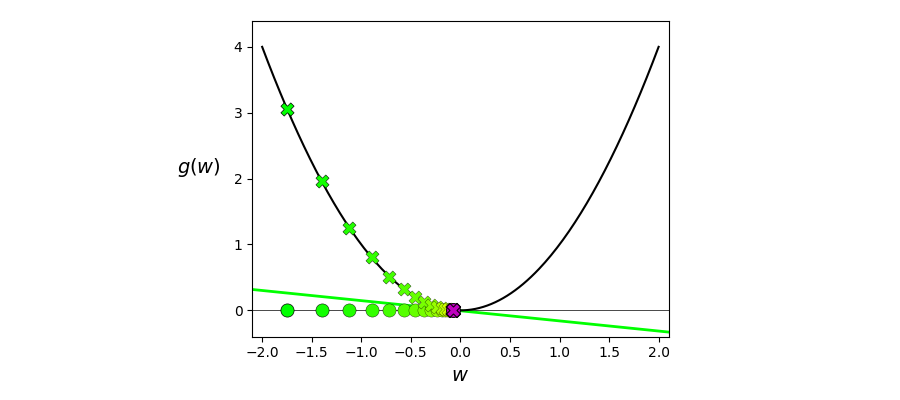
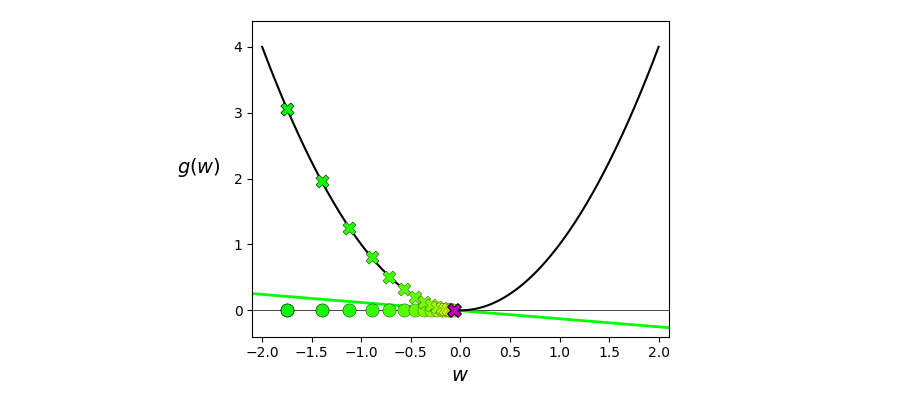
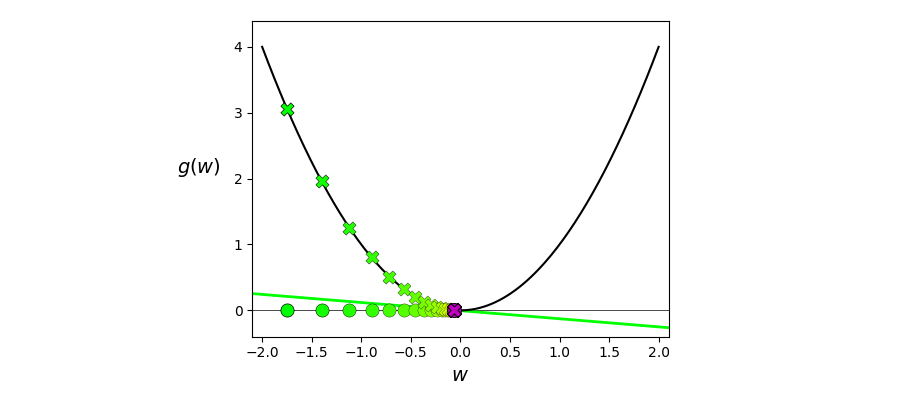
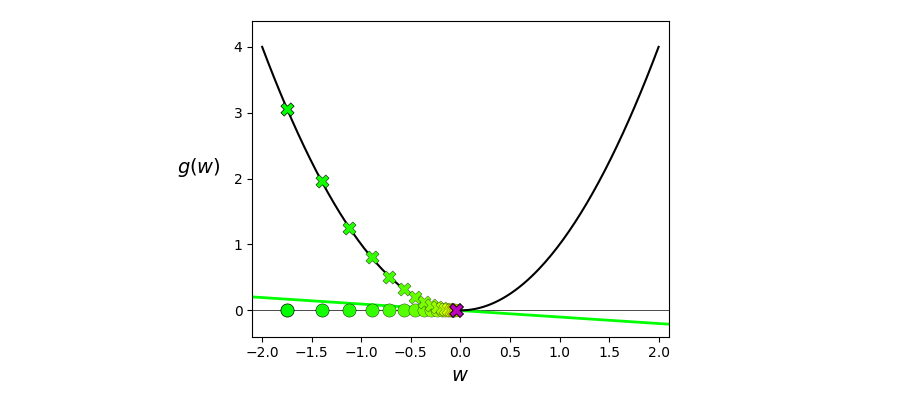
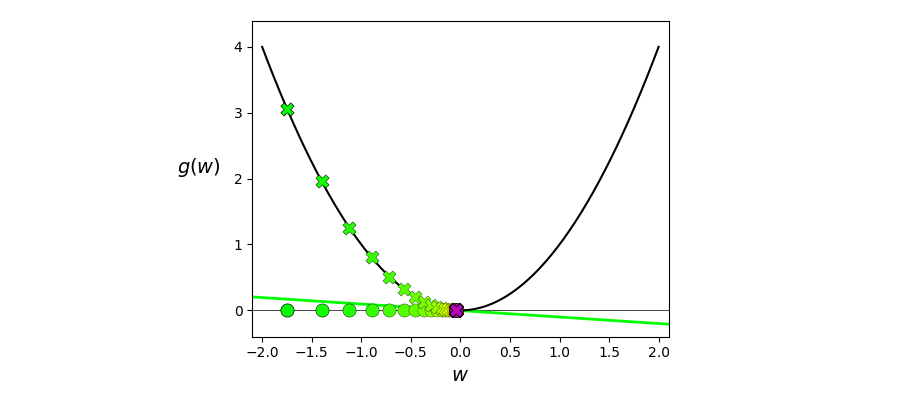
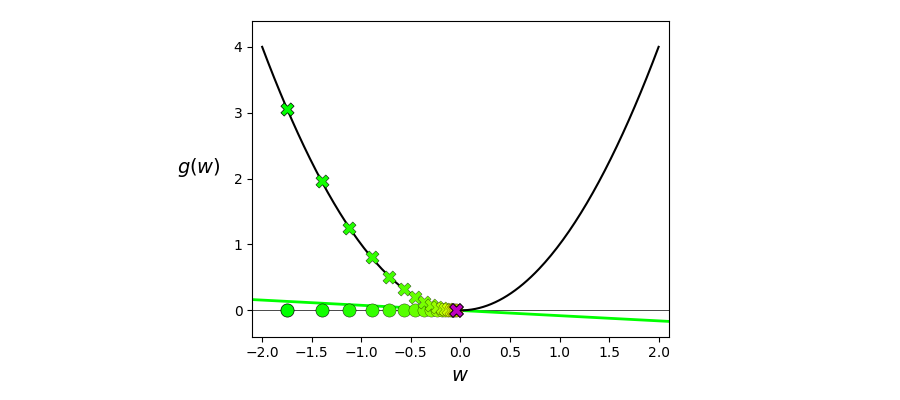
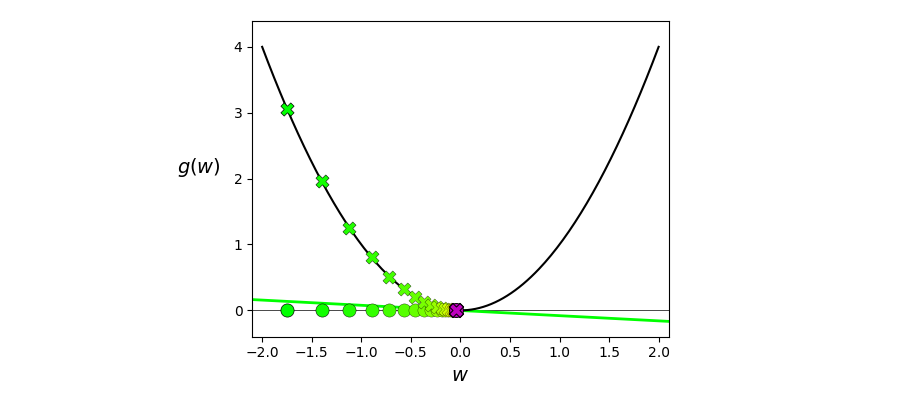
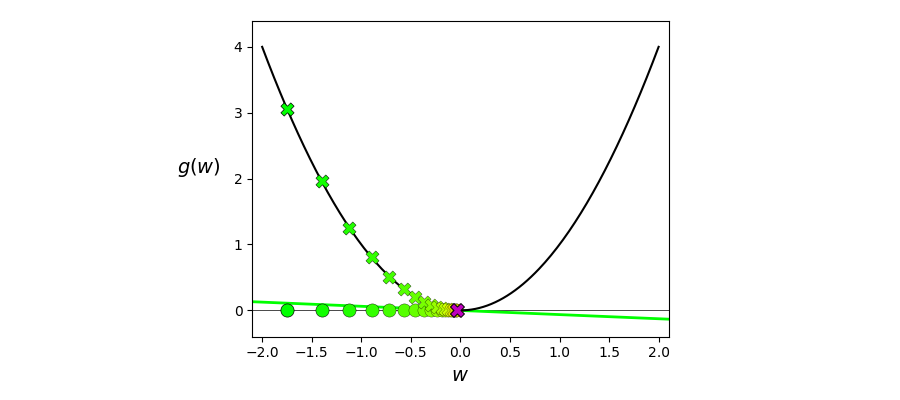
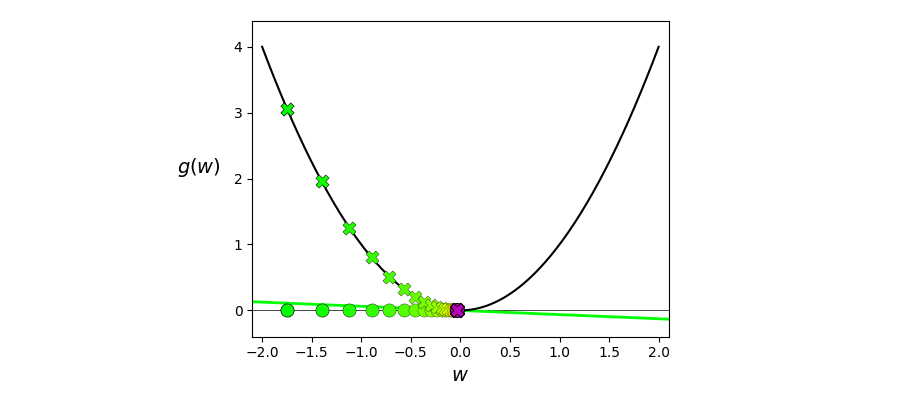
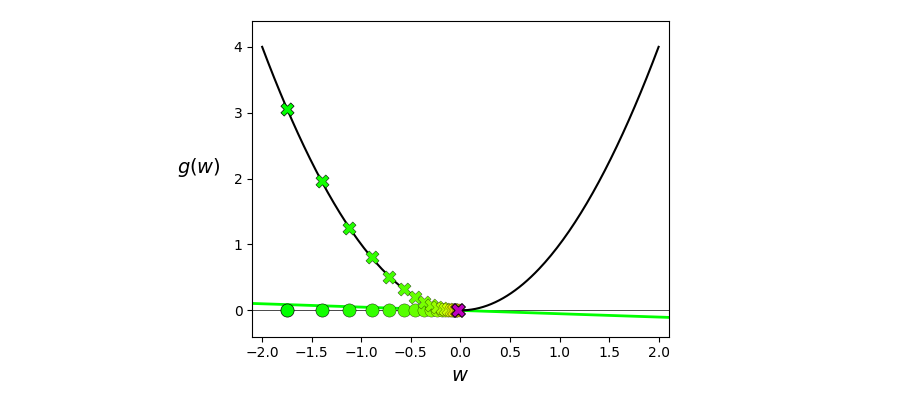
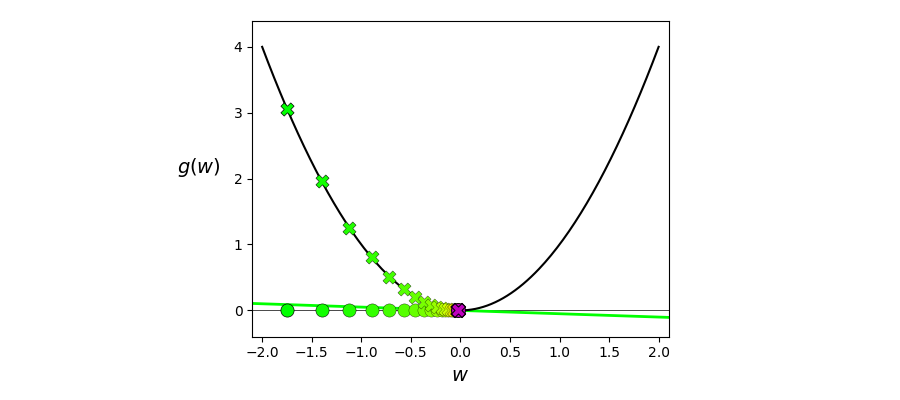
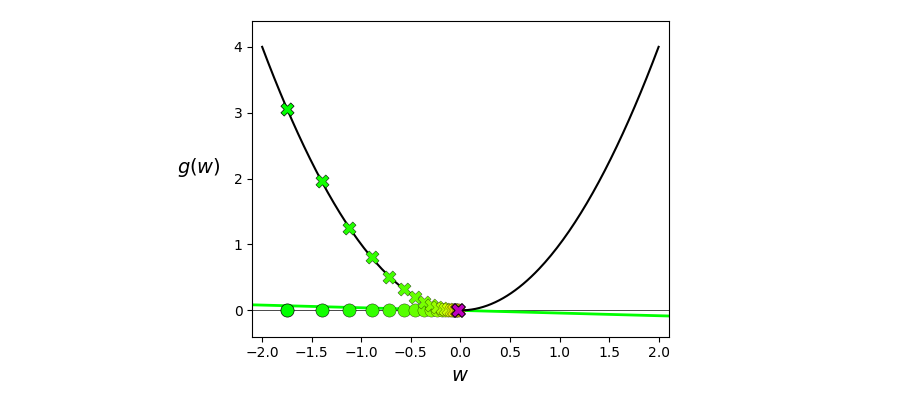
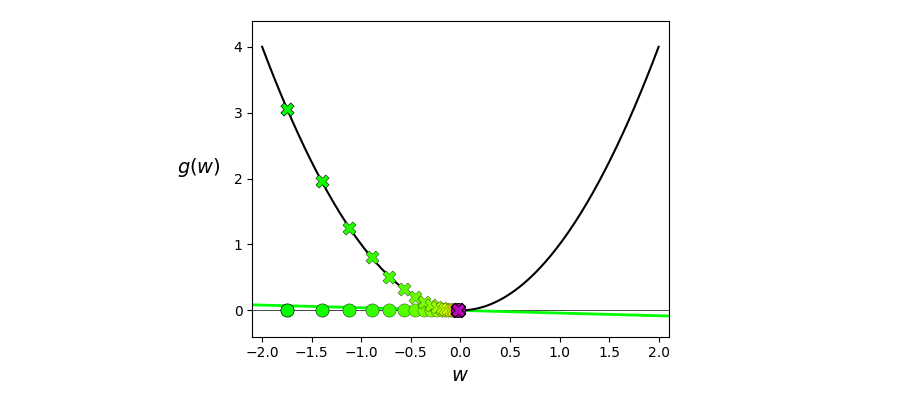
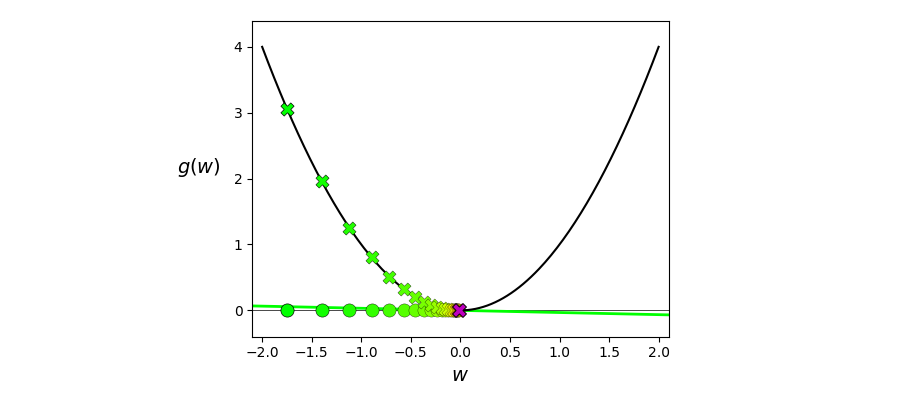
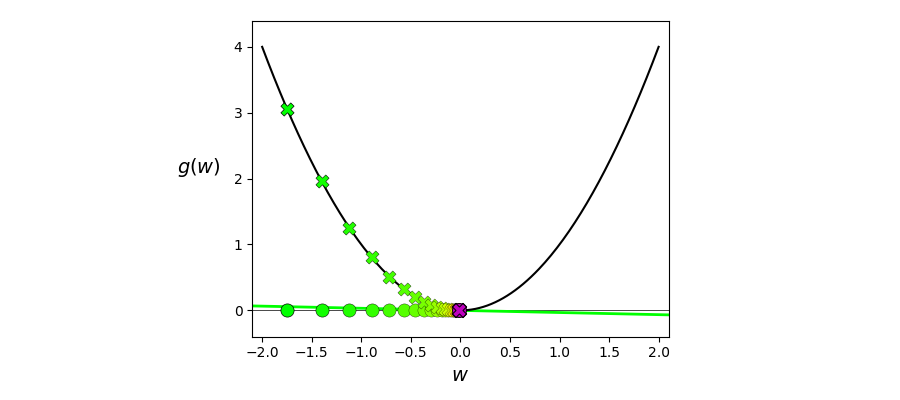
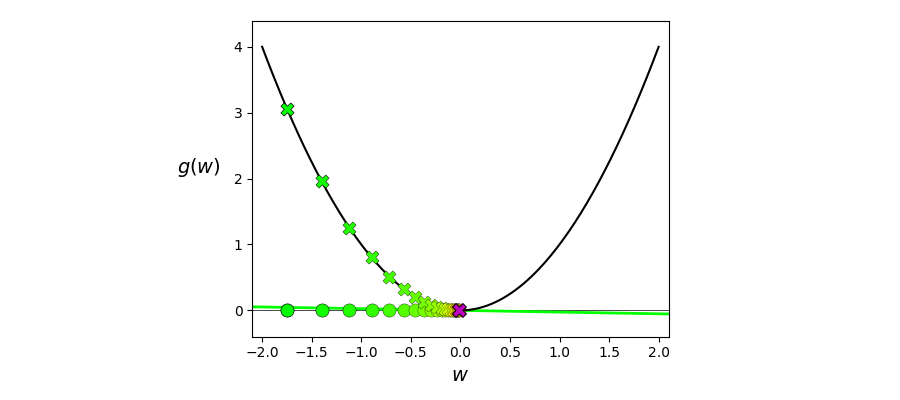
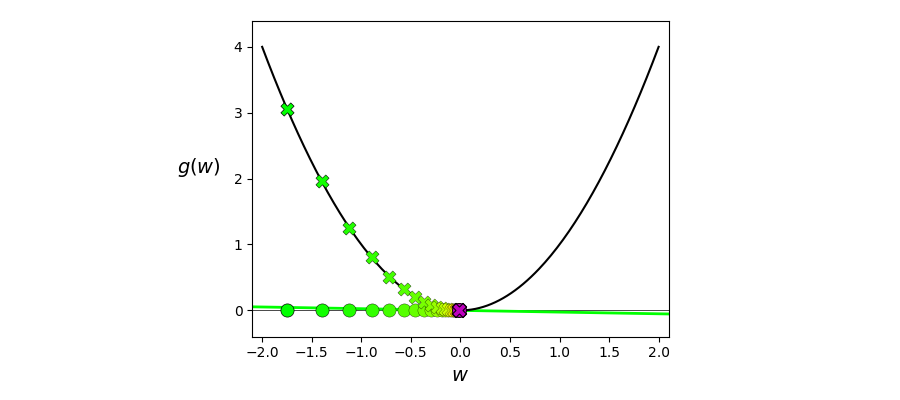
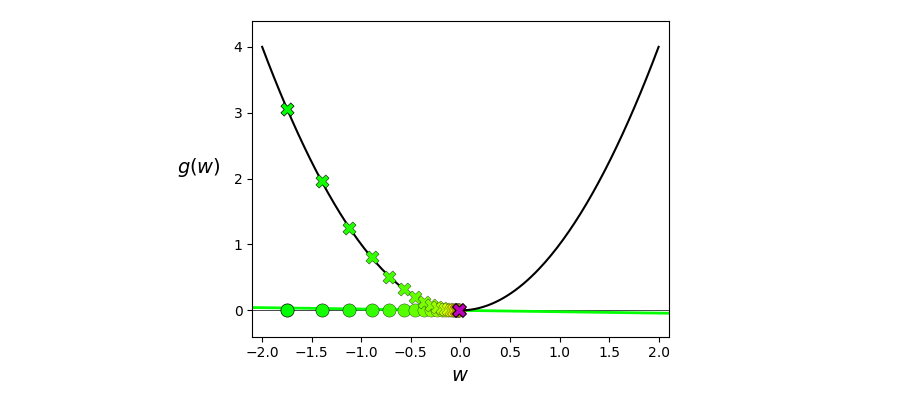
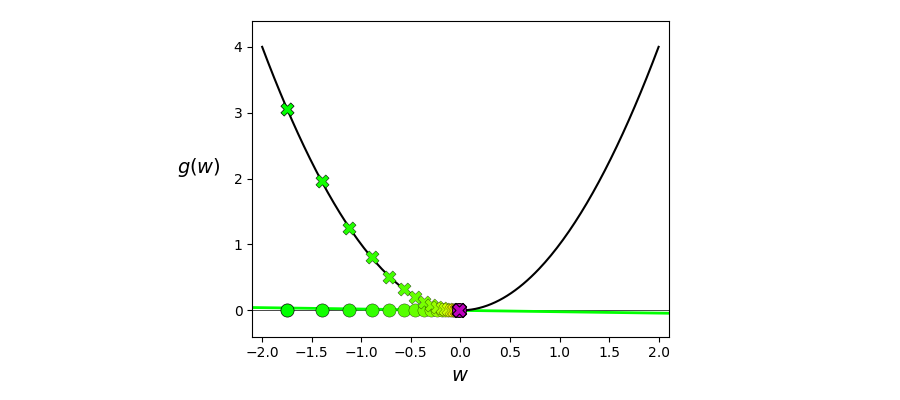
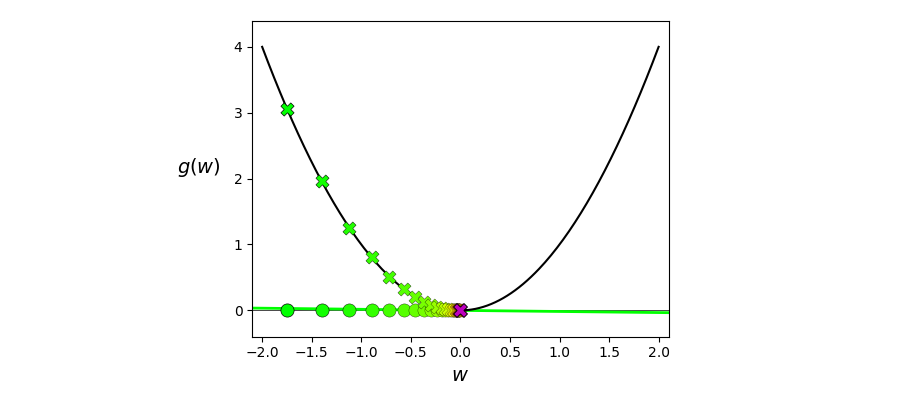
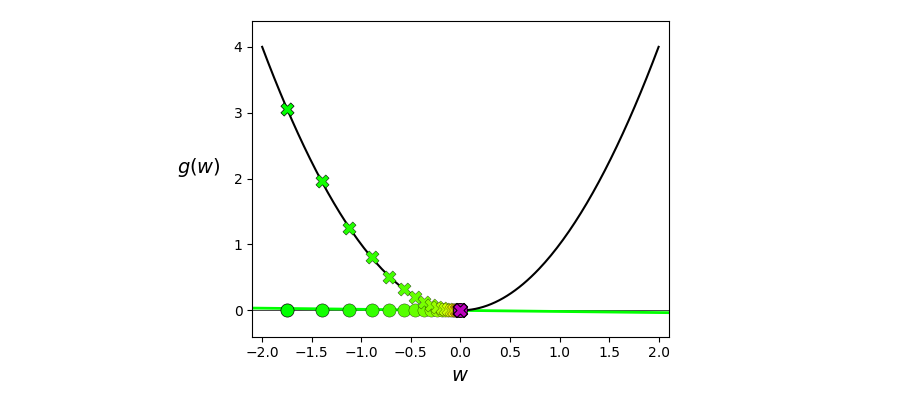
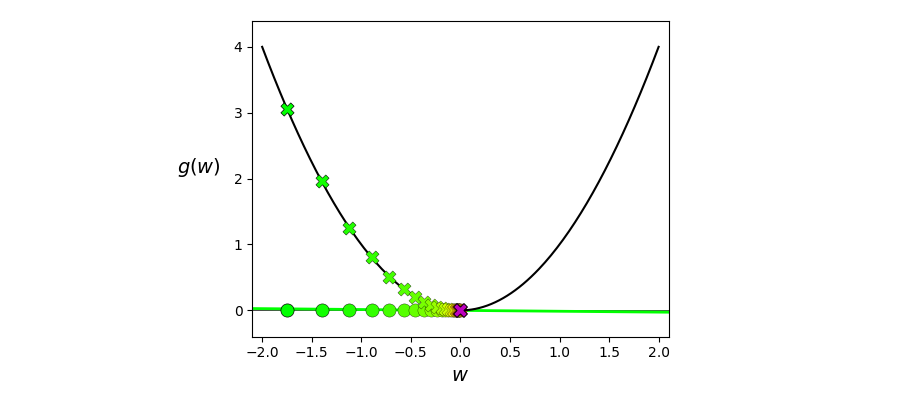
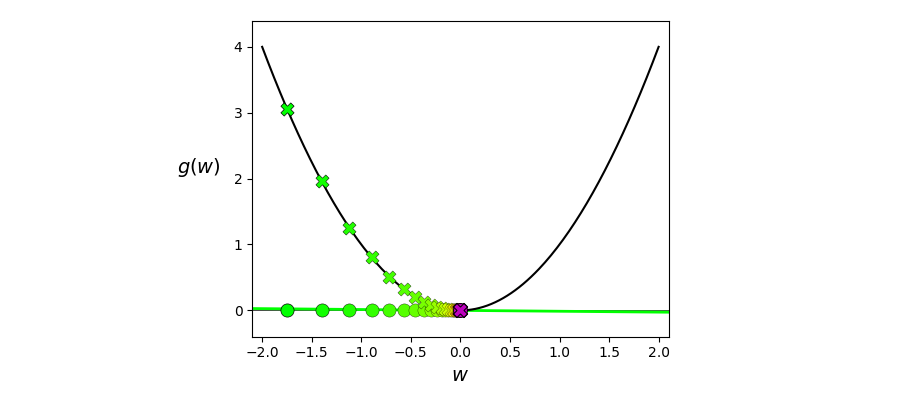
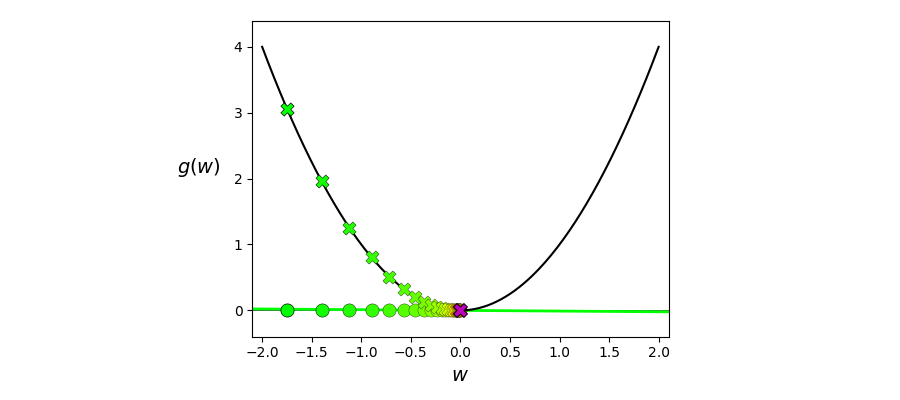
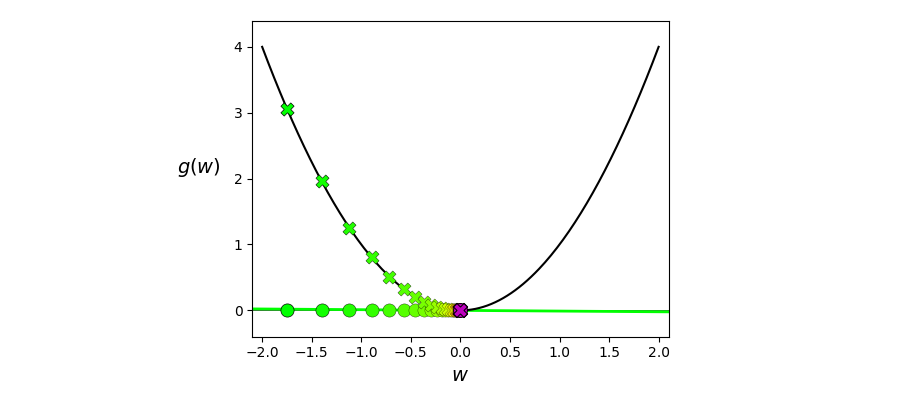
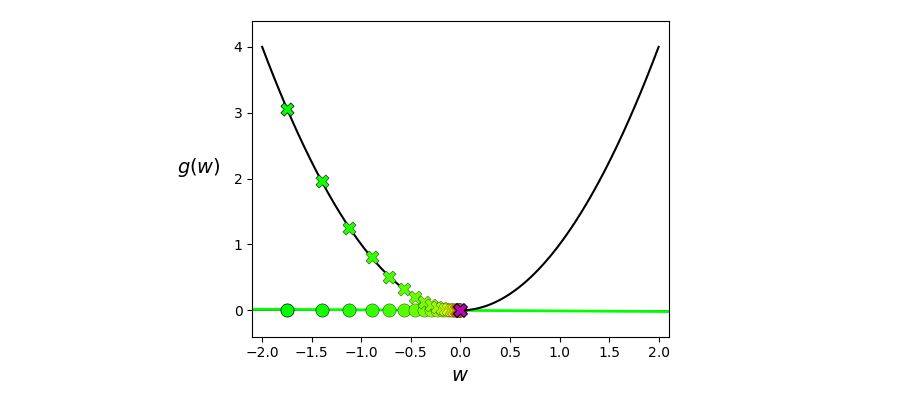
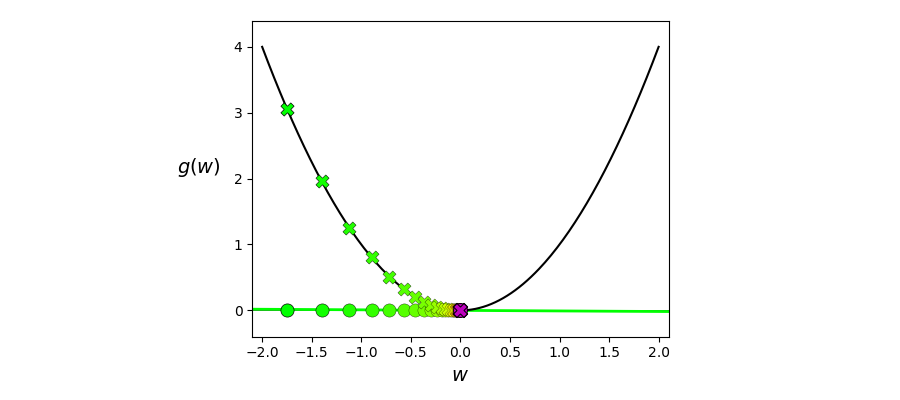
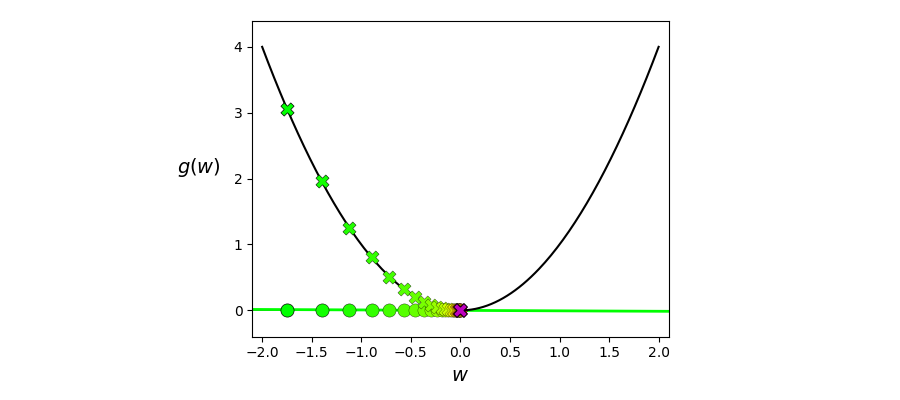
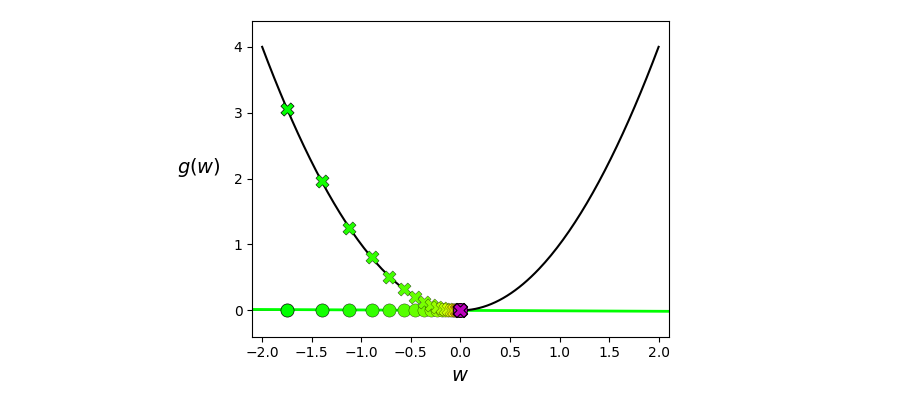
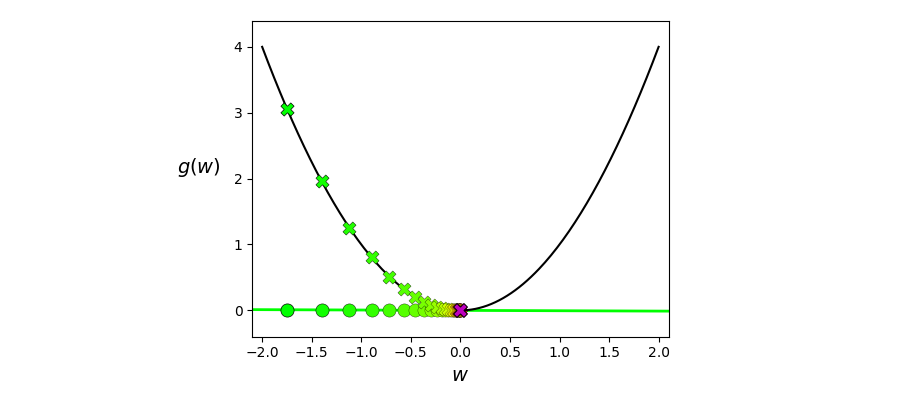
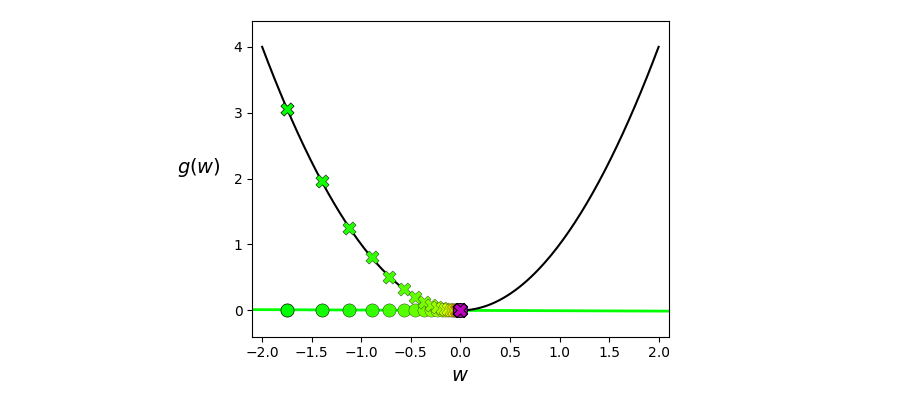
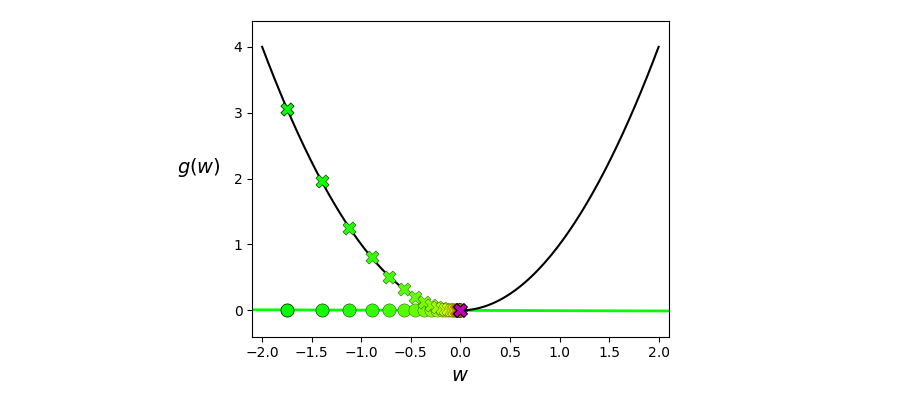
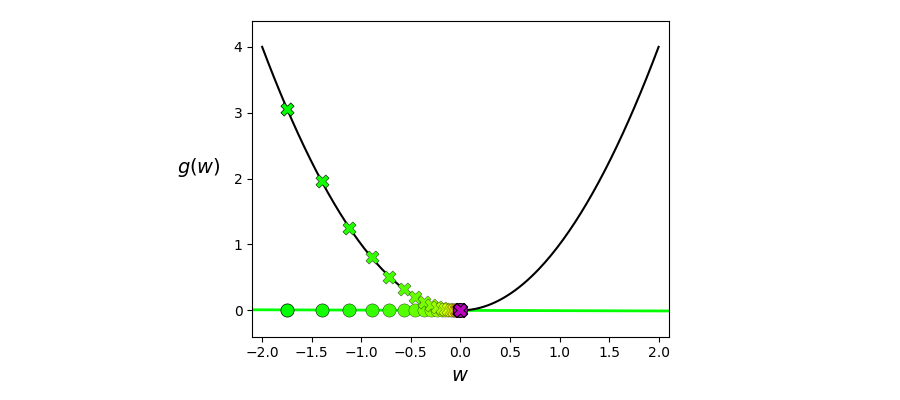
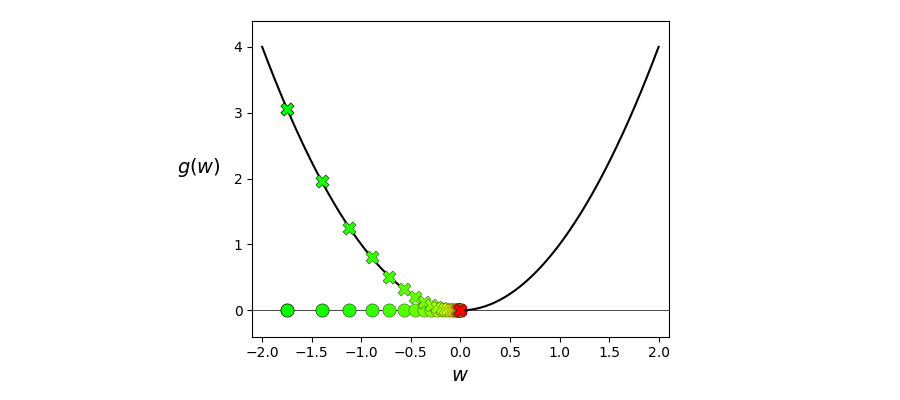

In [13]:
# what function should we play with?  Defined in the next line.
g = lambda w: w**2  

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.animate_2d(g=g, w_init = -1.75,steplength = 0.1,max_its = 30,version = 'unnnormalized',wmin = -2,wmax = 2)

Place the slider one unit left of its full right position, so that the final point is colored purple and the linear approximation is shown in lime green.  Now, lets discuss the convergence behavior of this run by examining the results above and the general form of the $k^{th}$ step in the unnormalized method

$$
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \nabla g(\mathbf{w}^{\,k-1})
$$

First off note how - by examining the horizontal axis of the plot above - we can see that while the steplength parameter $\alpha$ here was fixed the length of each step clearly decreased at each step.  This is of course due to the fact that the length of each step - given by $\alpha\left\Vert \nabla g\left(\mathbf{w}^{\,k-1}\right) \right\Vert_2$ as derived earlier - is inherently tied to the length of the gradient.  Here (and in general) as the length of the gradient gets smaller, the steps get shorter (and vice-versa).  Hence the method 'slow down' - taking smaller and smaller steps - near stationary points of a function.  Stated more formally, if the steps are extremely close, i.e., that  $\mathbf{w}^{\,k} \approx \mathbf{w}^{\,k-1}$ then from the unnormalized update step it must be the case that $\nabla g(\mathbf{w}^{\,k-1}) \approx \mathbf{0}_{N\times 1}$ or likewise that $\left\Vert \nabla g\left(\mathbf{w}^{\,k-1}\right)\right\Vert_2$ is small (with our example above we can indeed see that the derivative, or slope of the tangent line, is very close to zero).  This says that unnormalized gradient descent naturally halts near **any** stationary point of a function (including saddle points). (See our *Vital elements of calclus series* for more info on stationary points if this concept is unfamiliar.)  This feature makes the unnormalized gradient descent step a natural choice for minimizing convex functions - whose only stationary points are global minima.

In the next Python cell we compare normalized and unnormalized gradient descent (left and right panels respectively) on the simple quadratic function used previously.  Both algorithms use the same initial point ($w^0 = -3$), steplength parameter ($\alpha = 0.1$), and maximum number of iterations (20 each).  Steps are colored from green to red to indicate the starting and ending points of each run, with circles denoting the actual steps in the input space and 'x''s denoting their respective function evaluations.  Notice how - due to the re-scaling of each step via the derivative length - the unnormalized version races to the global minimum of the function. Meanwhile the normalized version - taking constant length steps - gets only a fraction of the way there.  This behavior is indicative of how each behaves in general when applied to minimizing convex functions. 

<IPython.core.display.Javascript object>


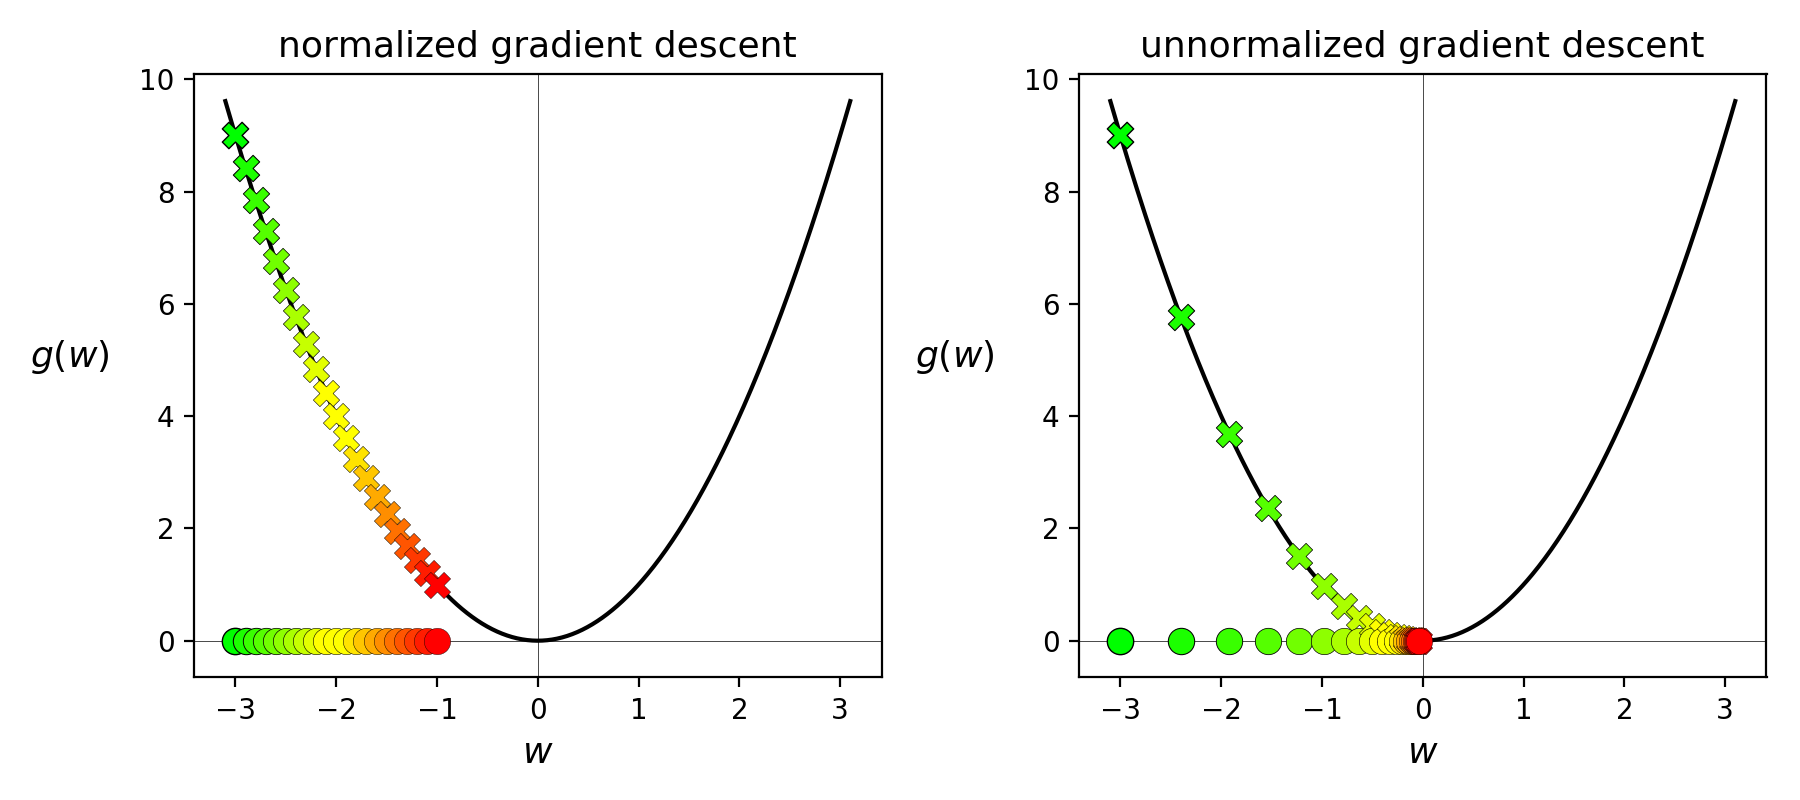

In [14]:
# what function should we play with?  Defined in the next line.
g = lambda w: w**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();
demo.compare_versions_2d(g=g, w_init = -3,steplength = 0.1,max_its = 20)

Another example, consider the same quadratic with $N = 2$ inputs which we illustrate - along with a run of each version of the algorithm - in the next Python cell.   As can be seen in the plot, when using a constant steplength parameter $\alpha = 0.7$ the length of each step with the unnormalized algorithm naturally *diminishes* as it approaches the stationary point (the global minimum) due to the shrinking gradient, and this helps it 'zero in' on the minimum and get infinitesimally close to it.  Conversely with the normalized gradient descent algorithm - which takes steps of the length $\alpha$ ad infinitem - we can only get so close to the global minimum.  We cannot 'zero in' on the solution at the origin as well as the unnormalized version can.

This is indicative of a more general behavior of the normalized gradient descent algorithm with functions such as this - if we want a point infinitesimally close to a global minimum we must *use a diminishing steplength*.  This gives the normalized algorithm a chance to 'zero in' on minima.  Thus for a general function we see that gradient descent 'zeros in' local minima only when the length of each step (eventually) diminishes as the algorithm progresses.  In the case of normalized gradient descent this implies that the steplength parameter $\alpha$ should be diminishing in size if such a solution is needed.

<IPython.core.display.Javascript object>


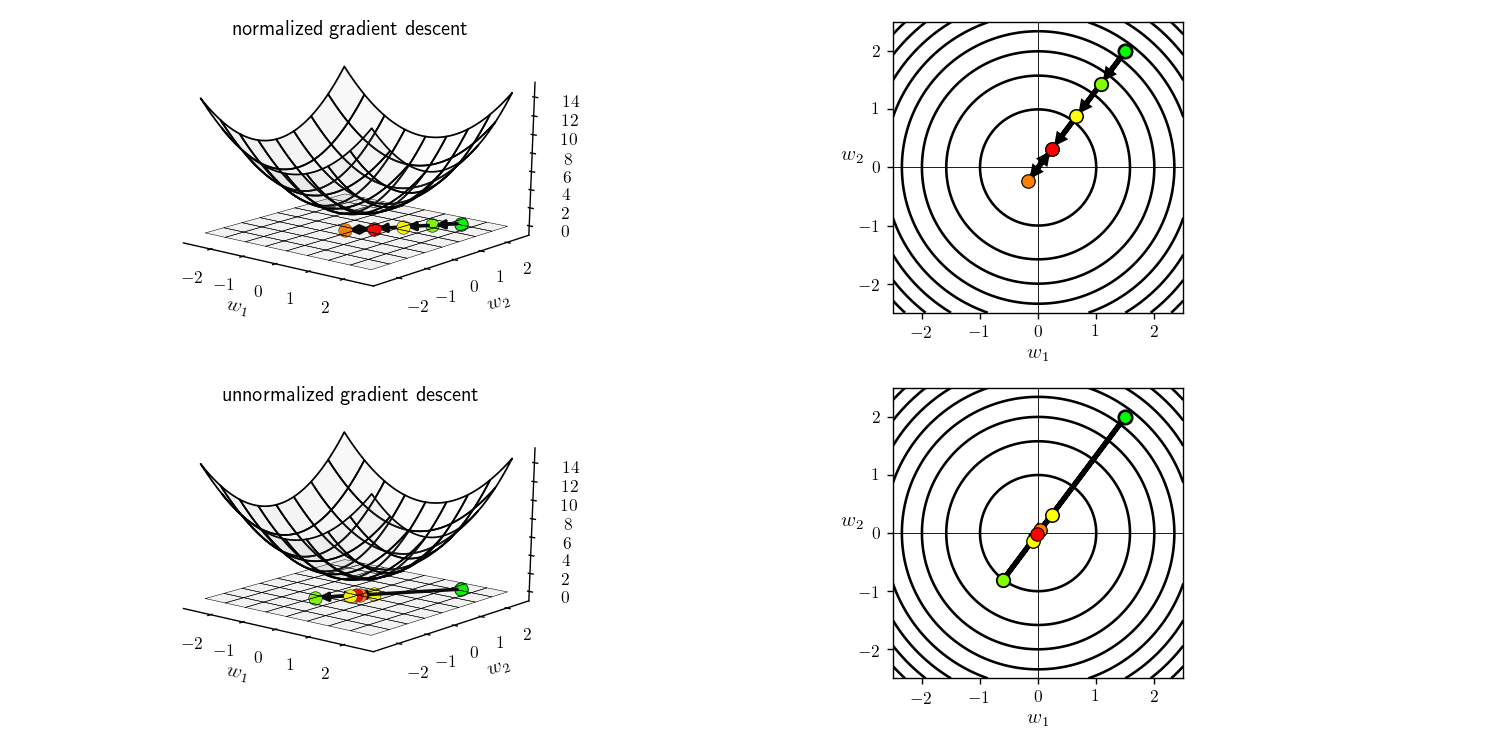

In [5]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.dot(w.T,w) + 2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();
w_init = [1.5,2]; max_its = 5; steplength = 0.7;

demo.compare_versions_3d(g,w_init,steplength,max_its,wmax=max(w_init[0],w_init[1]))

Note that it is not always the case with a convex function that the magnitude of the gradient diminishes as we approach global minima.  Take the absolute value function for example

\begin{equation}
g(w) = |w|
\end{equation}

which has a single global minimum at $w = 0$, but whose derivative is always defined (everywhere but at $w = 0$) as

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = \begin{cases}
+1 \,\,\,\,\,\text{if} \,\, w > 0 \\
-1 \,\,\,\,\,\text{if} \,\, w < 0.
\end{cases}
\end{equation}

Since the length of each step with unnormalized gradient descent is dependent on the magnitude of this derivative, the fact that it's length here does not change means that we are essentially taking normalized steps.

Hence - for example - if we initialize at $w = 1.7$ with a steplength value $\alpha = 0.5$ and run for $10$ steps we oscilate around the global minimum, as with normalized gradient descent.  We illustrate this in the next cell.

<IPython.core.display.Javascript object>


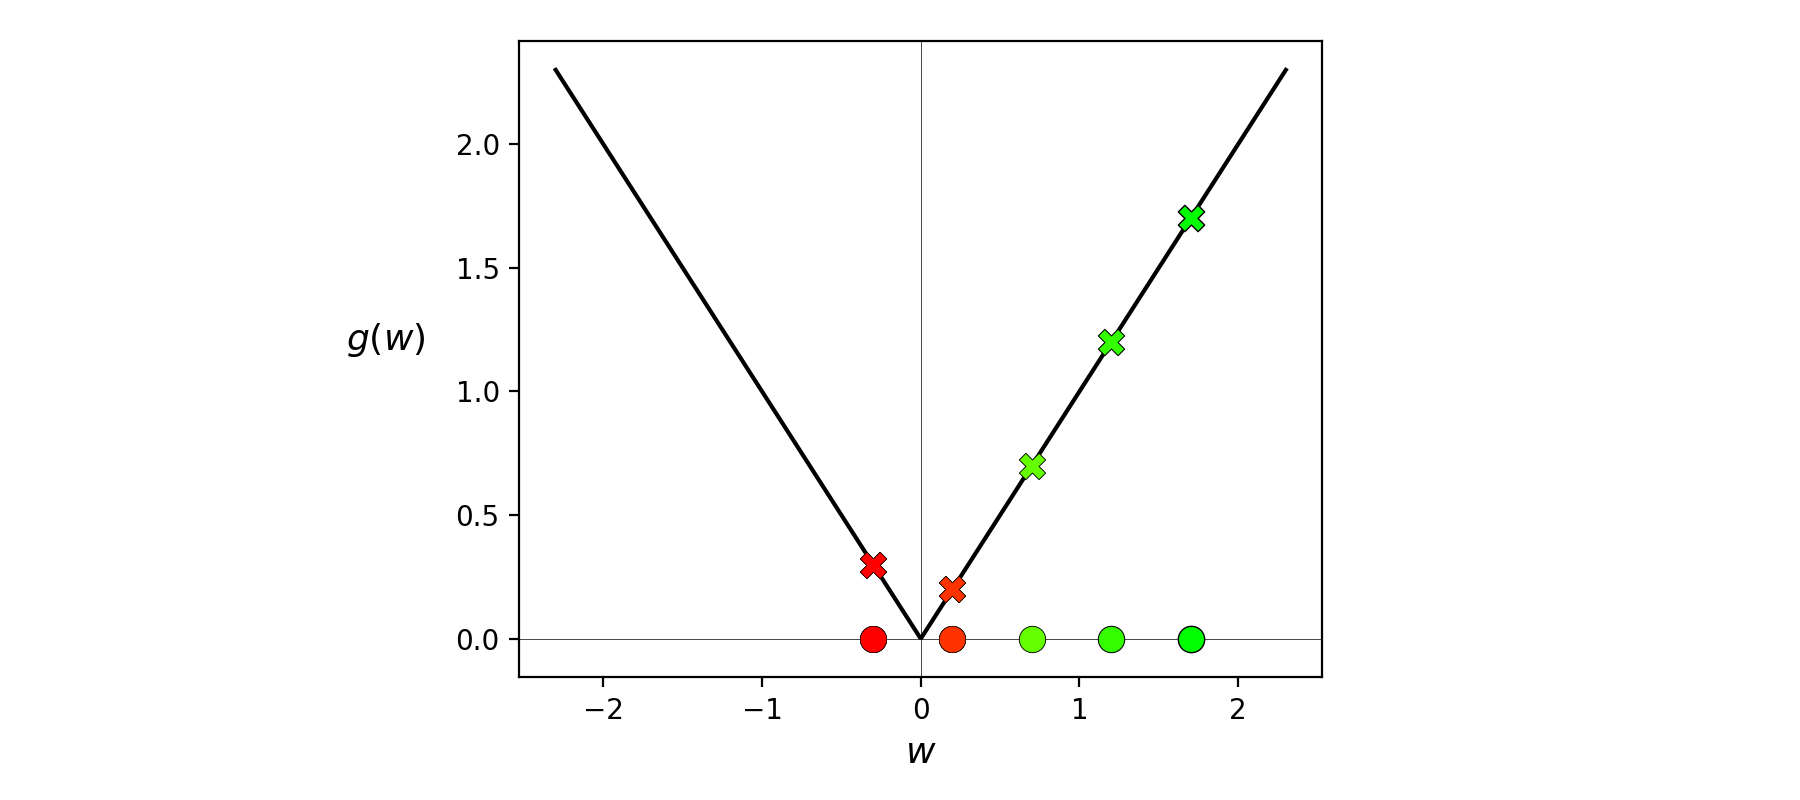

In [16]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.abs(w)

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.draw_2d(g=g, w_inits = [1.7] ,steplength = 0.5,max_its = 10,version = 'unnormalized',wmin =-2.3,wmax = 2.3)

Here - as with normalized descent - because the length of each step is not diminishing as we approach the global minima naturally, we must force it too by using a diminishing steplength value $\alpha$ if we wish to reach a point infinitesimally close to the minimum.  We-rerun the example above using a diminishing steplength value $\alpha$ in the Python cell below, and indeed we get much closer to the global minimum.

<IPython.core.display.Javascript object>


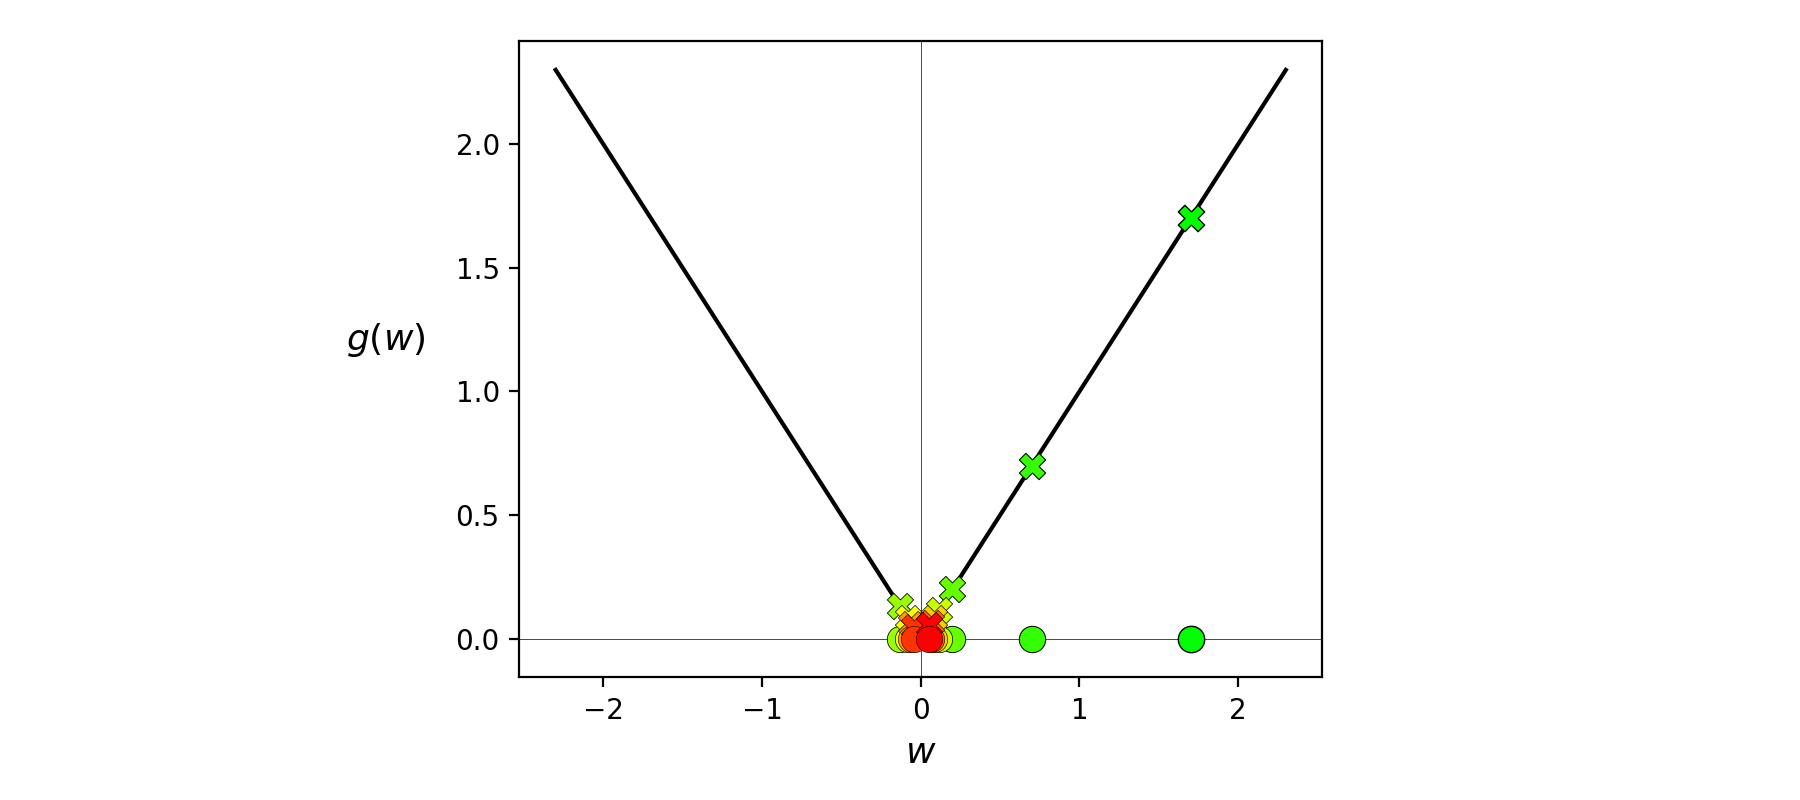

In [17]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.abs(w)

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.draw_2d(g=g, w_inits = [1.7] ,steplength = 'diminishing',max_its = 10,version = 'unnormalized',wmin =-2.3,wmax = 2.3)

A close cousin to the absolute value is the sum of relu functions.  For example

\begin{equation}
g(w) = \text{max}(0,w - 0.5) + \text{max}(0,-w - 0.5)
\end{equation}

This is like an absolute value function with a long flat region of global minima at the bottom.  Here we can use a diminishing steplength, or pick the steplength value small enough so that we reach the flat region of global minima (and here we will stay since it is perfectly flat).  We run the same setup of gradient descent using the sum of relu functions above to illustrate using a fixed steplength value $\alpha = 0.5$.  Since there is a large region of global minima we can indeed reach a global minimum using this fixed steplength provided

<IPython.core.display.Javascript object>


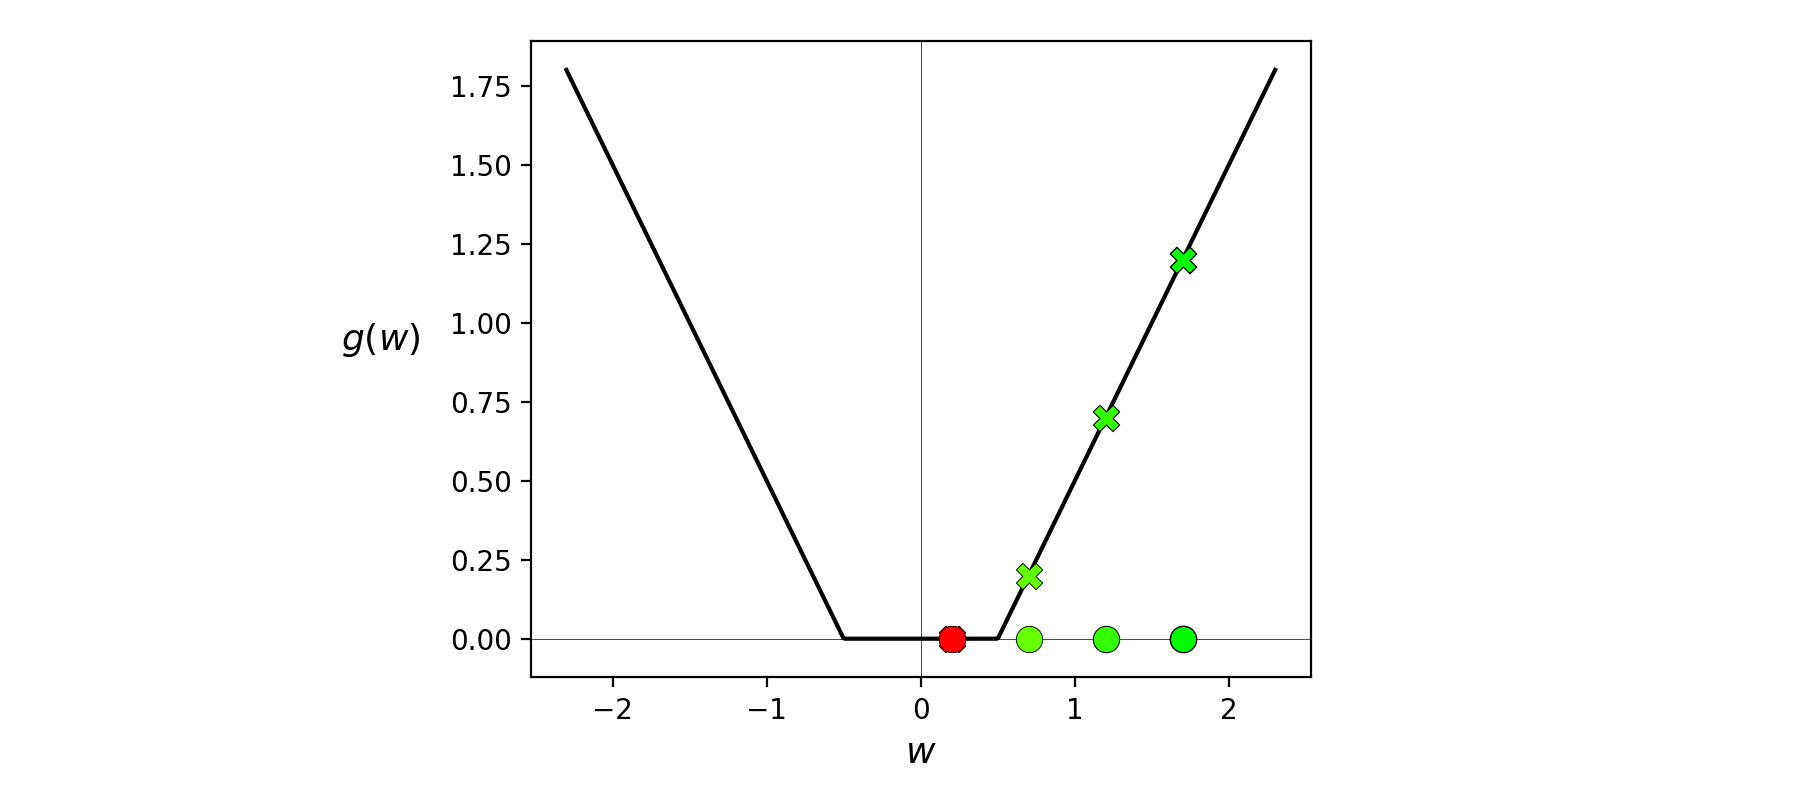

In [18]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.maximum(0,w - 0.5) + np.maximum(0, - w - 0.5) 

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.draw_2d(g=g, w_inits = [1.7] ,steplength = 0.5,max_its = 10,version = 'unnormalized',wmin =-2.3,wmax = 2.3)

#### <span style="color:#a50e3e;">Example 8. </span>  (normalized) gradient descent and non-convex functions with saddle points and flat regions 

In this example we illustrate a very useful amenity of the normalized gradient scheme: the avoidance of saddle points that comes by controlling the exact length of each descent step via the steplength parameter.  The first function we use to illustrate this advantageous behavior is the following

$$
g(w) = \text{maximum}(0,(3w - 2.3)^3 + 1)^2 + \text{maximum}(0,(-3w + 0.7)^3 + 1)^2
$$

This function has a minimum at $w= \frac{1}{2}$ and saddle points at $w = \frac{7}{30}$ and $w = \frac{23}{30}$.  

To illustrate how normalized gradient descent can pass over the saddle point of this function we make a run starting at the point $w^0 = 0$, use a fixed steplength of $\alpha = 0.01$, and take $55$ steps.  We then produce an animation like the ones used above in the next Python cell, where one can use a slider mechanism to watch the run progress from its initialization (in green) to its final value (in red).  Notice how smoothly the run passes by the saddle point.  If we keep track of the weight associated with smallest function value here, we will get something very close to the global minimum.


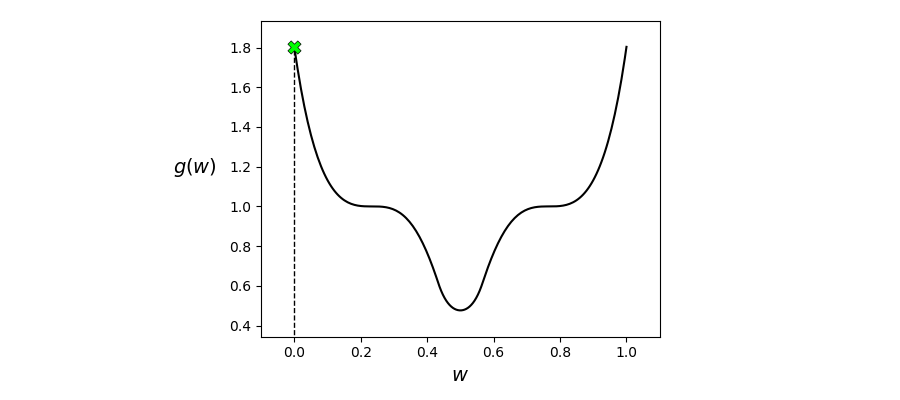
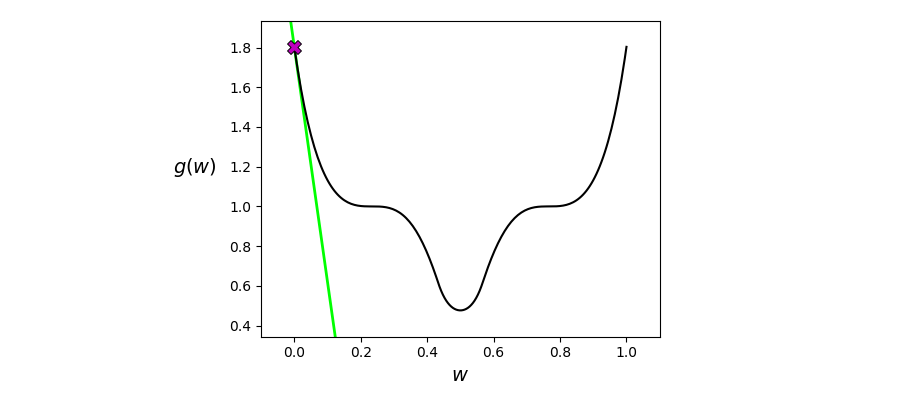
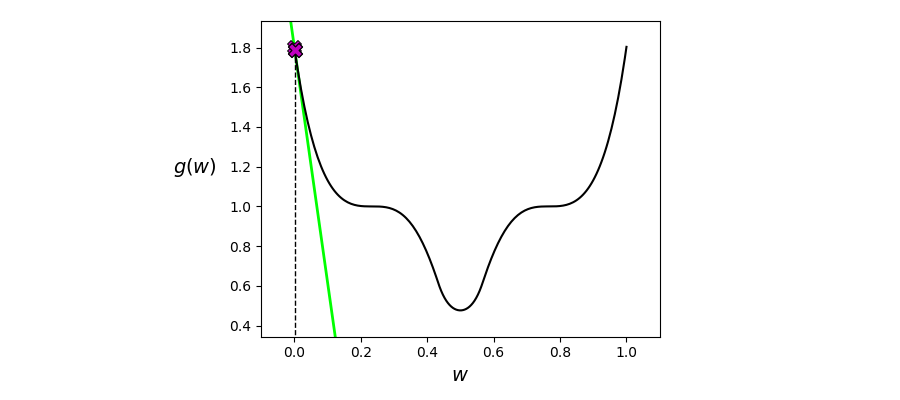
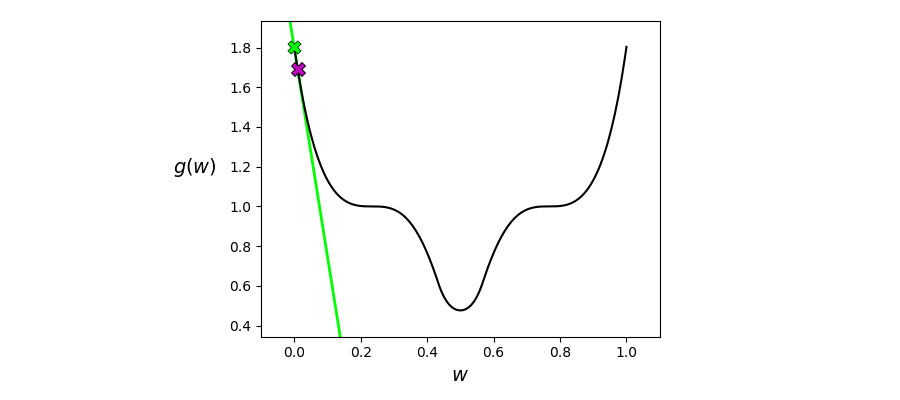
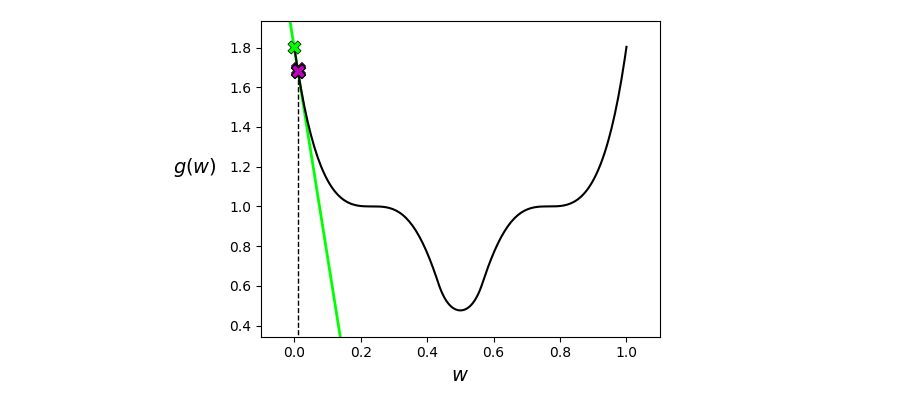
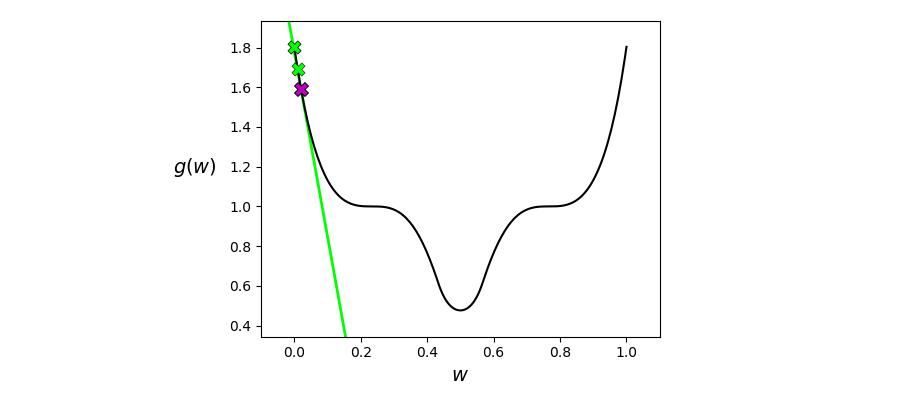
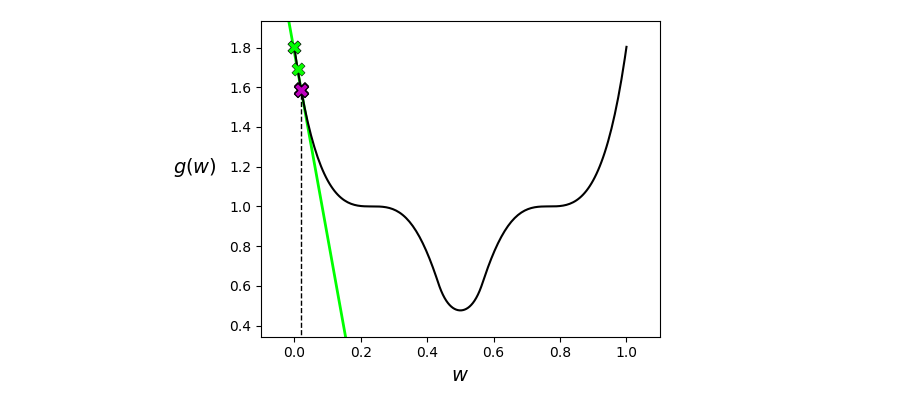
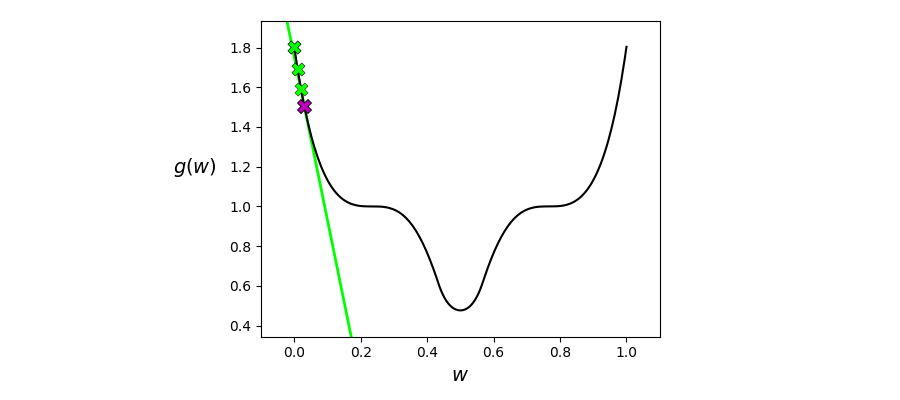
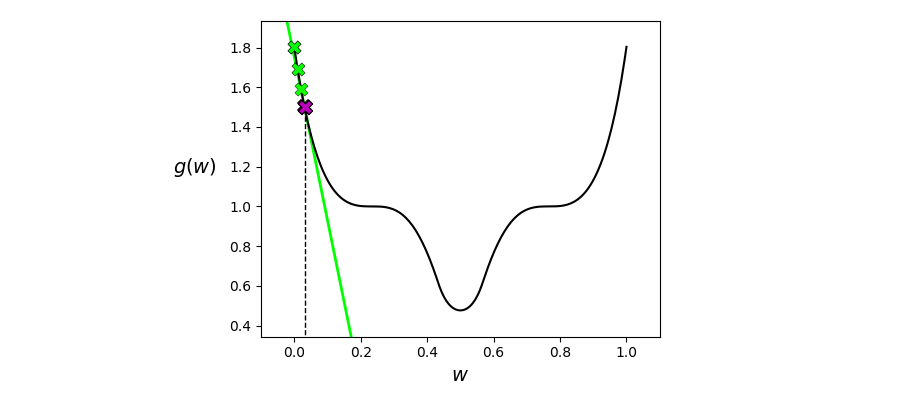
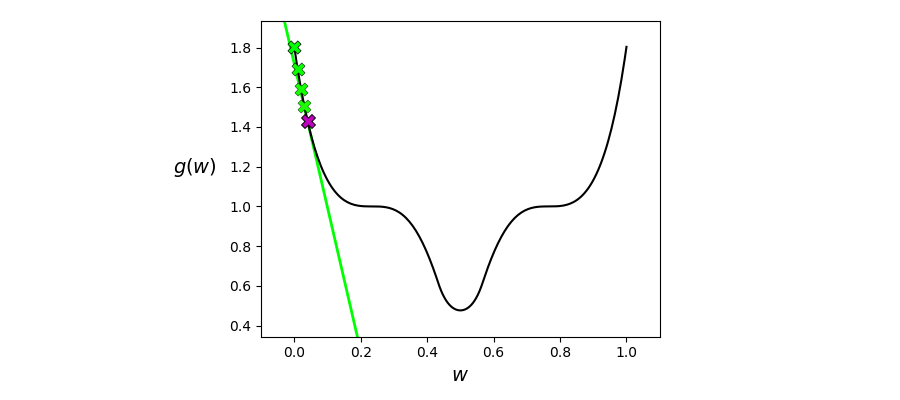
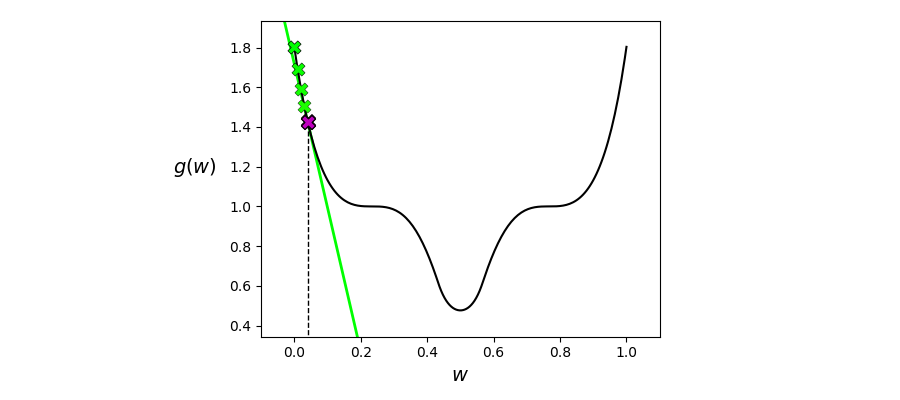
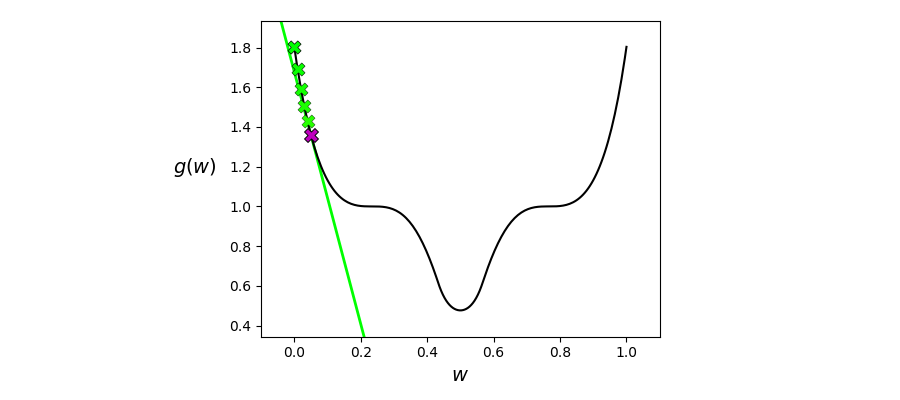
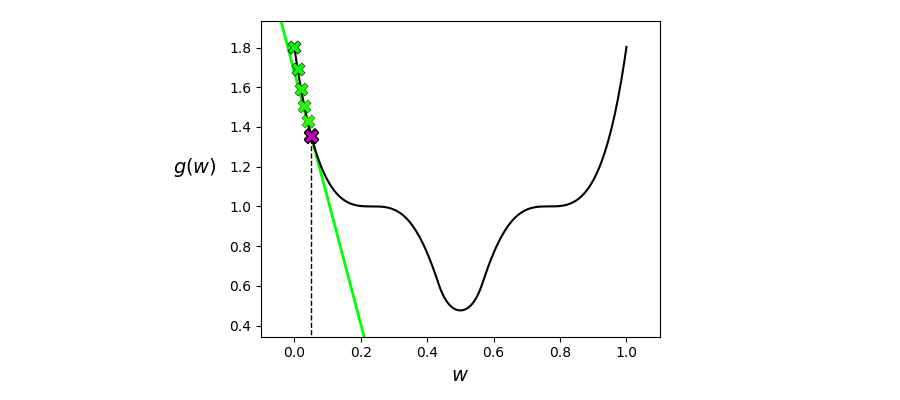
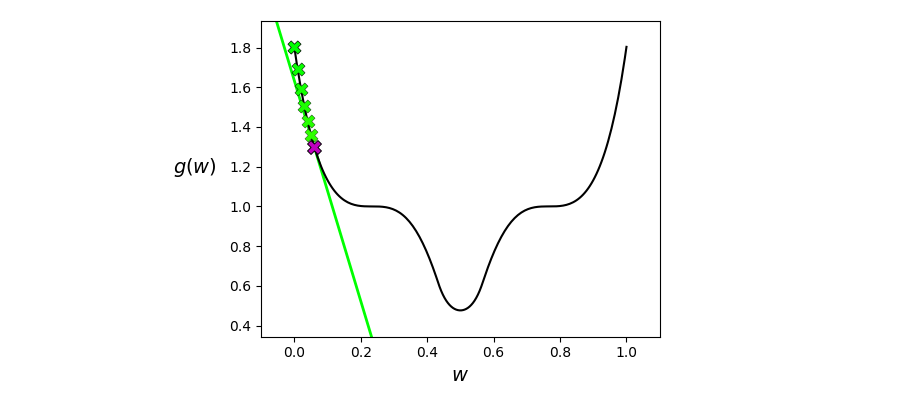
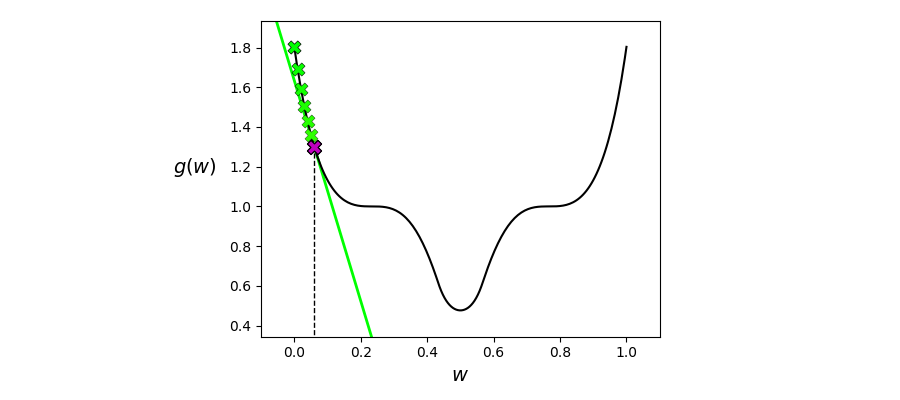
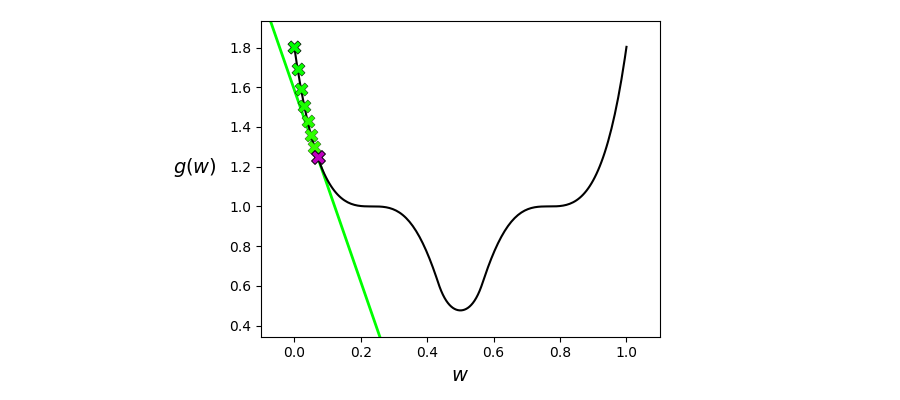
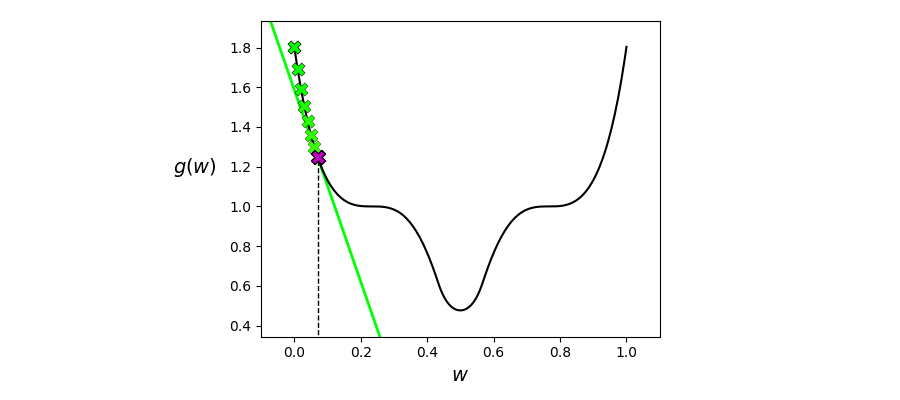
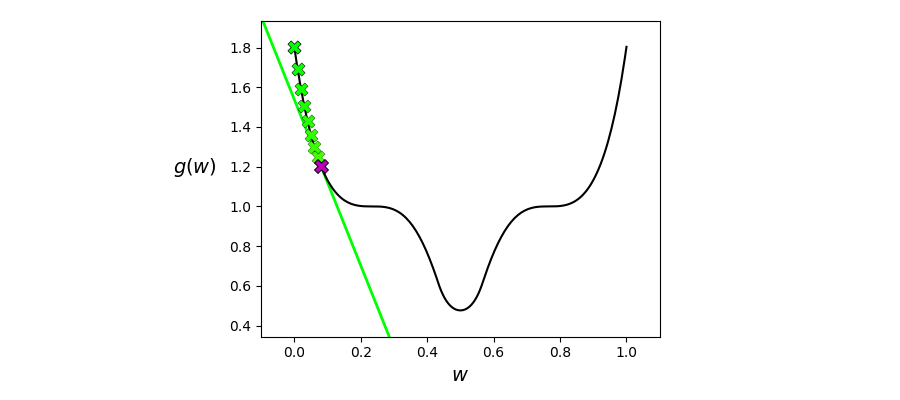
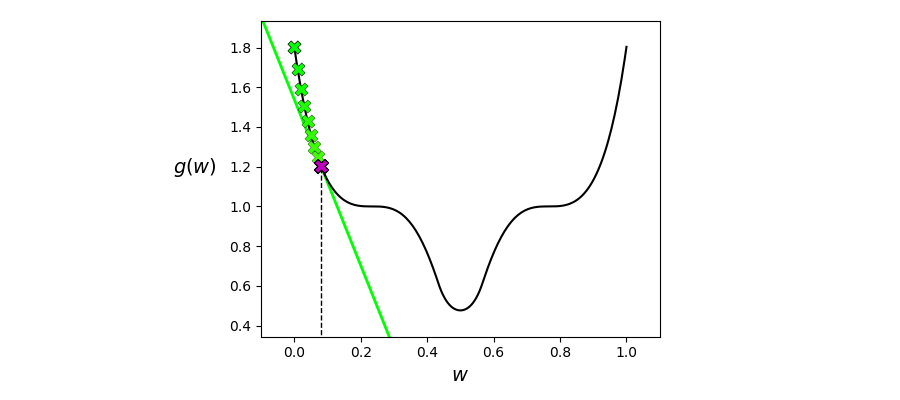
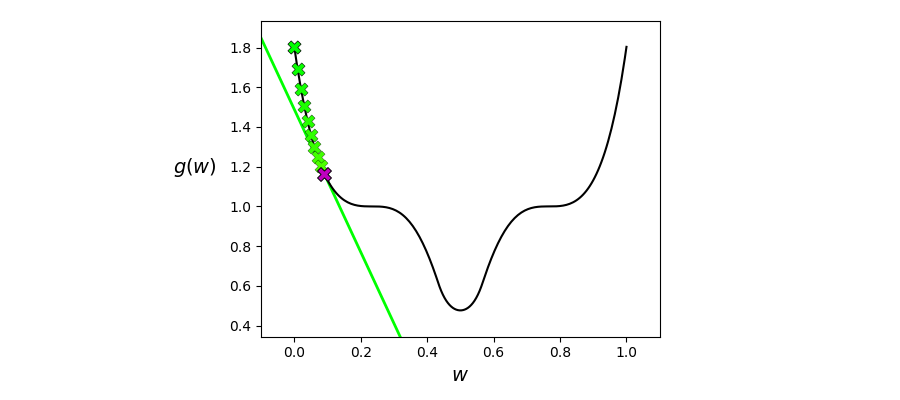
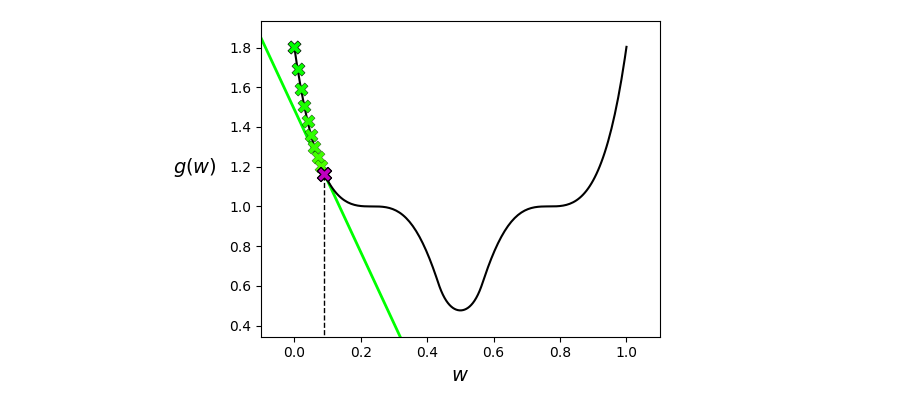
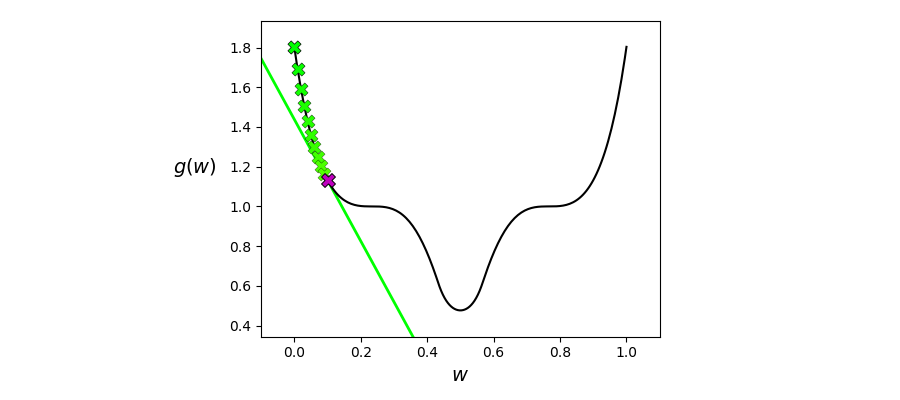
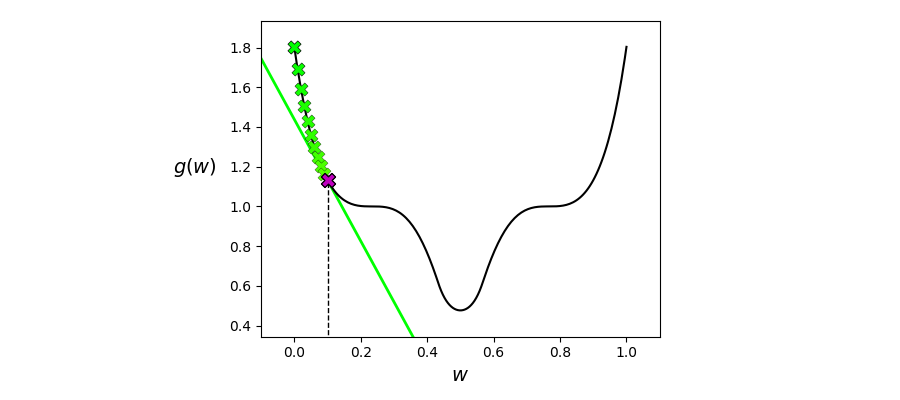
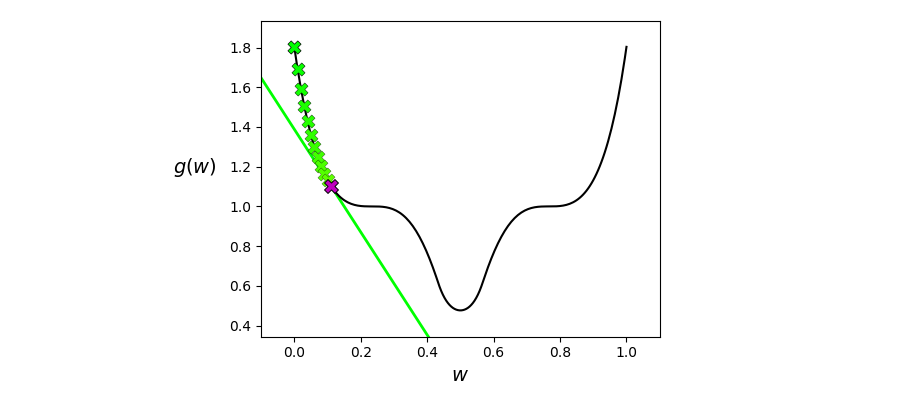
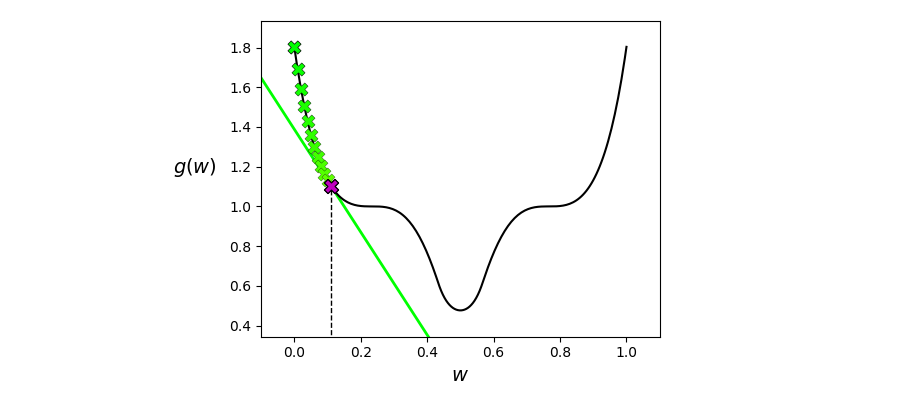
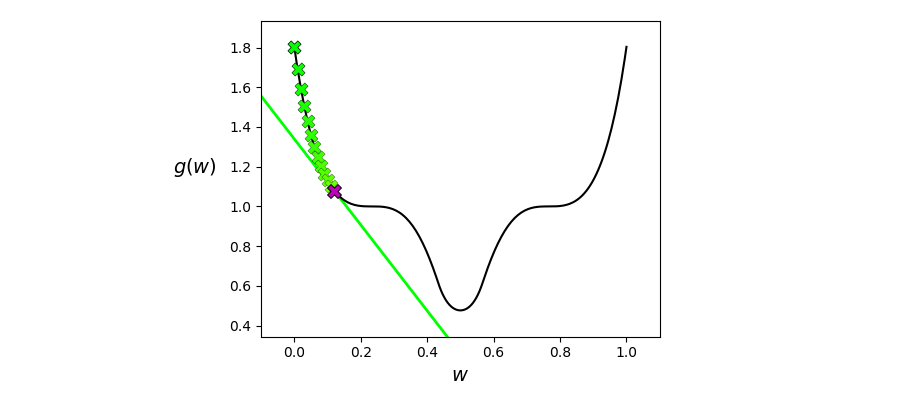
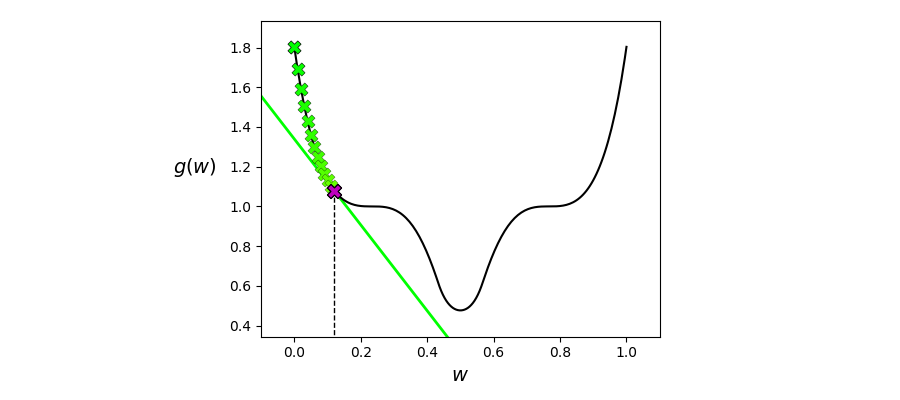
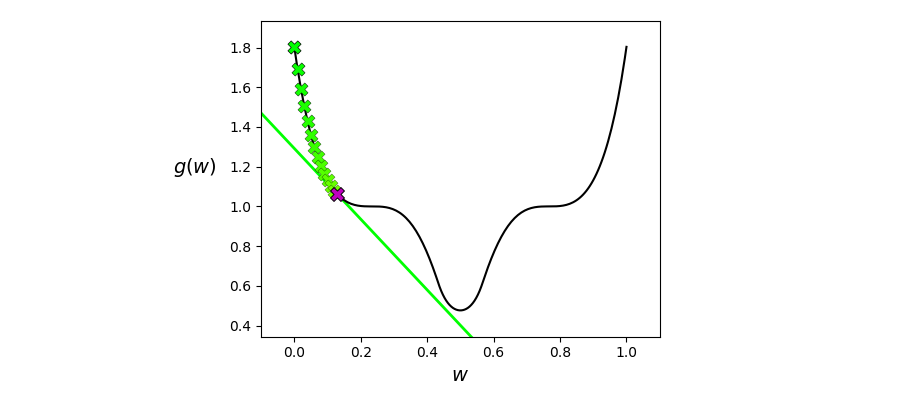
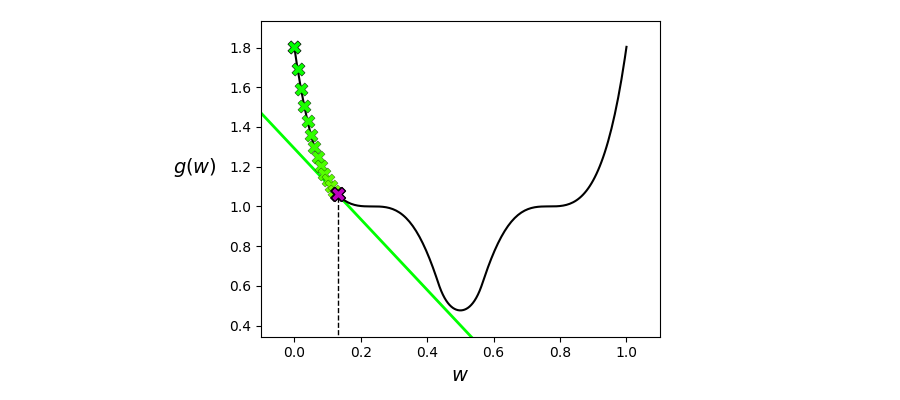
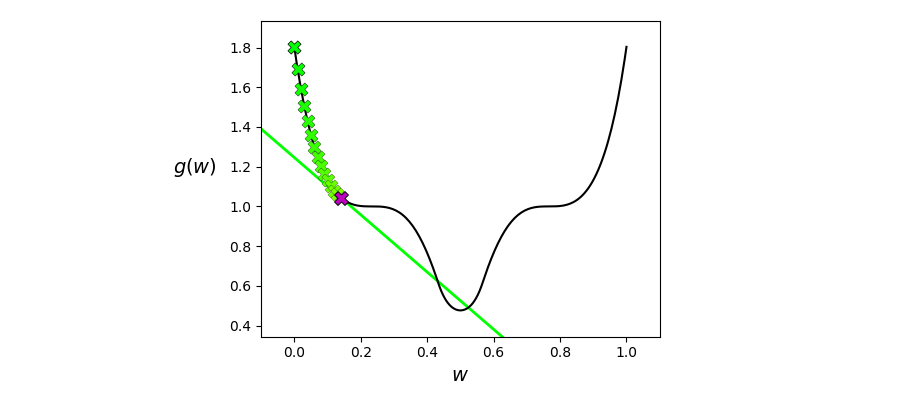
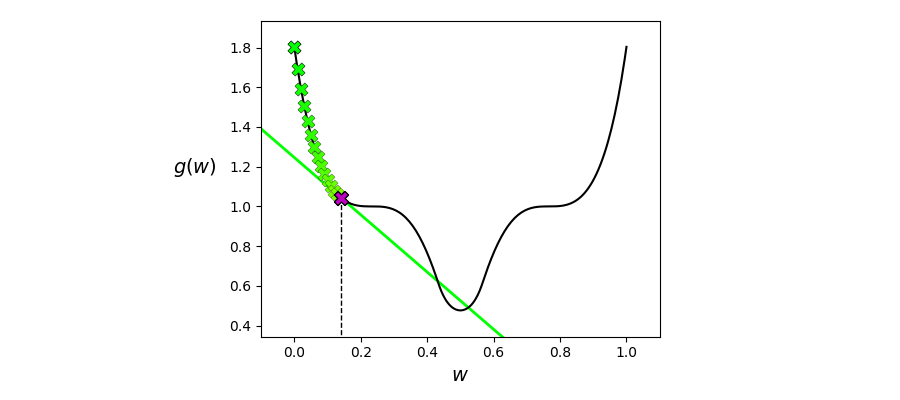
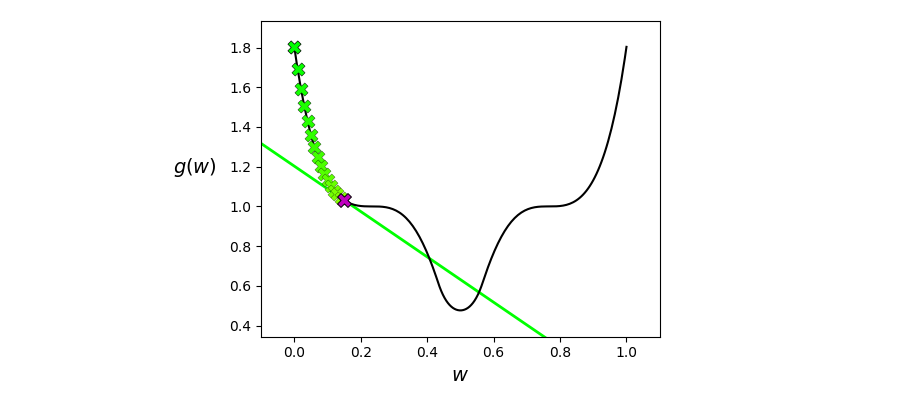
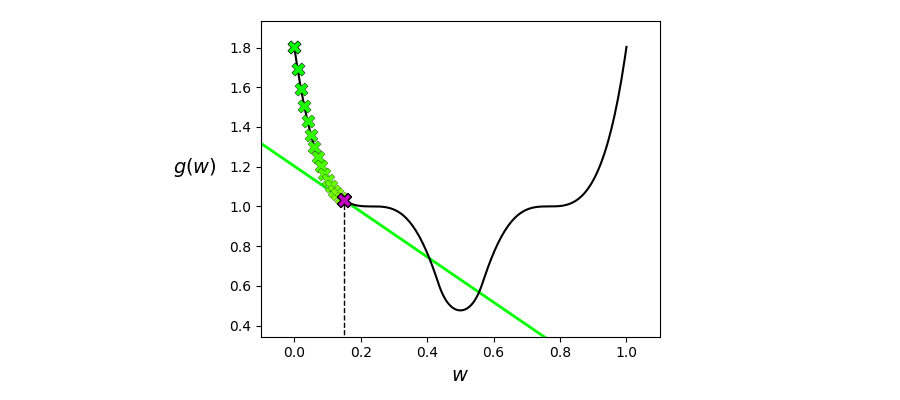
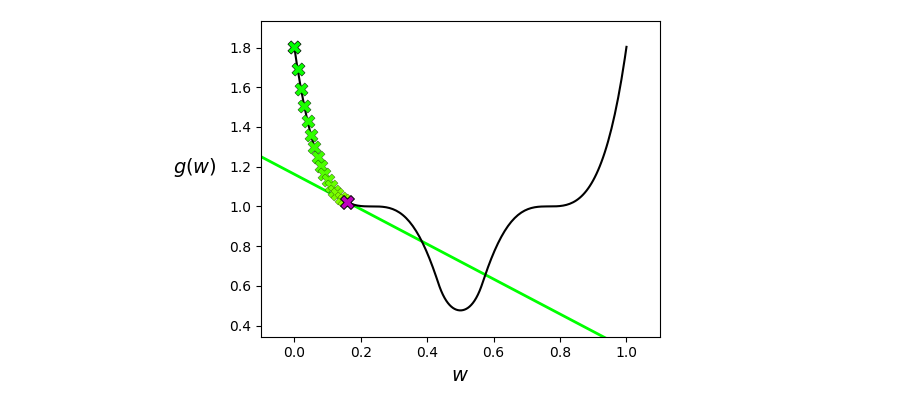
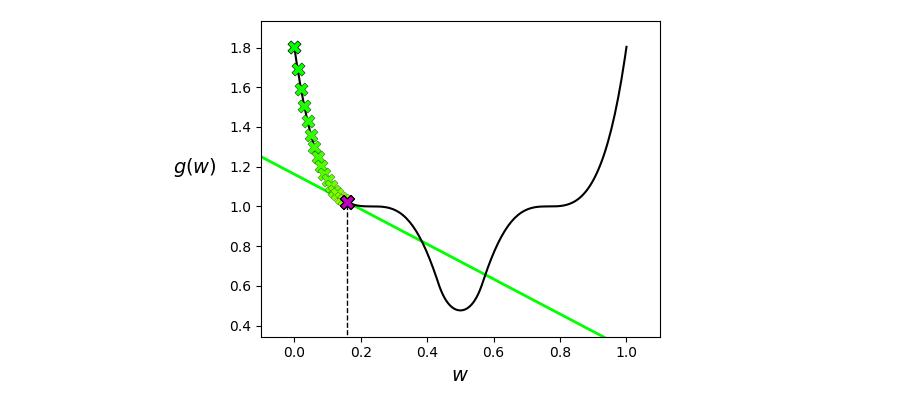
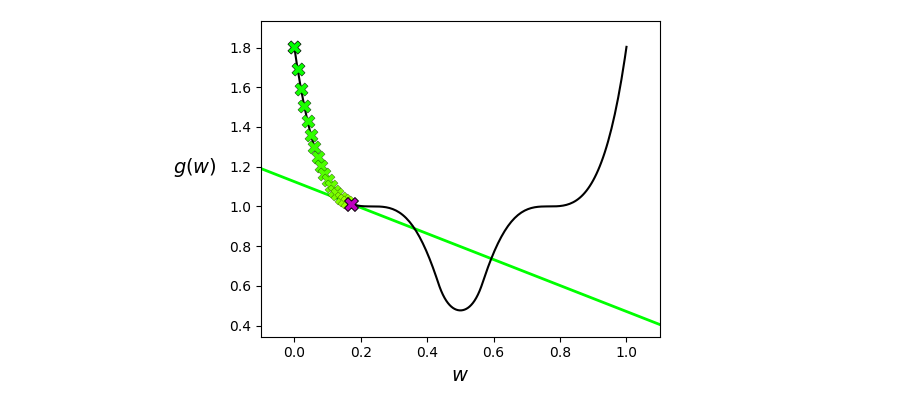
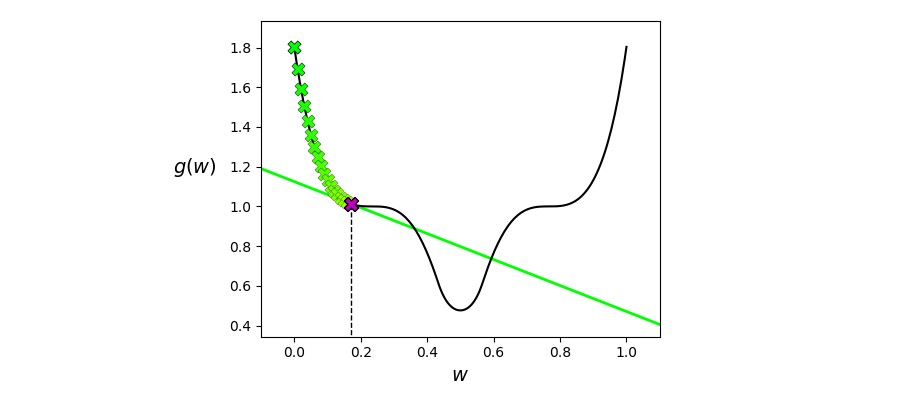
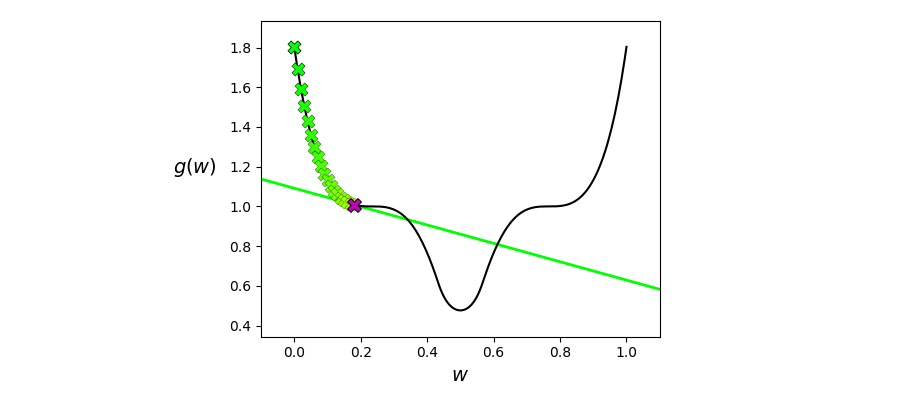
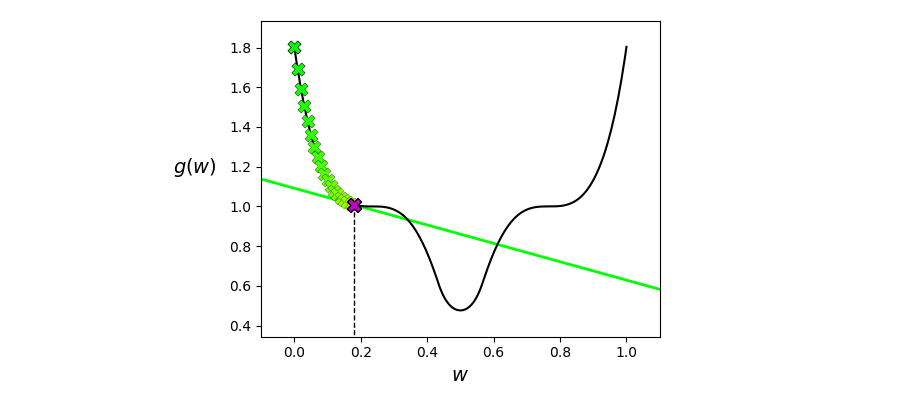
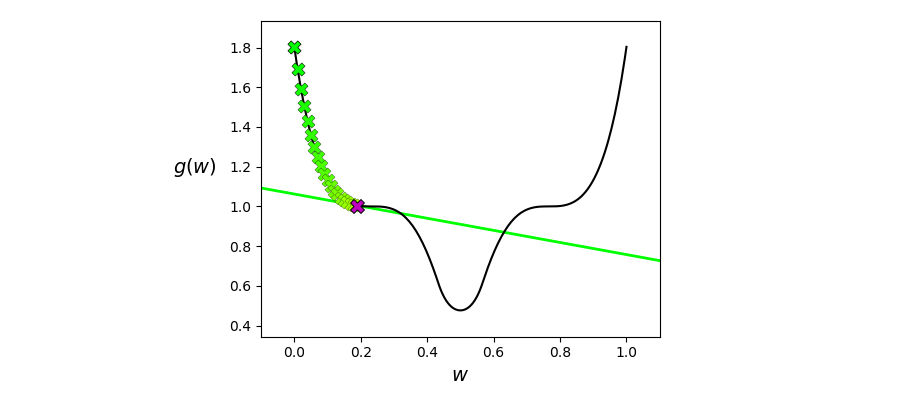
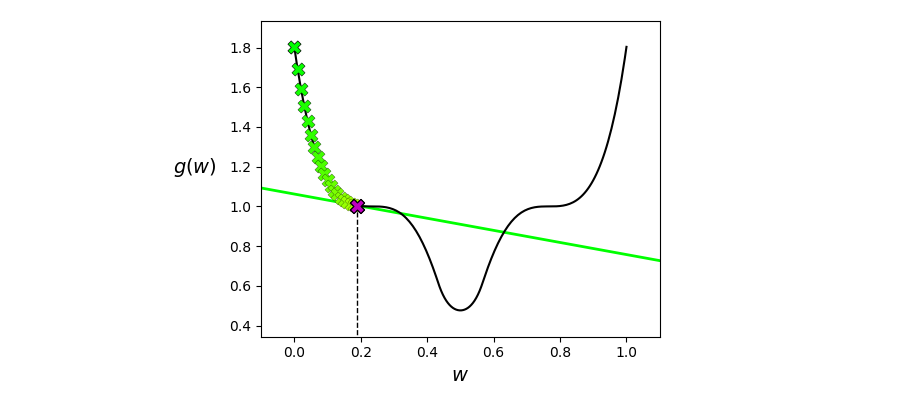
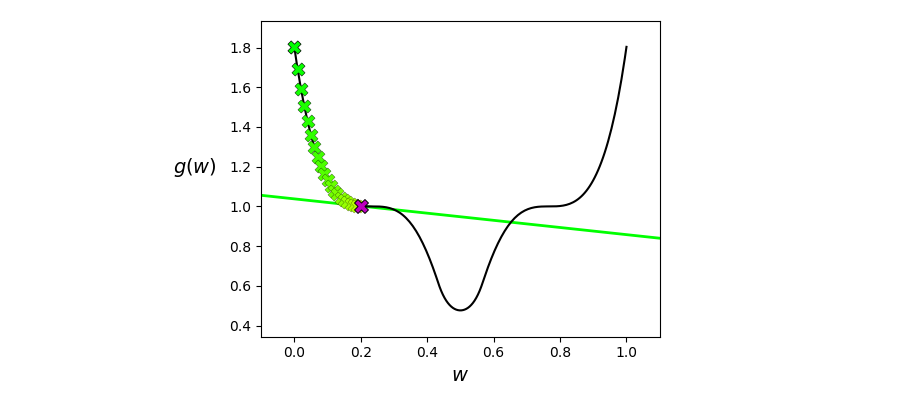
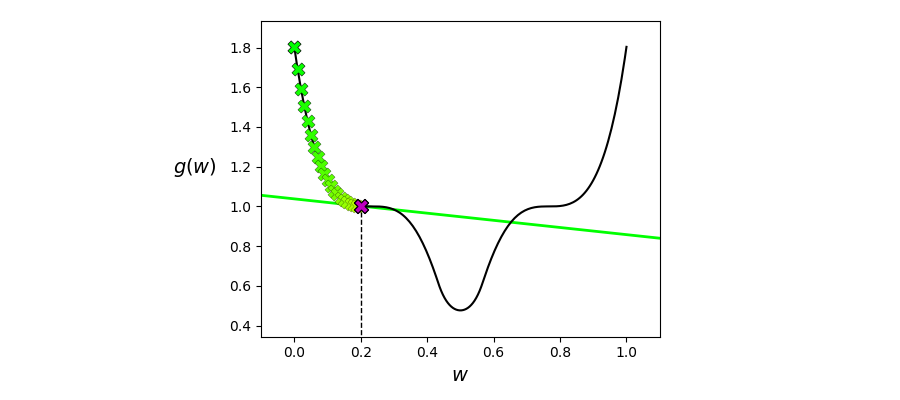
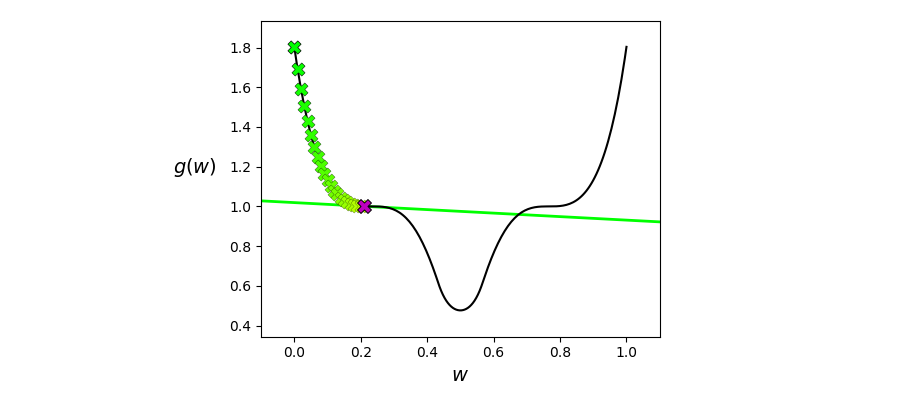
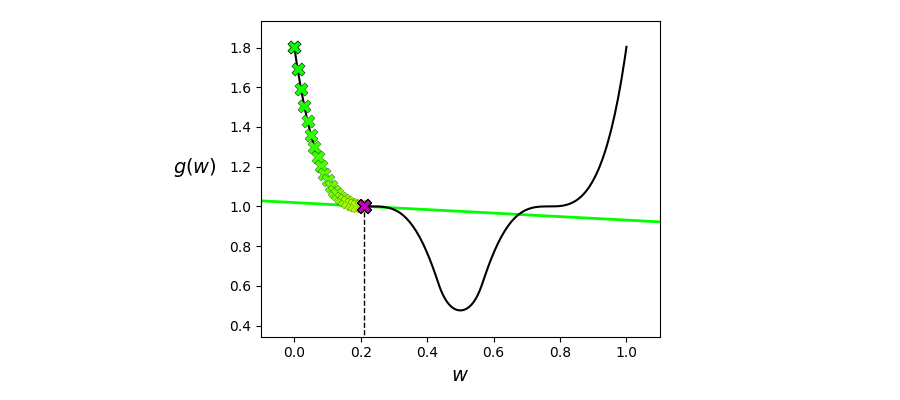
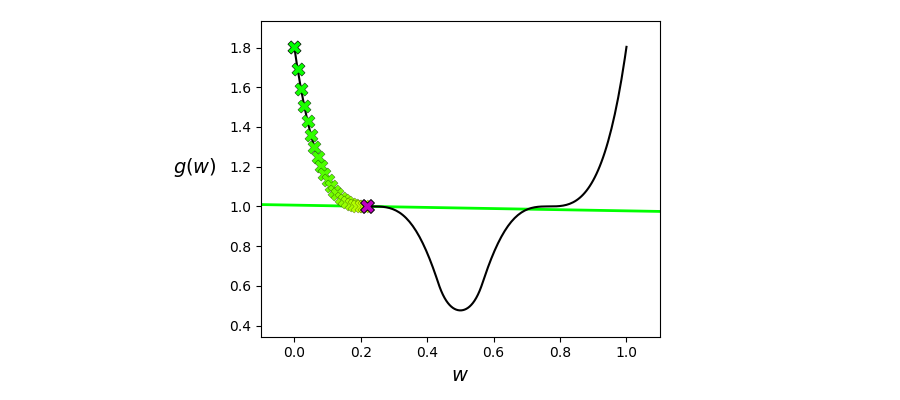
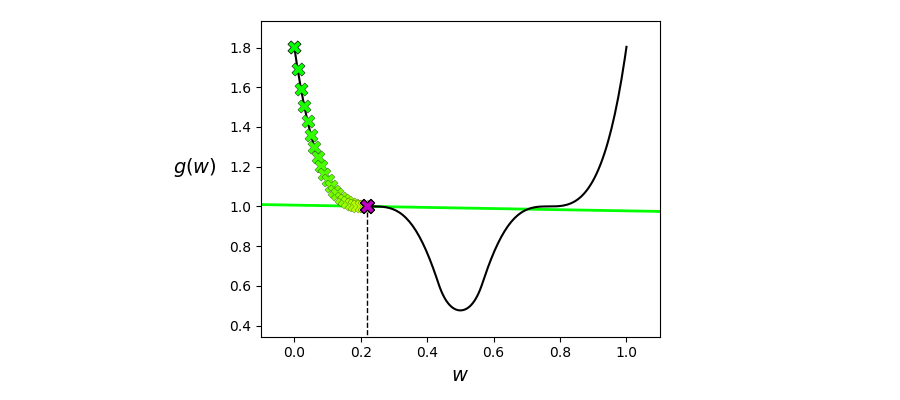
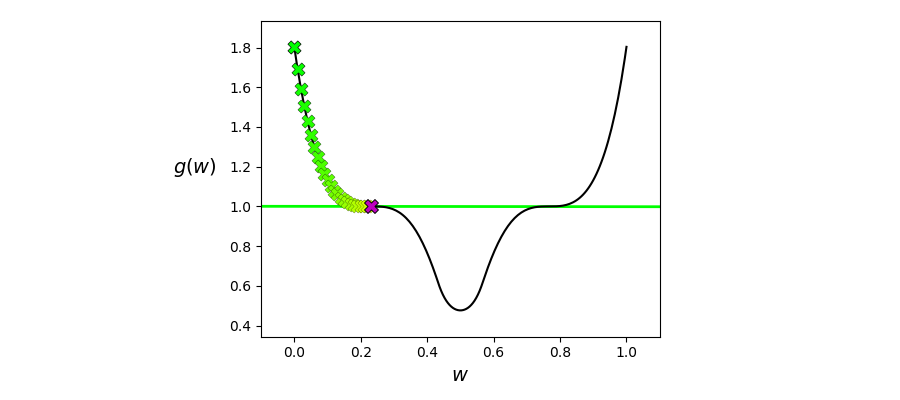
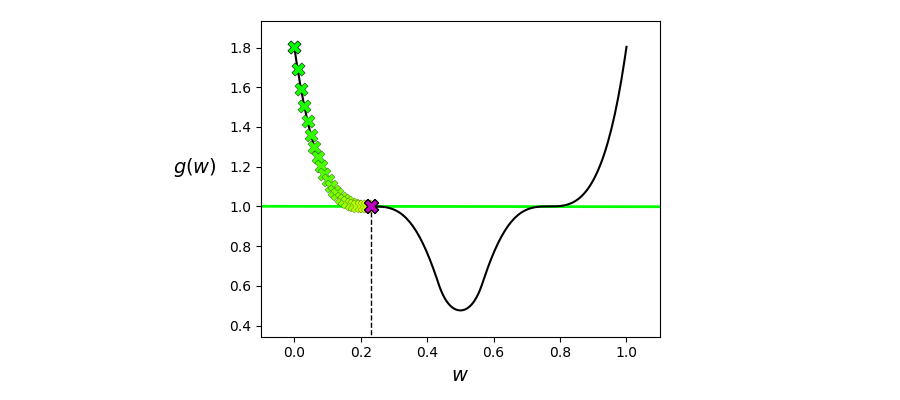
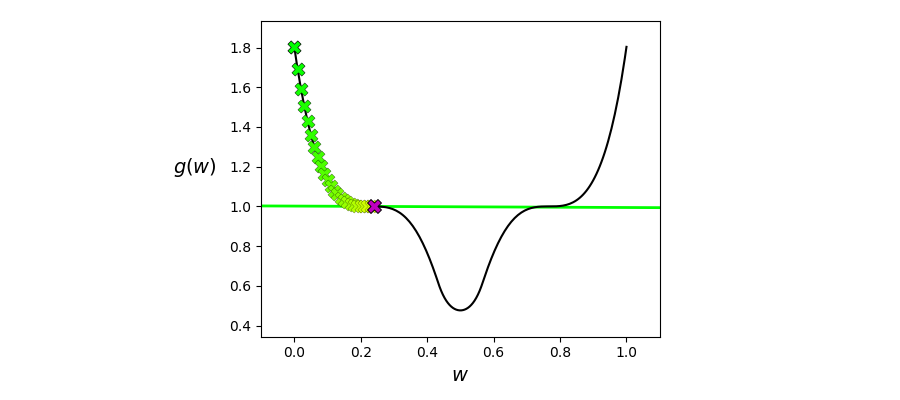
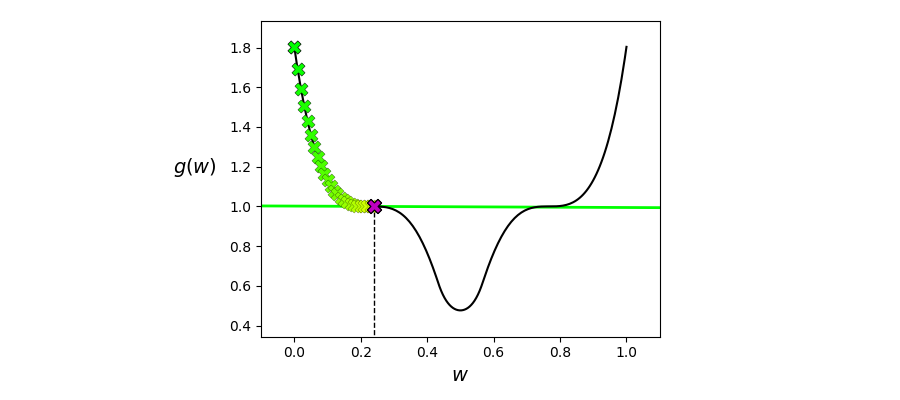
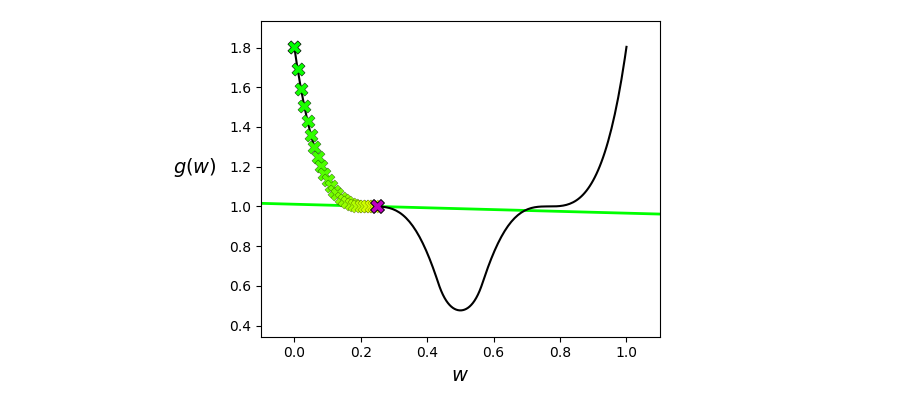
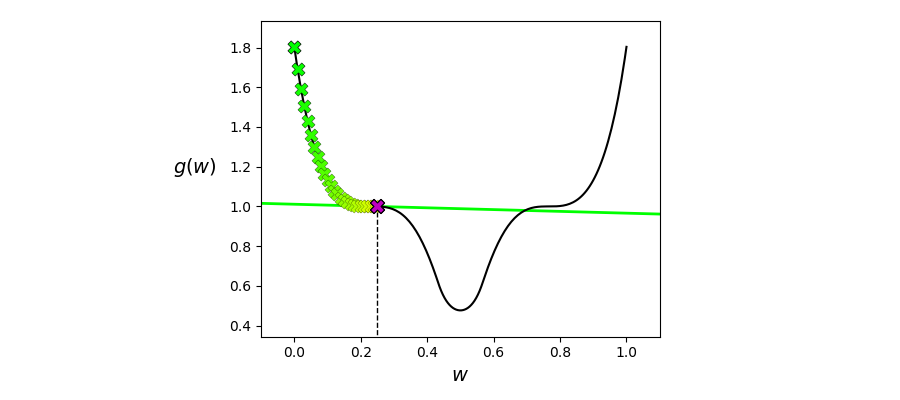
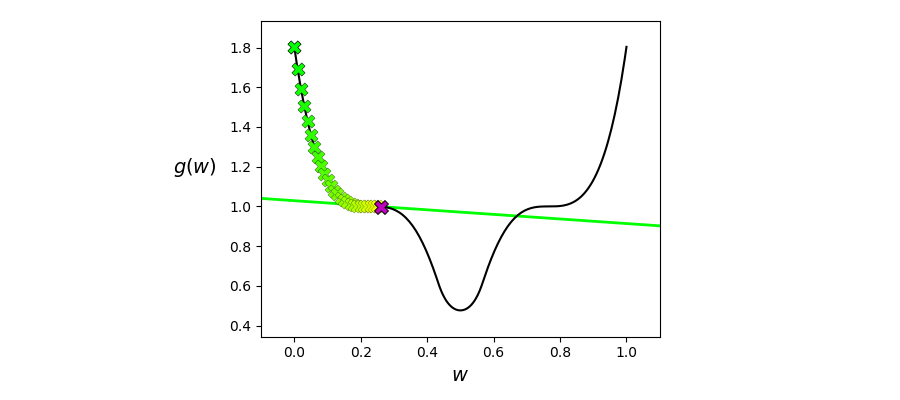
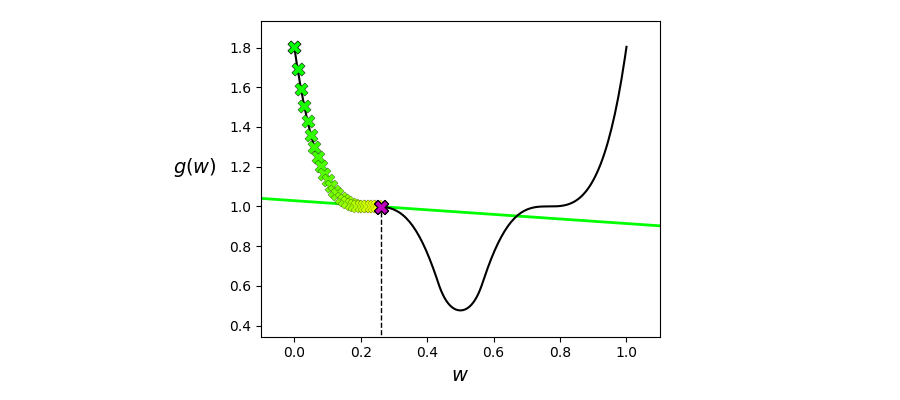
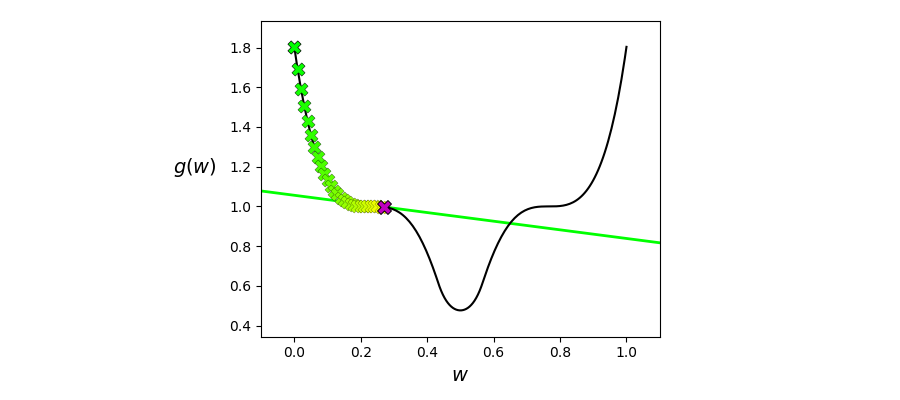
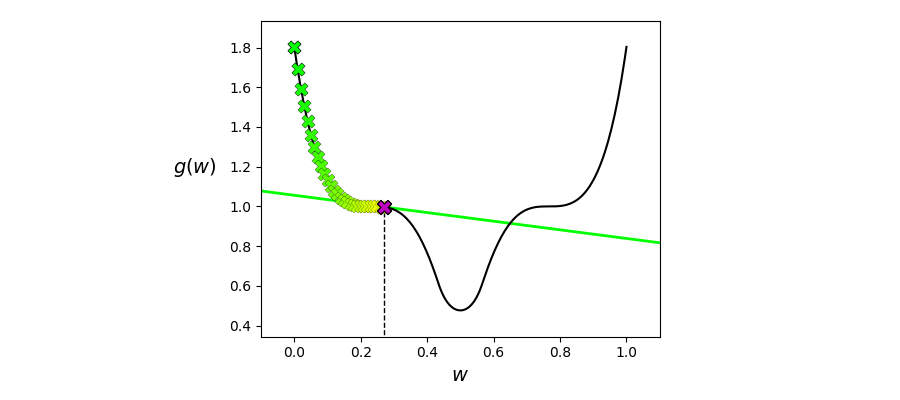
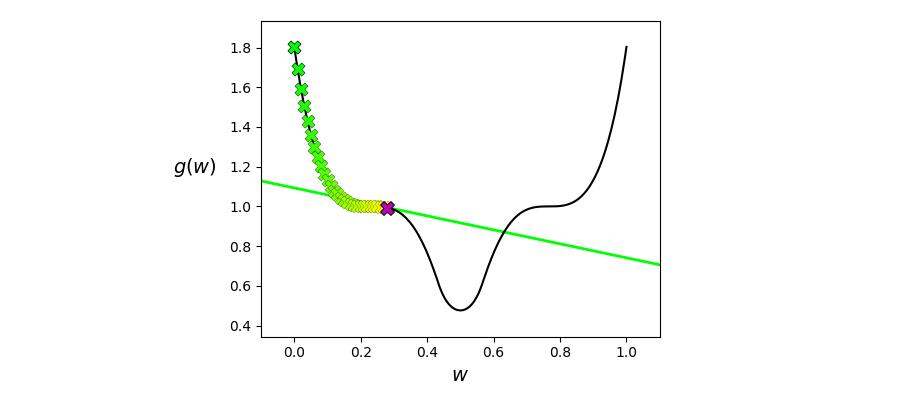
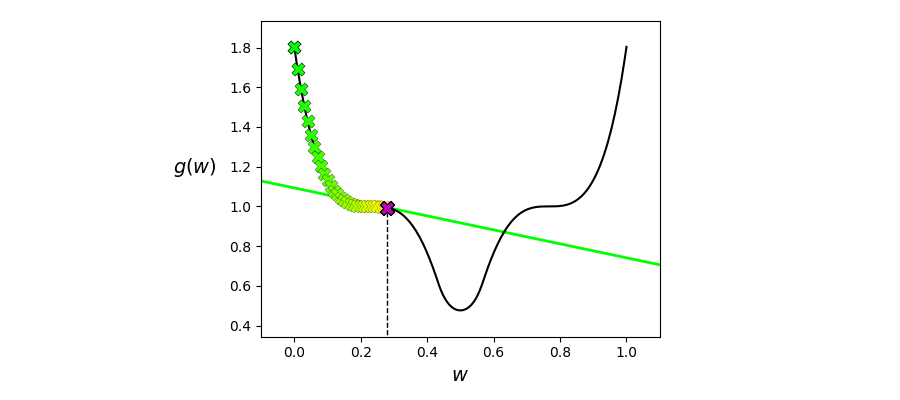
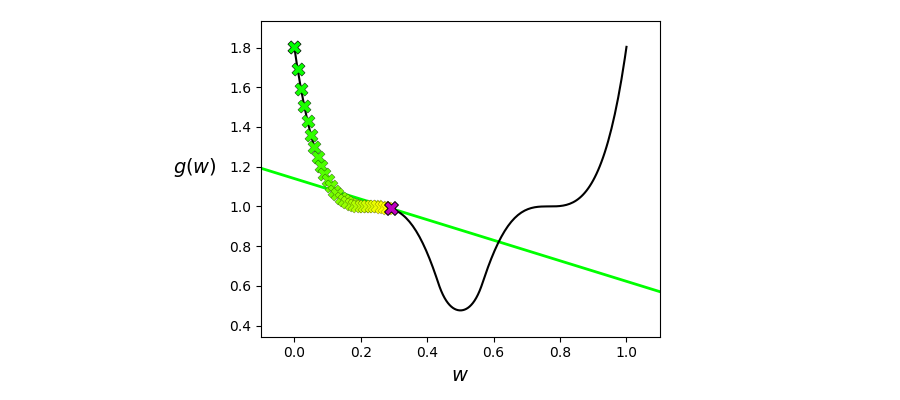
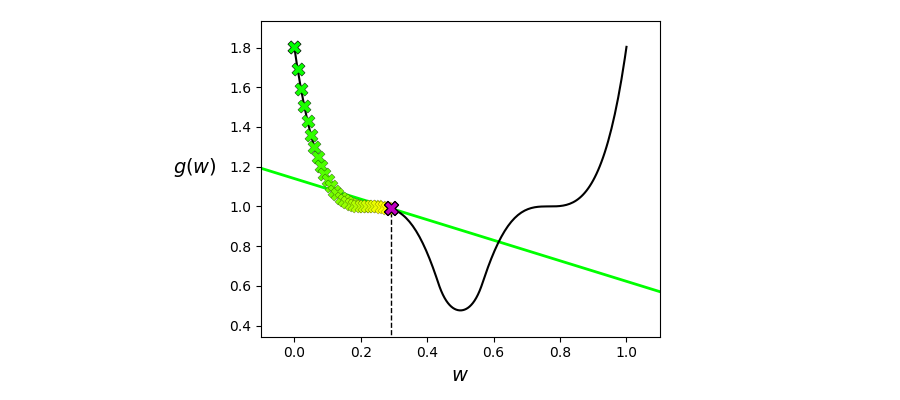
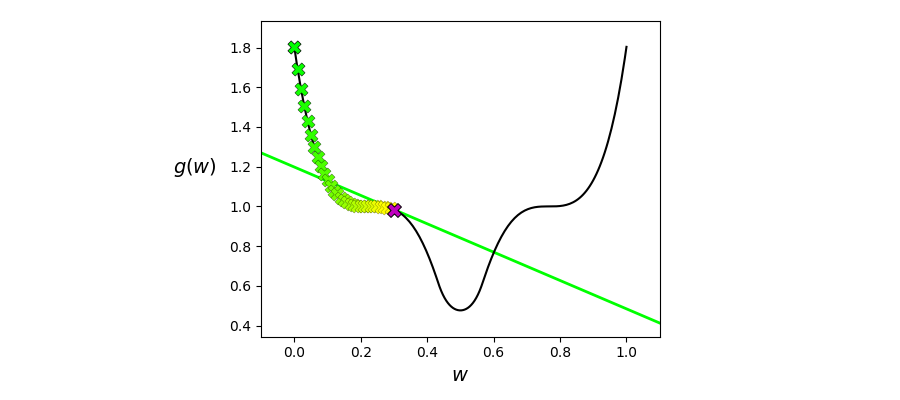
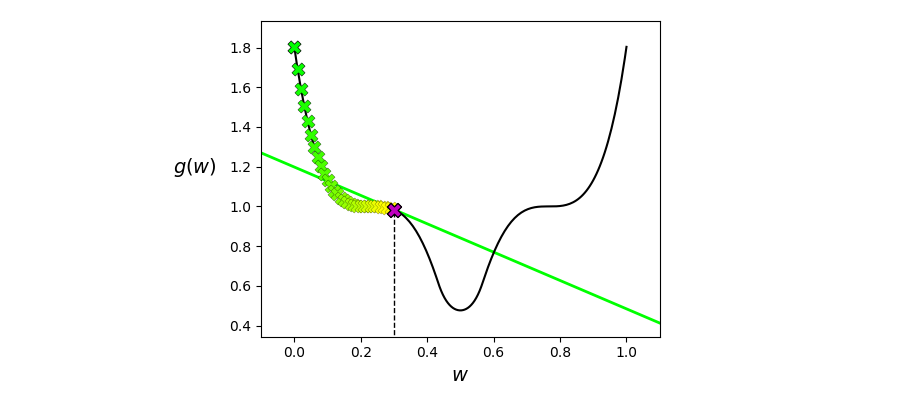
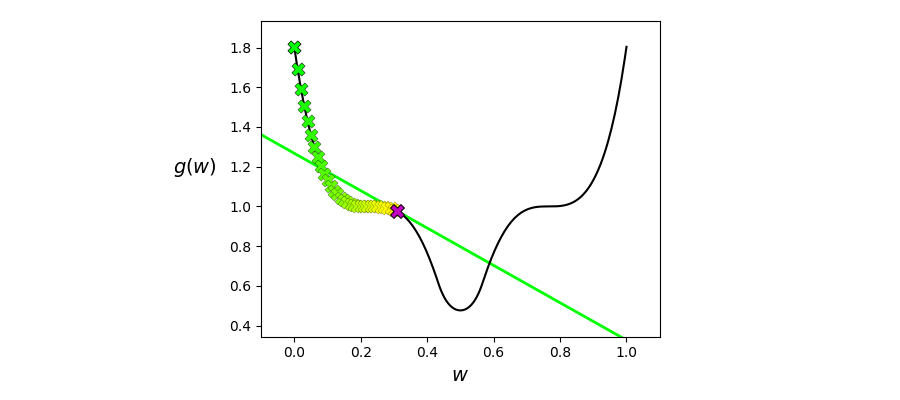
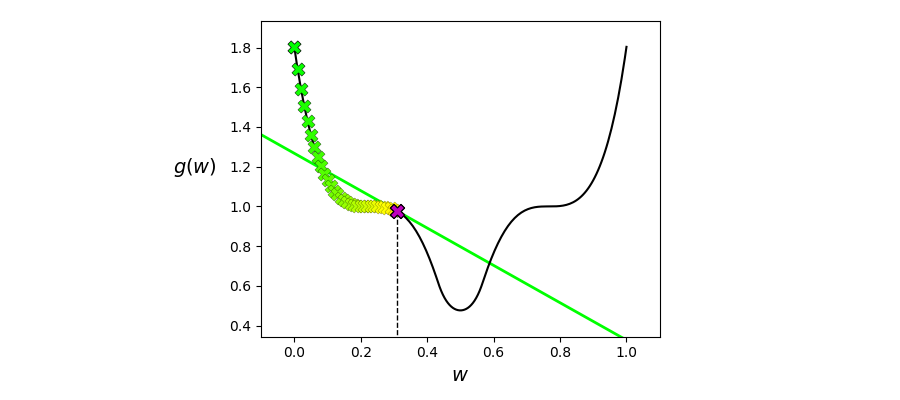
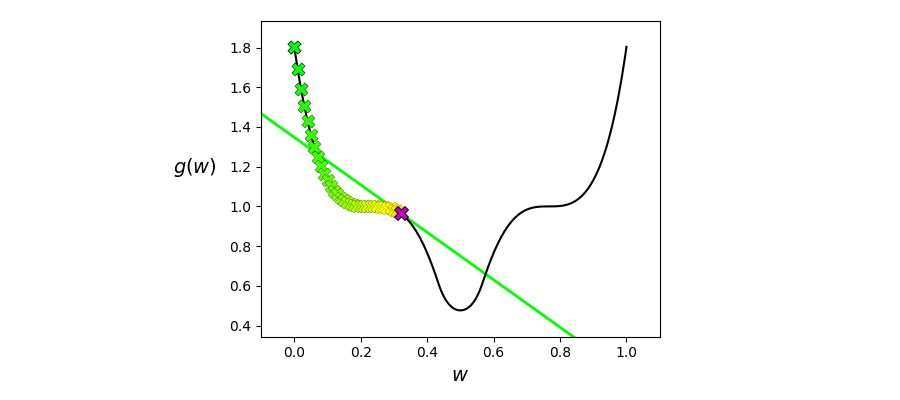
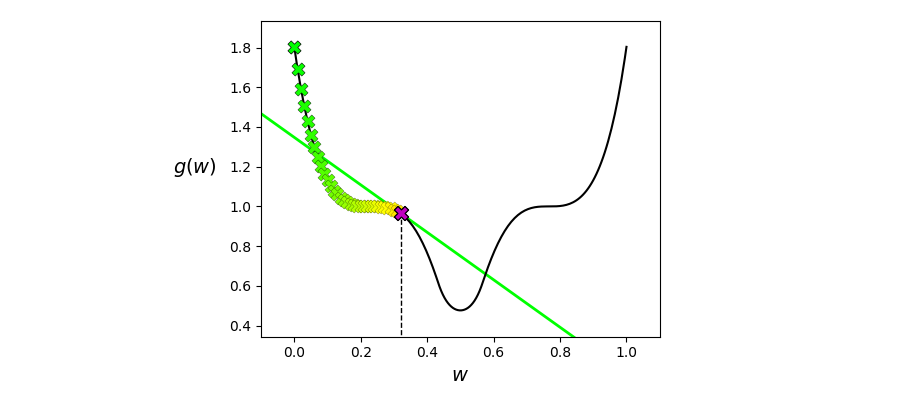
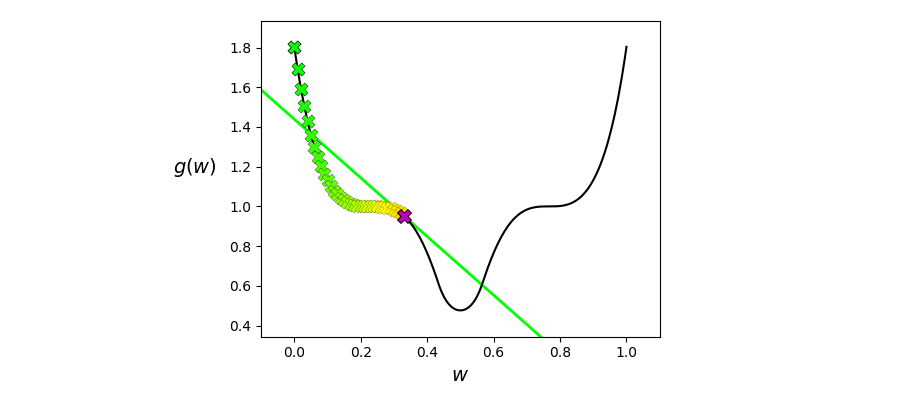
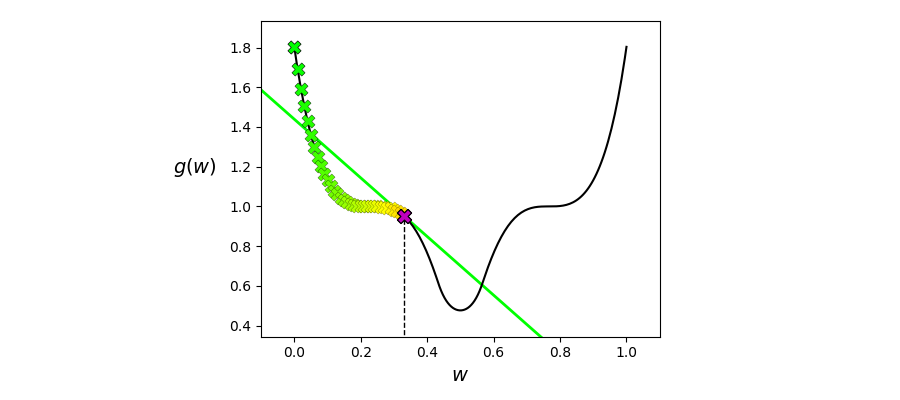
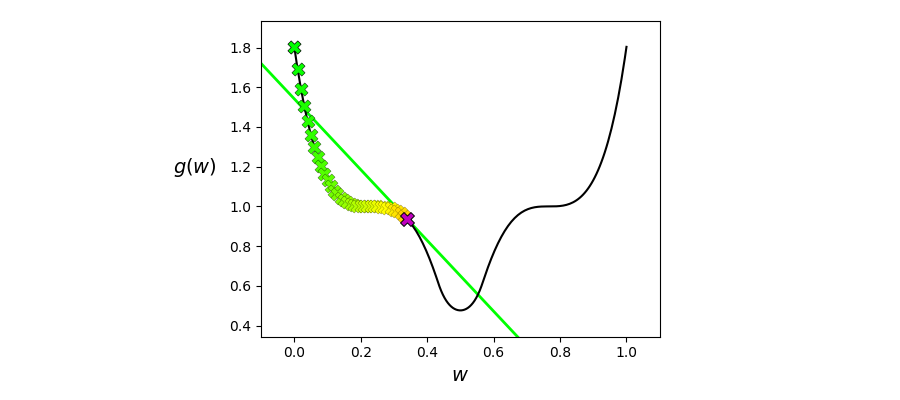
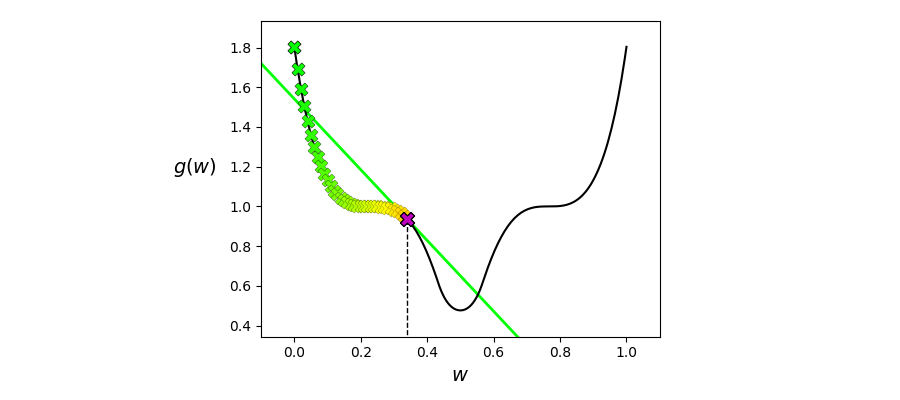
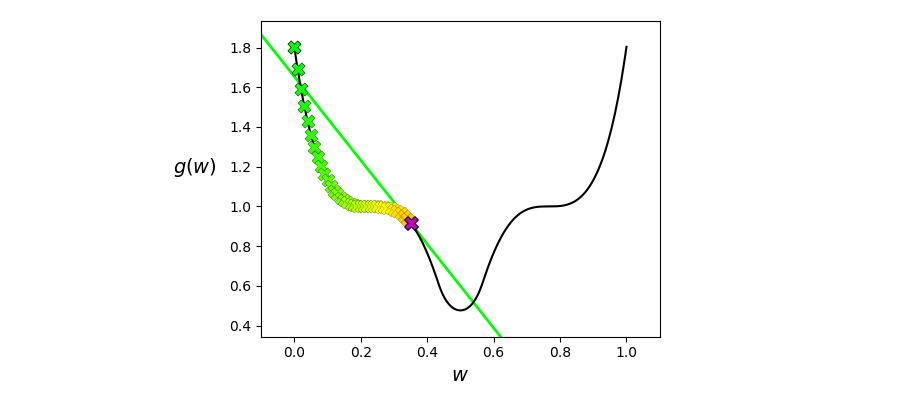
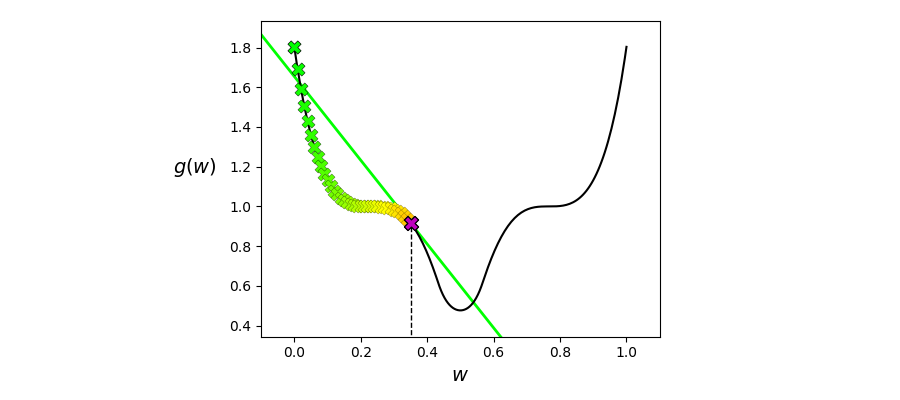
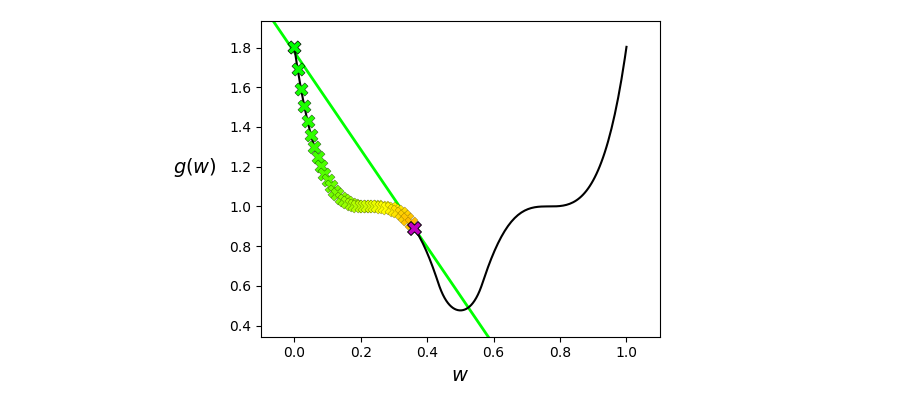
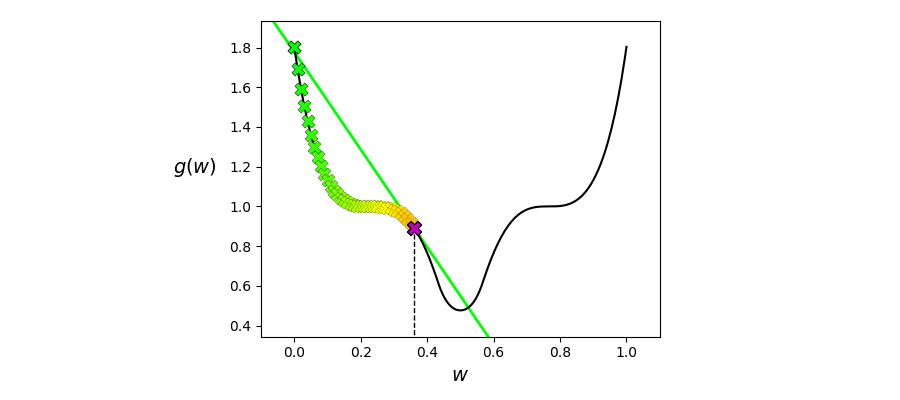
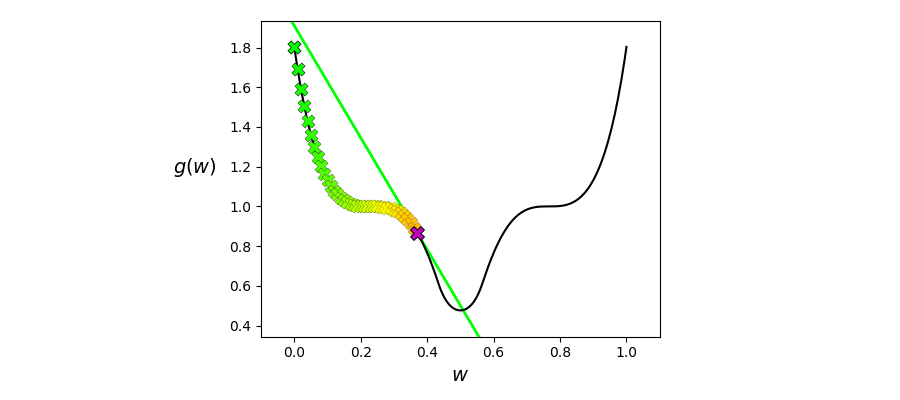
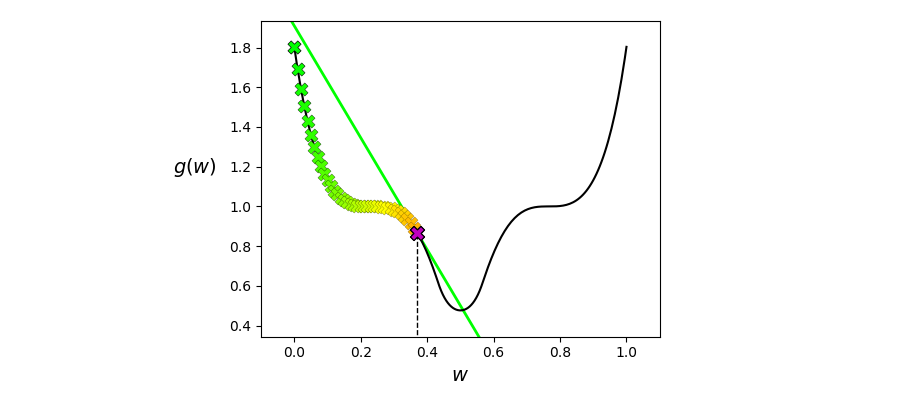
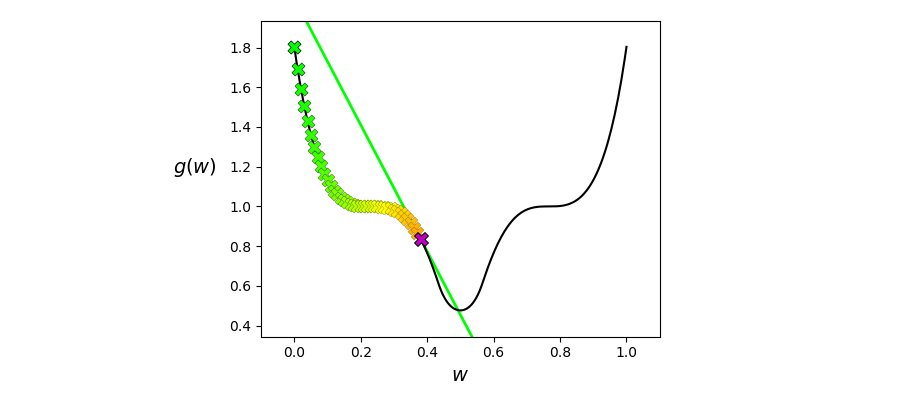
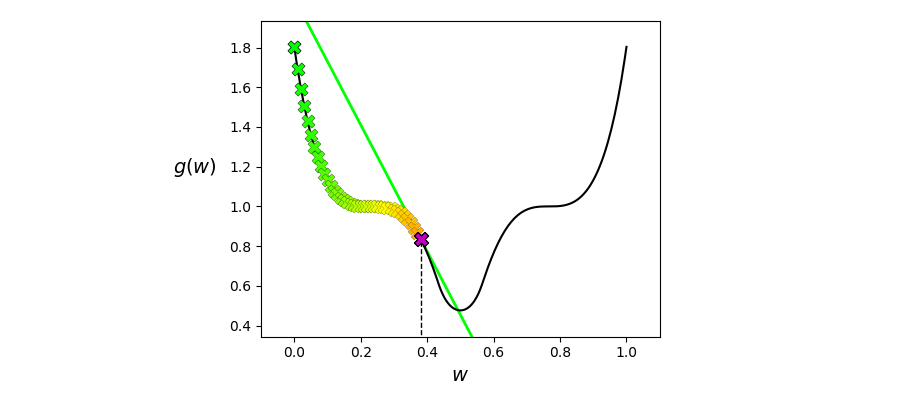
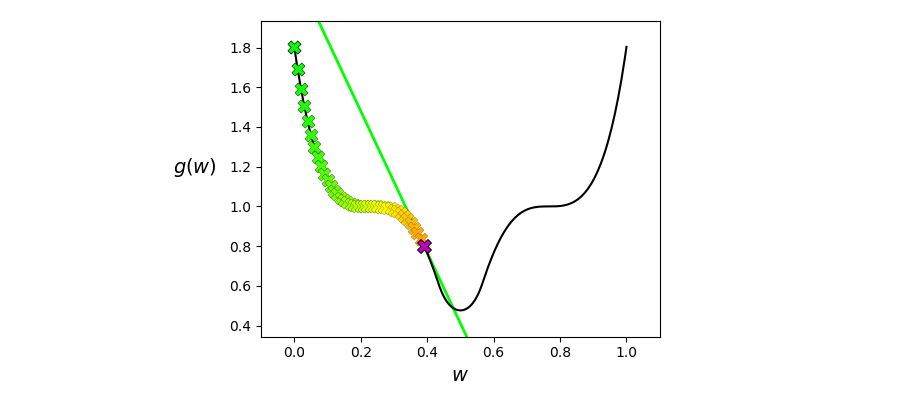
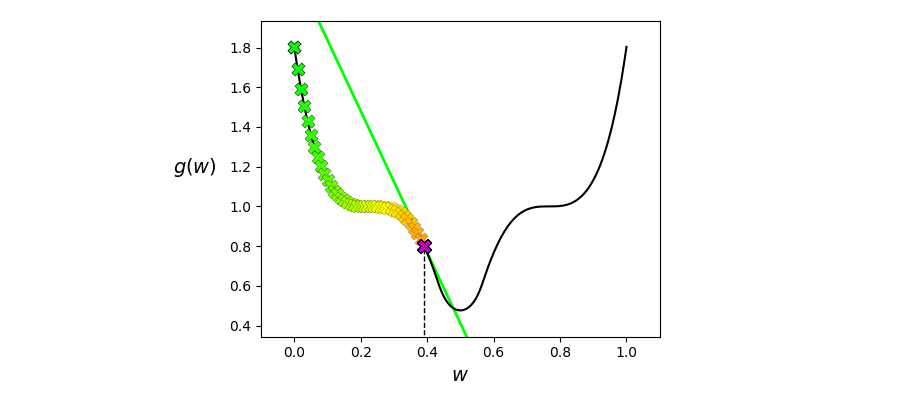
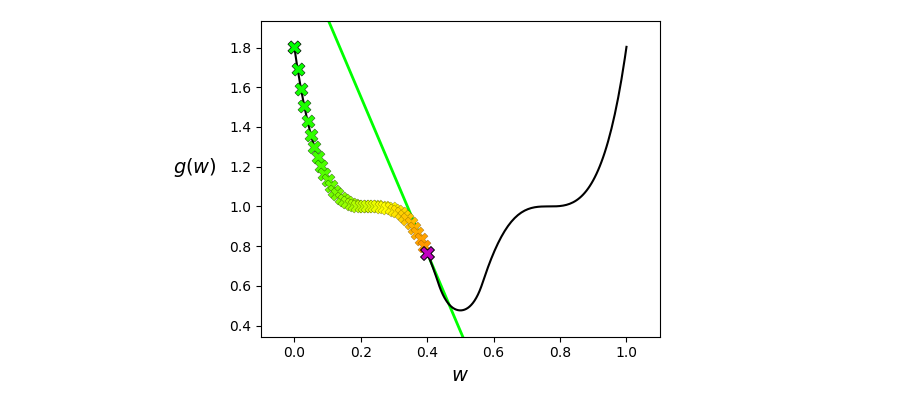
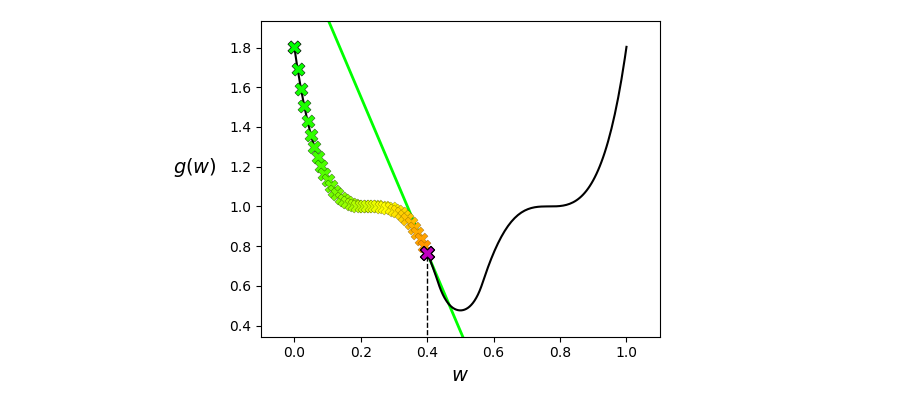
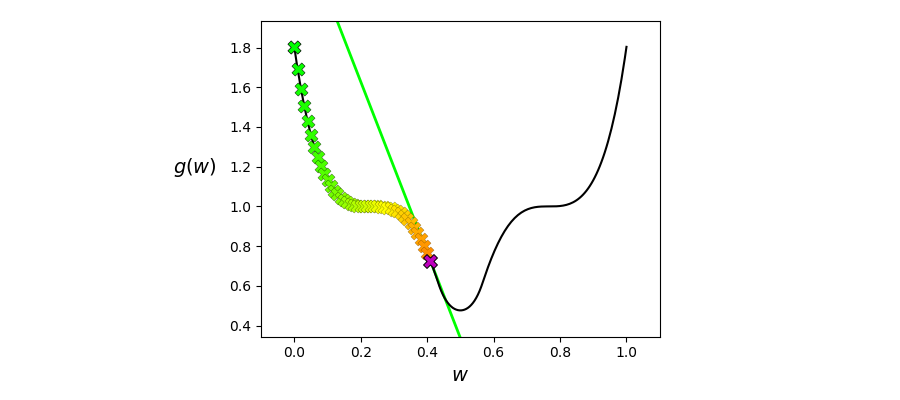
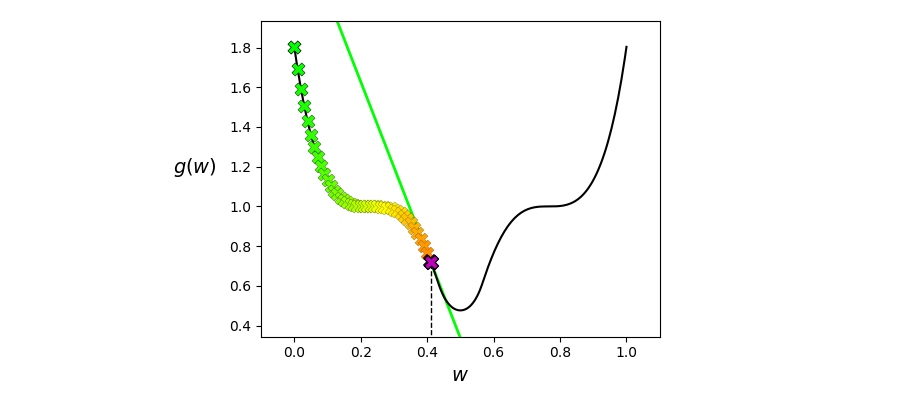
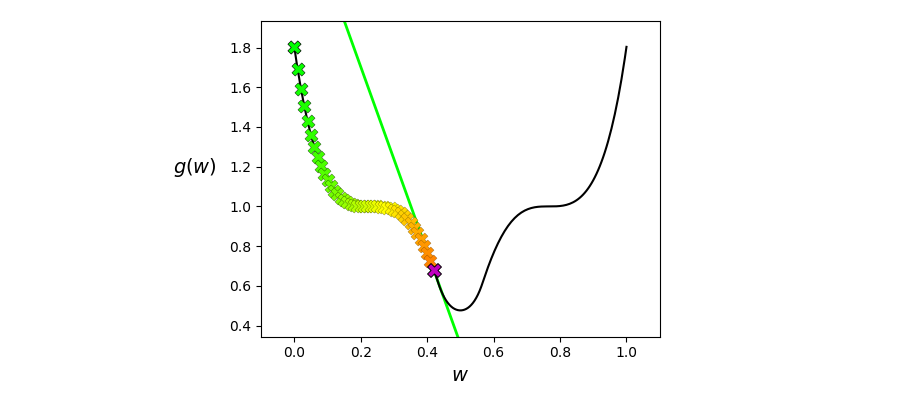
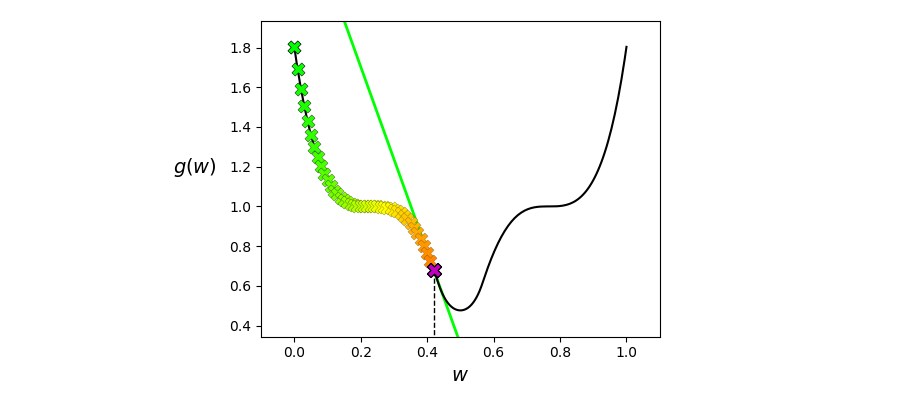
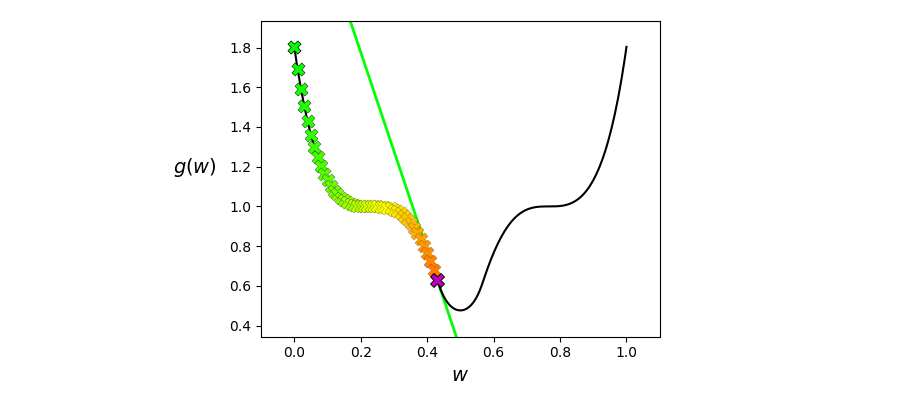
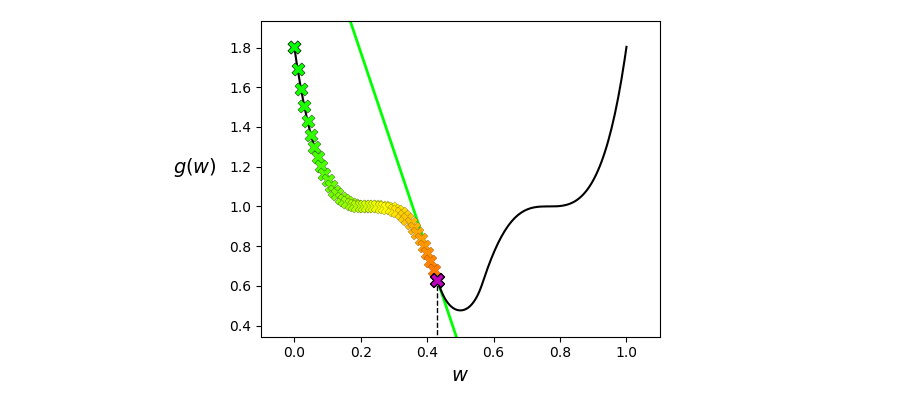
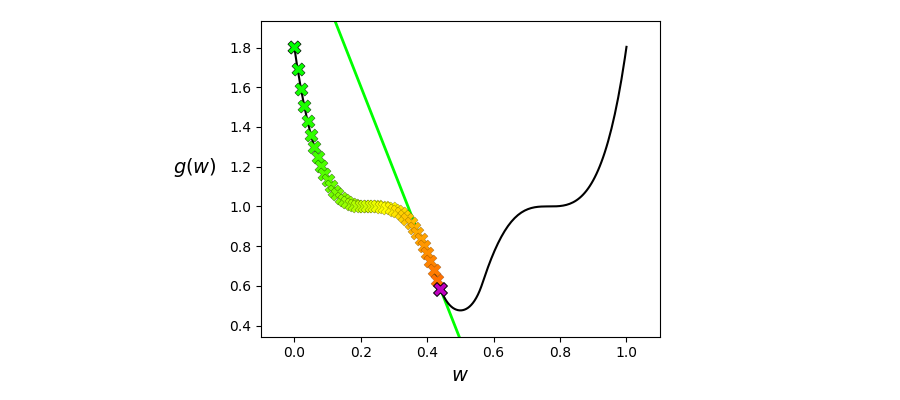
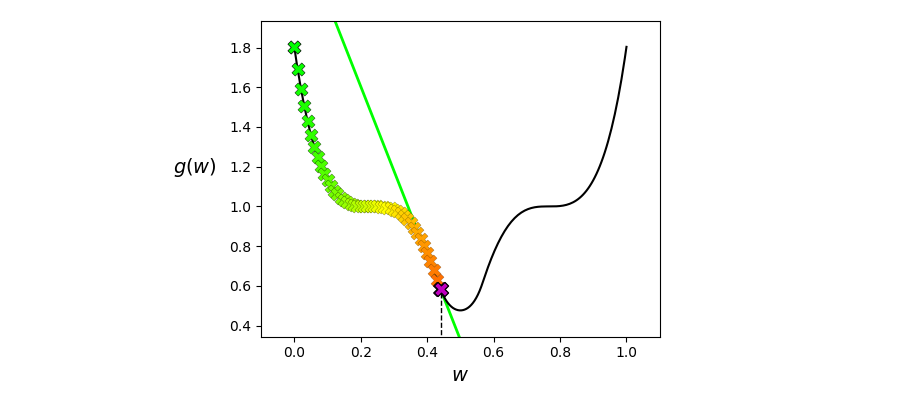
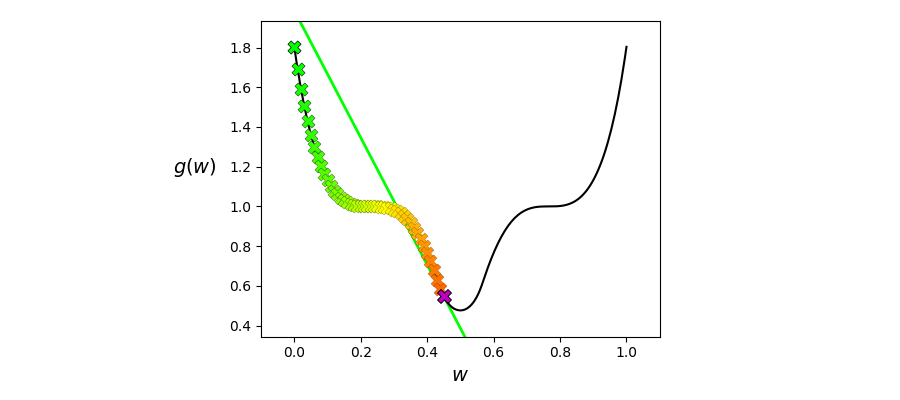
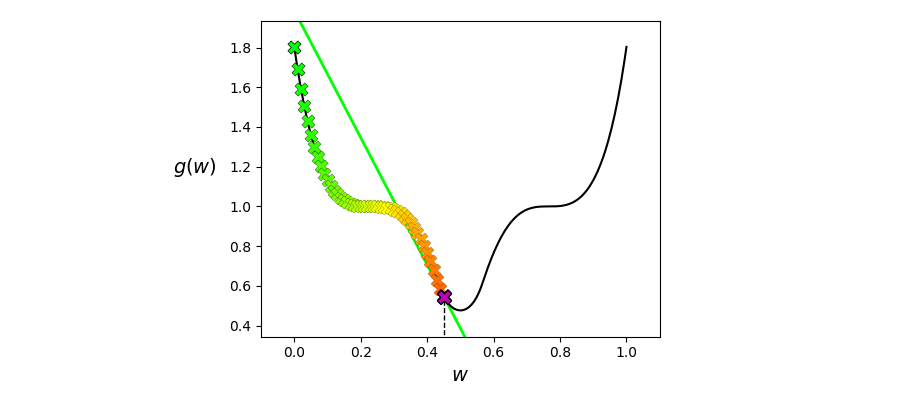
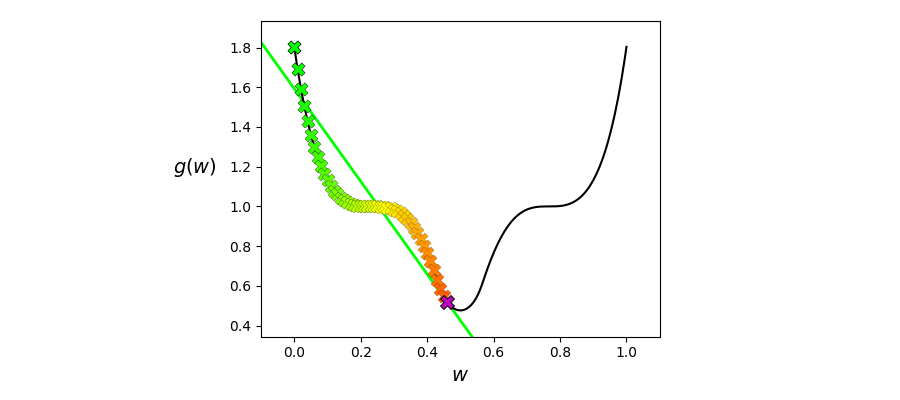
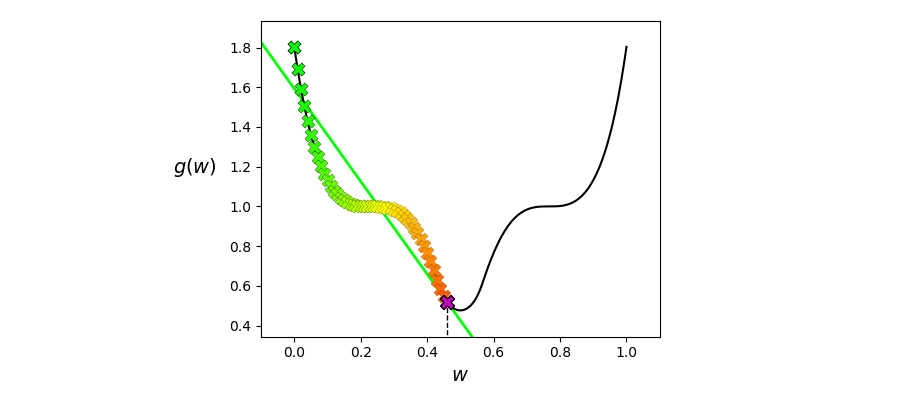
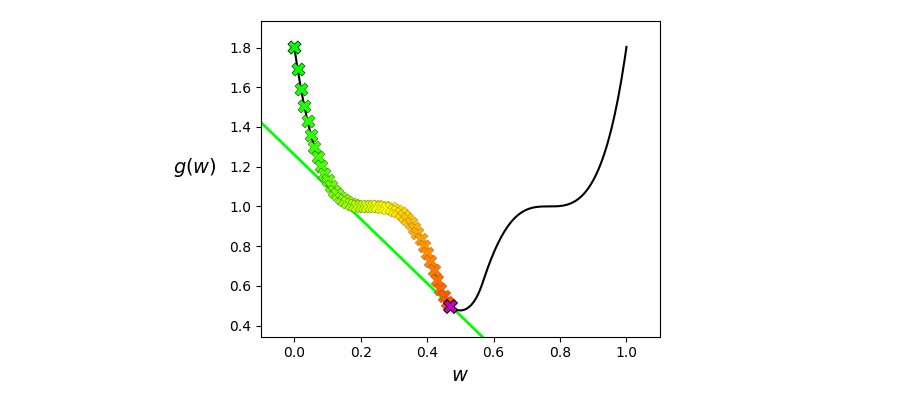
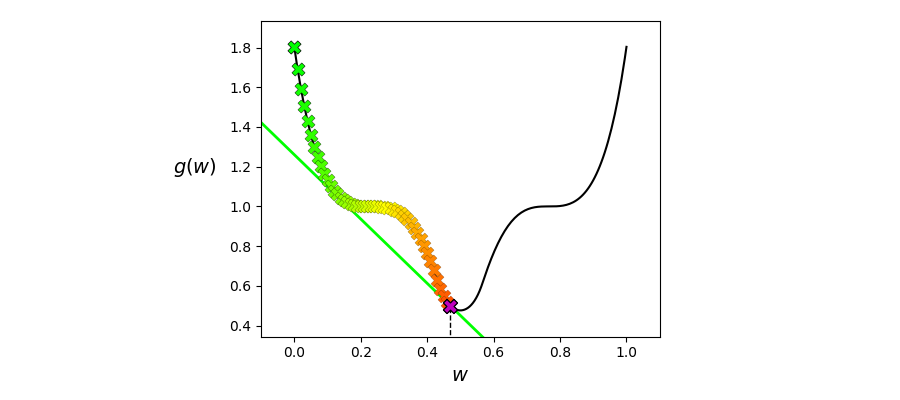
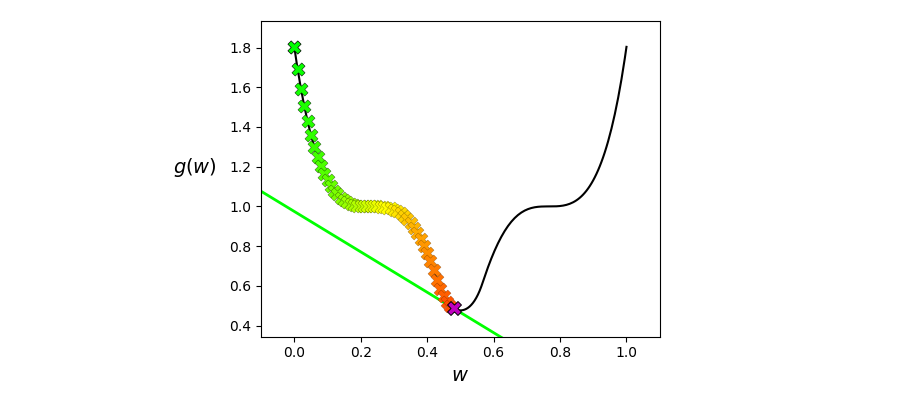
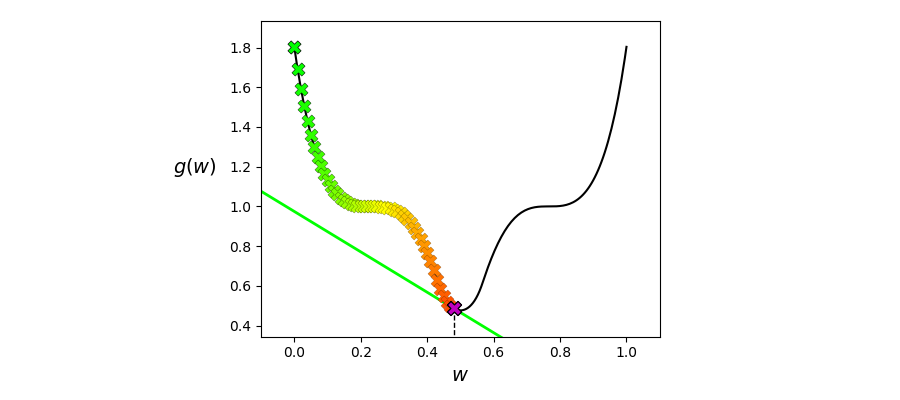
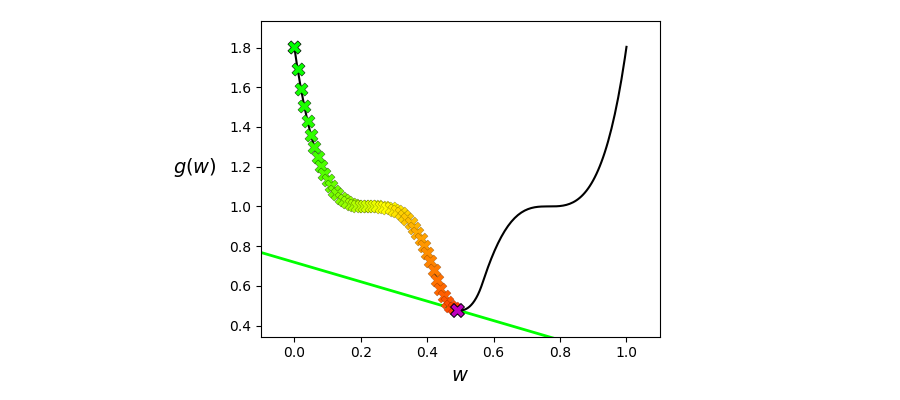
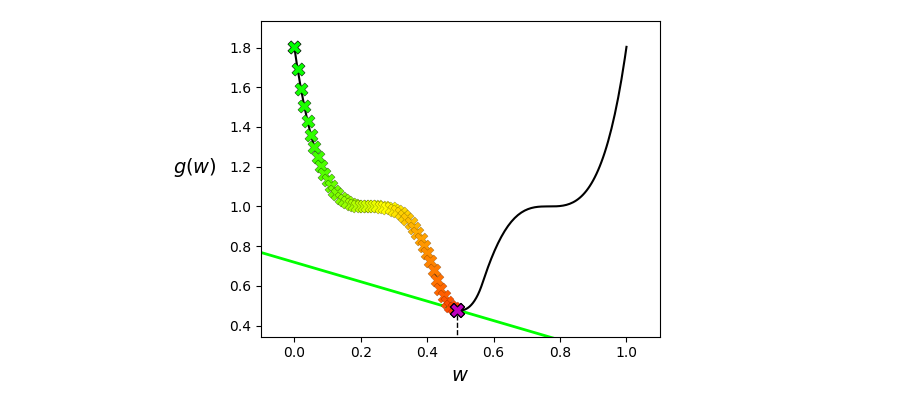
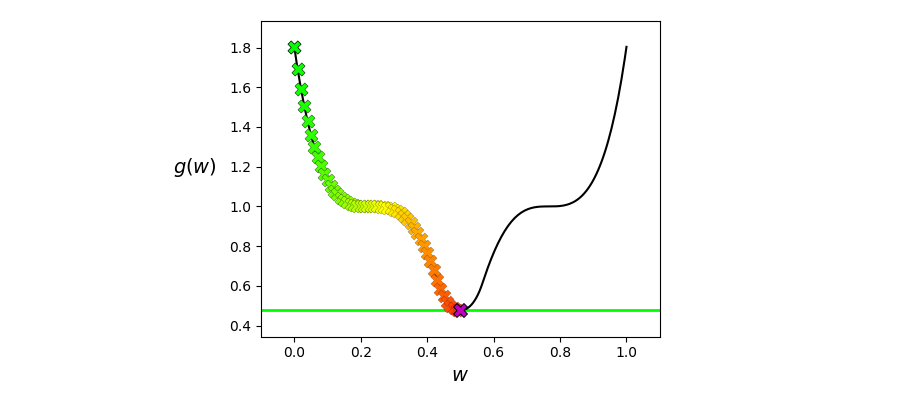
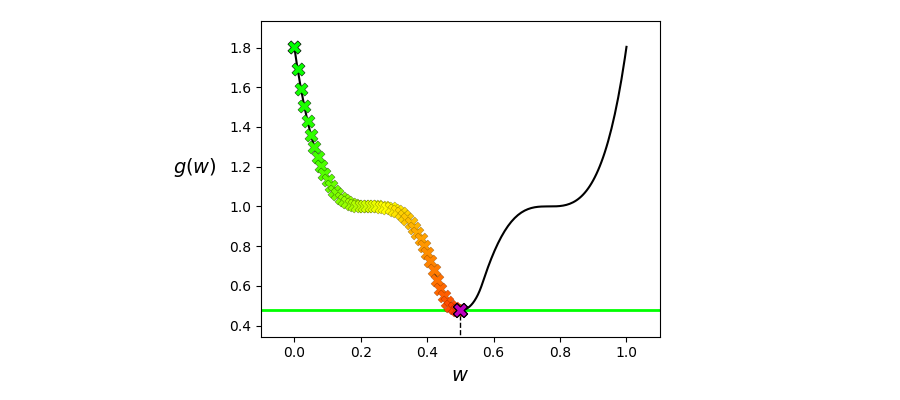
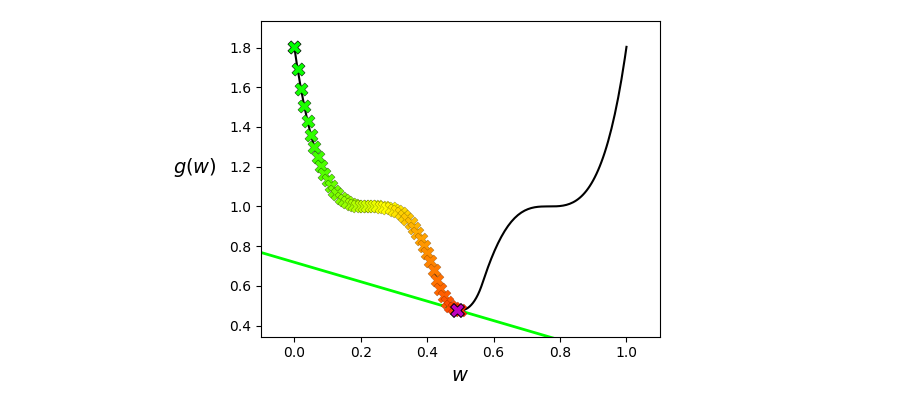
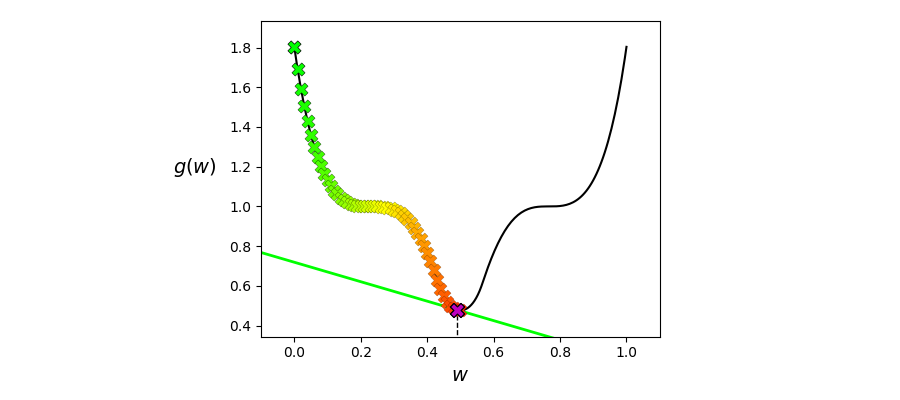
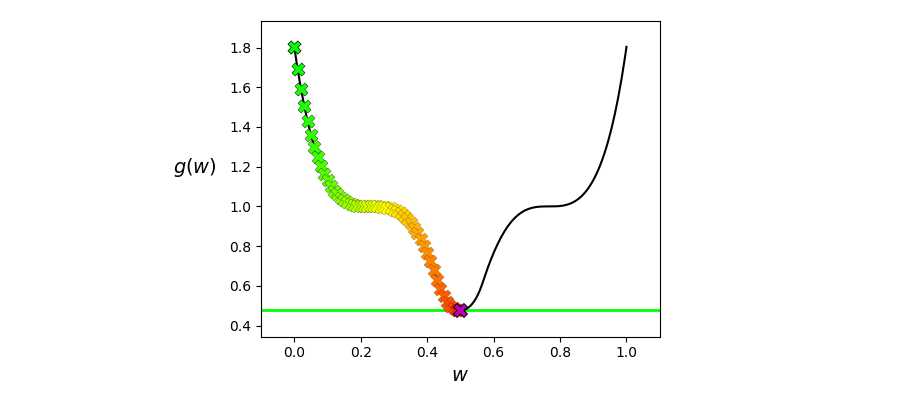
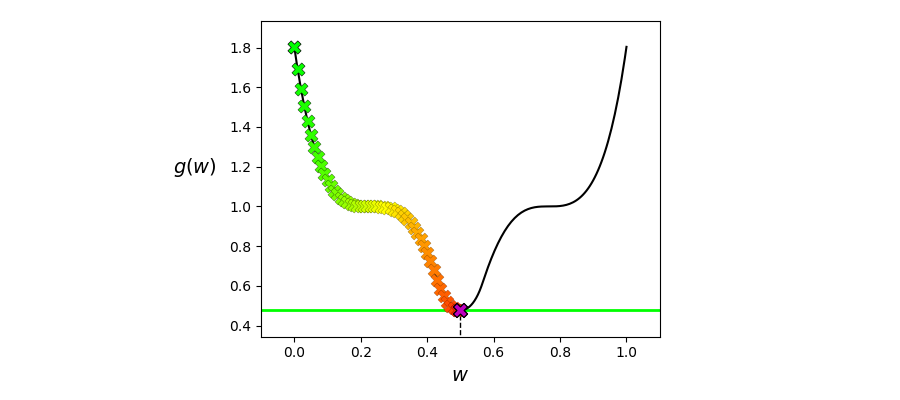
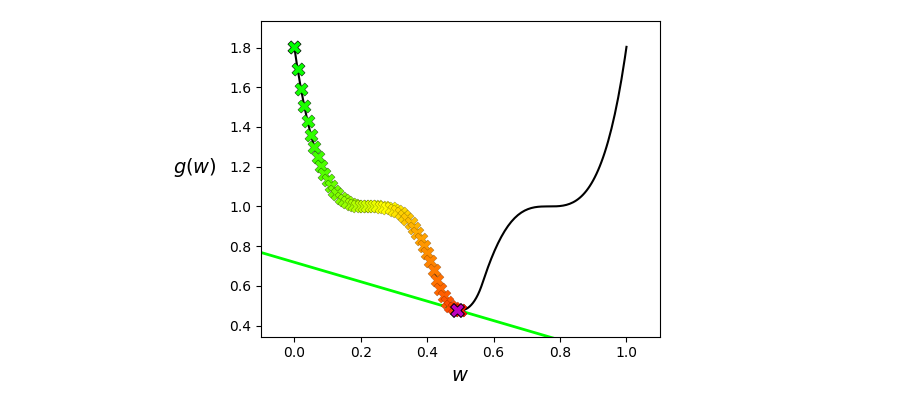
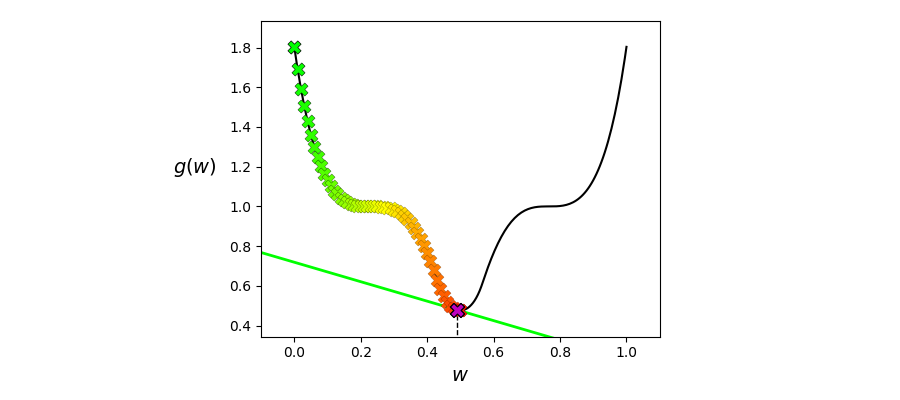
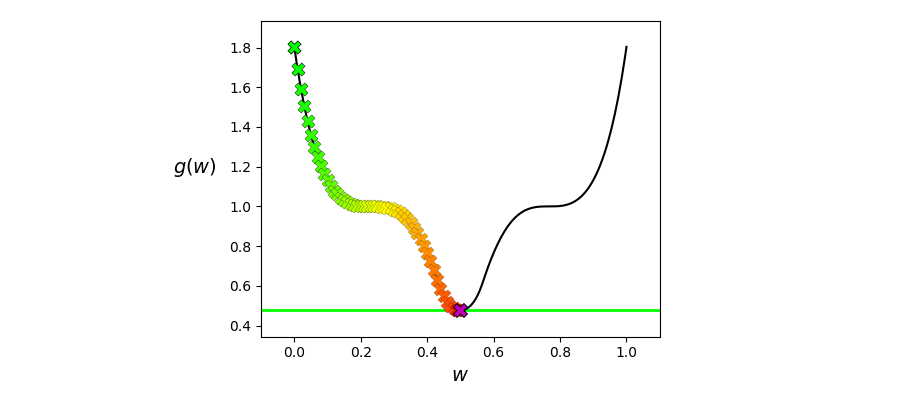
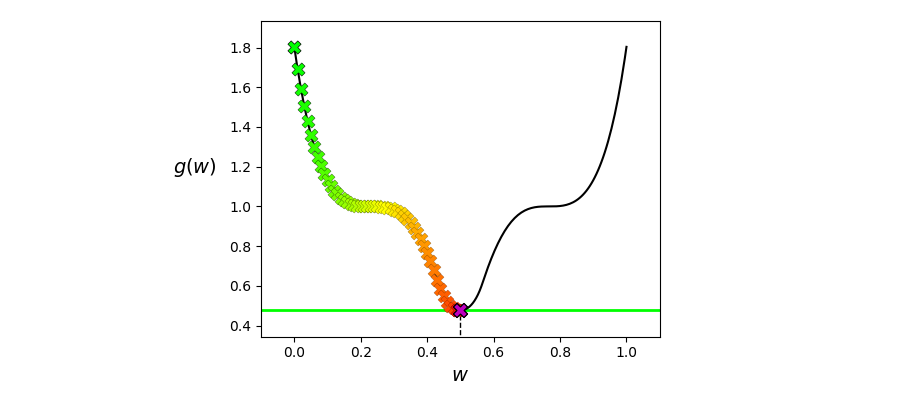
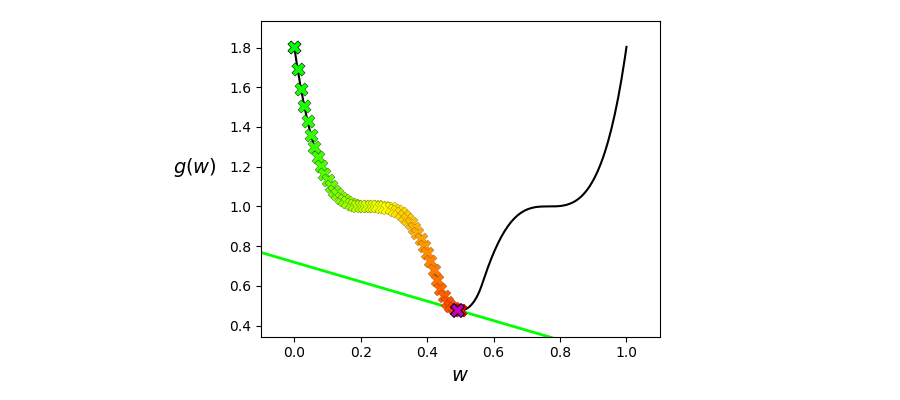
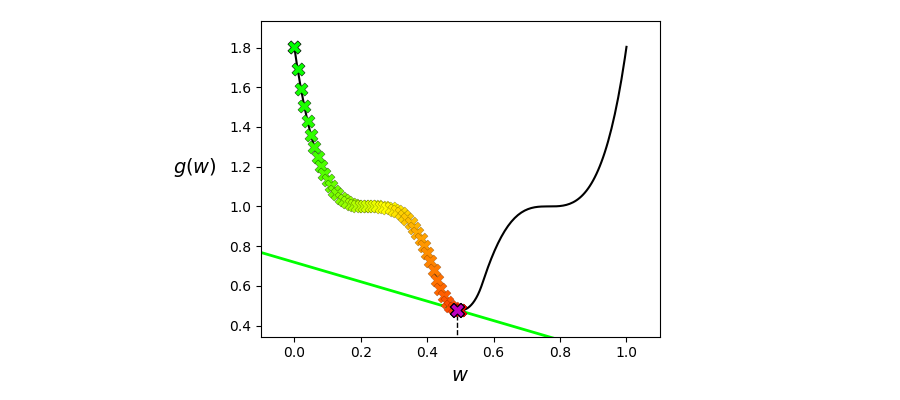
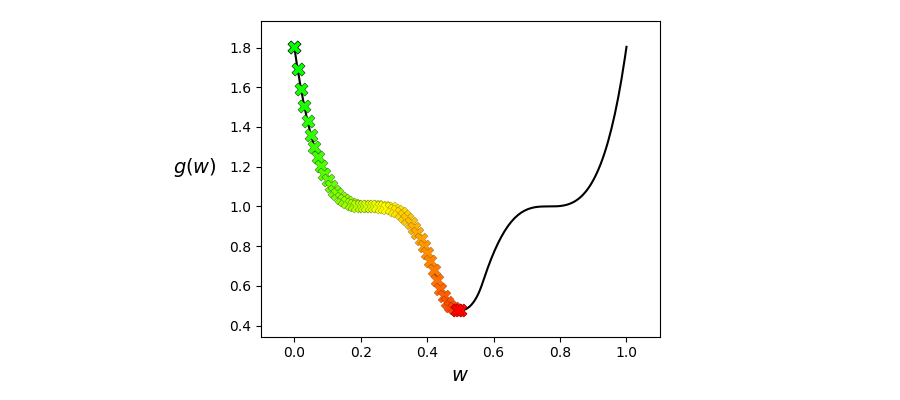

In [19]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.maximum(0,(3*w - 2.3)**3 + 1)**2 + np.maximum(0, (-3*w + 0.7)**3 + 1)**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.animate_2d(g=g, w_init = 0,steplength = 0.01,max_its = 55,version = 'normalized',wmin = 0,wmax = 1)

Place the slider all the way to its full right position, so that the final point is colored red and no linear approximation is shown.  Now, lets discuss the convergence behavior of this run by examining the results above experiment and the general form of the $k^{th}$ step in the normalized method

$$
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \frac{\nabla g(\mathbf{w}^{\,k-1})}{\left\Vert \nabla g(\mathbf{w}^{\,k-1}) \right\Vert_2 }
$$

which of course involves normalizing the length of the gradient at each step.  This means even if $\left\Vert \nabla g\left(\mathbf{w}^{\,k-1}\right) \right\Vert_2$ is very small in magnitude (but non-zero), as it is near the saddle point of the function here, the descent direction $ \frac{\nabla g(\mathbf{w}^{\,k-1})}{\left\Vert \nabla g(\mathbf{w}^{\,k-1}) \right\Vert_2 }$ has length one.  Thus steps near a stationary point still - as derived above - have length given by the value of the steplength parameter $\alpha$.  So unlike the unnormalized approach here if the length of the gradient gets small, the length of the steps stay the same.  This has the practical advantage allowing the normalized version of gradient descent to naturally *pass over saddle points of non-convex functions* as it did in this example. 

In the next Python cell we compare normalized and unnormalized gradient descent (left and right panels respectively) on the non-convex function used above.  Both algorithms use the same initial point ($w^0 = 0$), steplength parameter ($\alpha = 0.01$), and maximum number of iterations (55 each).  Steps are colored from green to red to indicate the starting and ending points of each run, with circles denoting the actual steps in the input space and 'x''s denoting their respective function evaluations.  Notice how - due to the re-scaling of each step via the derivative length - the unnormalized version halts at the function's saddle point, while the normalized version rushes past it as shown above. 

<IPython.core.display.Javascript object>


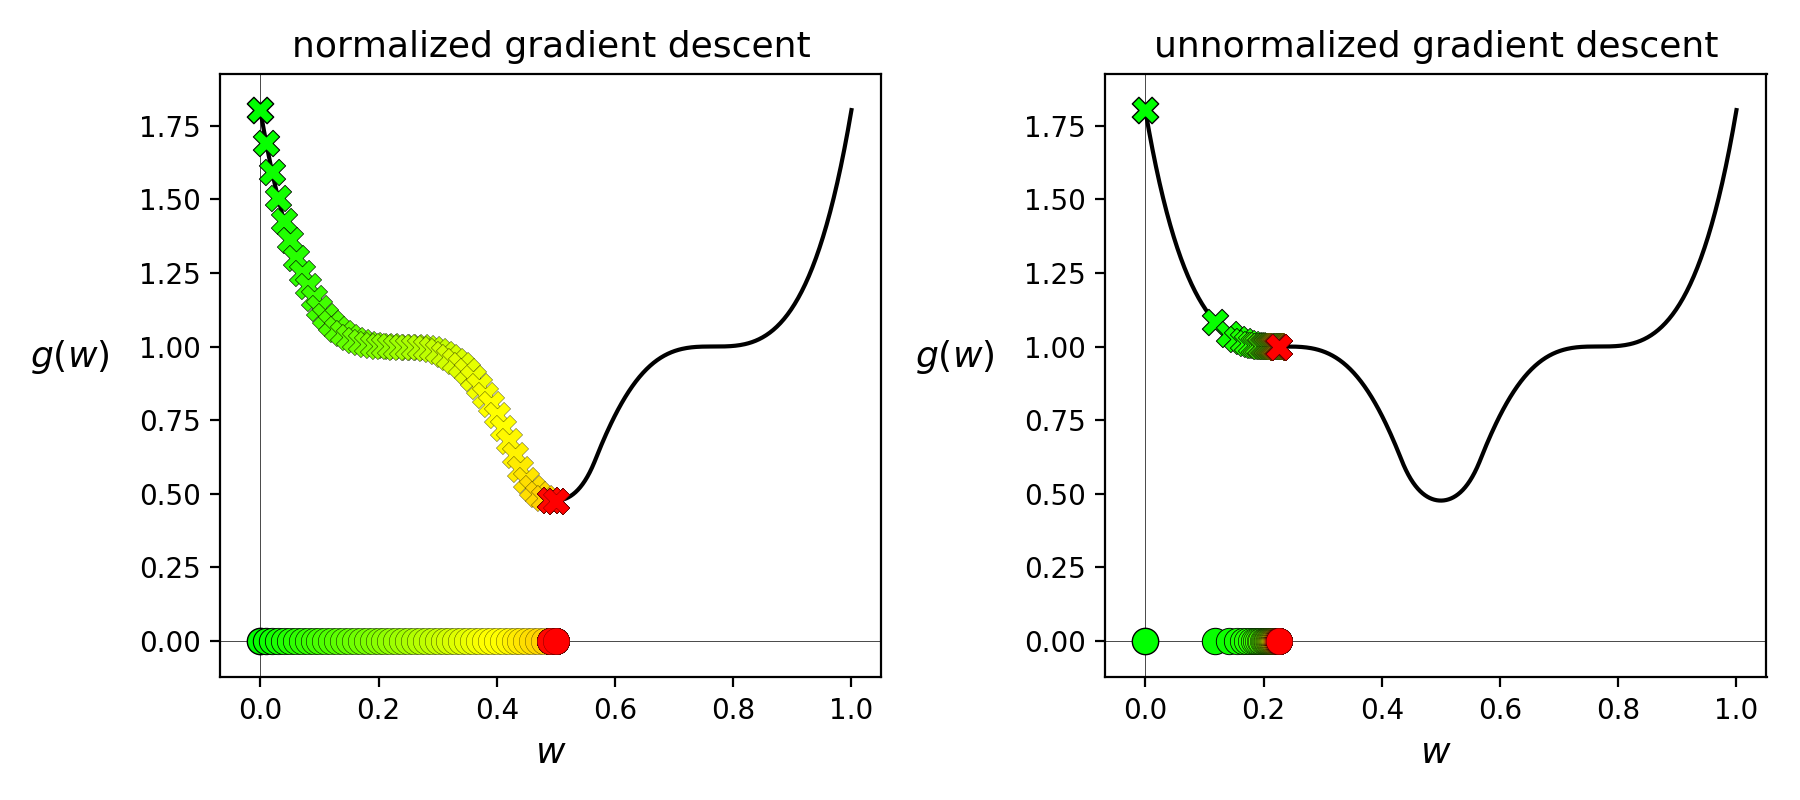

In [20]:
# what function should we play with?  Defined in the next line.
g = lambda w: np.maximum(0,(3*w - 2.3)**3 + 1)**2 + np.maximum(0, (-3*w + 0.7)**3 + 1)**2

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();

demo.compare_versions_2d(g=g, w_init = 0,steplength = 0.01,max_its = 80,version = 'normalized',wmin = 0,wmax = 1)

Building on this example, let us now look at an example of a function with large flat areas


$$
g(w_1,w_2) = -e^{-\left(w_1^2 + w_2^2\right)} + 1
$$

to compare how normalized and unnormalized gradient descent deal with large regions of an input space where the gradient is almost zero.  This function has a single global minimum at the origin and comparing the two - as we do in the next Python cell - we can see that even when beginning on an almost completely flat area of the input space the normalized method can quickly find this minimum, whereas the unnormalized version can barely start moving in the right direction.  More specifically, we initialize both algorithms at the point $\mathbf{w}^0 = \begin{bmatrix} -3 \\ -2 \end{bmatrix}$ use the diminishing steplength parameter $\alpha = \frac{1}{k}$, and take 20 steps with each version.  The top two panels display the function from the side (left panel) and from above (right panel) for the normalized version, and likewise the bottom two panels display the results of the unnormalized version.

<IPython.core.display.Javascript object>


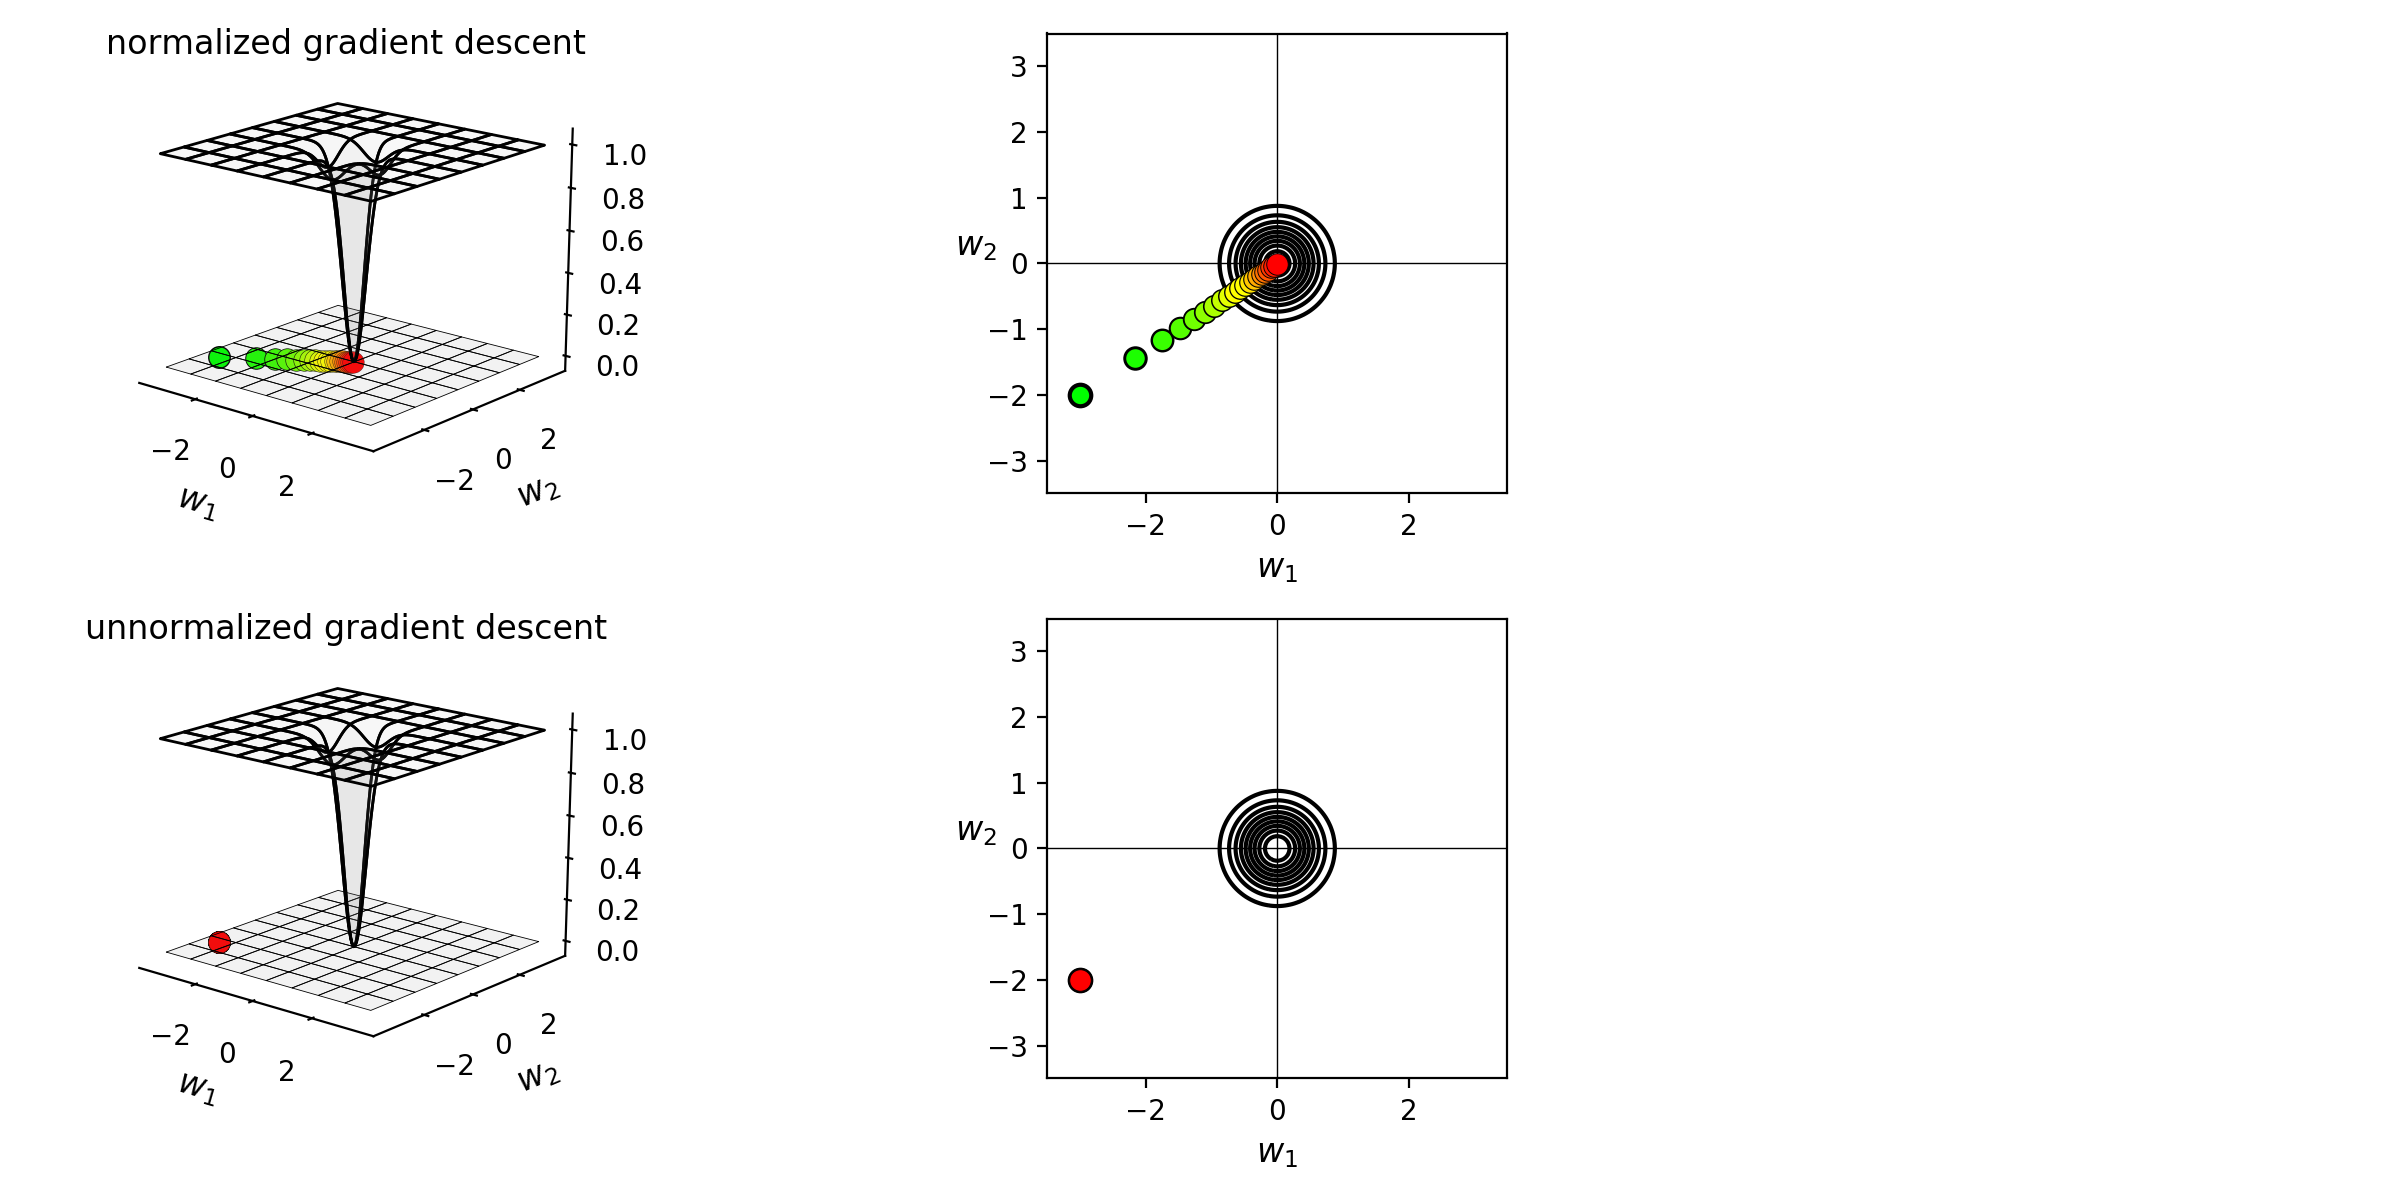

In [21]:
# what function should we play with?  Defined in the next line.
g = lambda w: -np.exp(-3*(w[0]**2 + w[1]**2))  + 1 

# run the visualizer for our chosen input function, initial point, and step length alpha
demo = optlib.gradient_descent_demos.visualizer();
w_init = [-3,-2]; max_its = 20; steplength = 'diminishing';

demo.compare_versions_3d(g,w_init,steplength,max_its,wmax=3)